# I) Import the necessary packages

In [2]:
# Standard libraries
import os
import re
import unicodedata
import warnings
import datetime as dt
from datetime import datetime as dt2
from datetime import timedelta as td
from datetime import time as tm
from pathlib import Path
import itertools

# Data manipulation libraries
import numpy as np
import pandas as pd

# Machine learning libraries
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import (
    train_test_split, 
    GridSearchCV, 
    RandomizedSearchCV, 
    cross_val_score, 
    cross_val_predict
)
from sklearn.pipeline import Pipeline

# Classification models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import (
    RandomForestClassifier, 
    GradientBoostingClassifier, 
    AdaBoostClassifier, 
    ExtraTreesClassifier
)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Metrics and evaluation
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, davies_bouldin_score
import scikitplot as skplt
from yellowbrick.model_selection import FeatureImportances

# Data handling
from imblearn.over_sampling import SMOTE
from feature_engine.outliers import Winsorizer

# Statistical analysis
from scipy import stats
from scipy.stats import f_oneway
import scipy.cluster.hierarchy as sch

# Visualization libraries
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.pylab as pl
import seaborn as sns
import plotly
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as pyoff
from IPython.display import SVG
import shap

# Configuration settings
warnings.filterwarnings("ignore")
sns.set_theme(style='whitegrid')
palette = 'viridis'

# Model persistence
import joblib

# II) Get the data

## 1) Import csv file

In [5]:
full_data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [6]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## 2) Rename features

In [8]:
full_data = full_data.rename(columns={
    "customerID": "Customer ID",
    "gender": "Gender",
    "SeniorCitizen": "Senior Citizen",
    "Partner": "Partner",
    "Dependents": "Dependents",
    "tenure": "Tenure",
    "PhoneService": "Phone Service",
    "MultipleLines": "Multiple Lines",
    "InternetService": "Internet Service",
    "OnlineSecurity": "Online Security",
    "OnlineBackup": "Online Backup",
    "DeviceProtection": "Device Protection",
    "TechSupport": "Tech Support",
    "StreamingTV": "Streaming TV",
    "StreamingMovies": "Streaming Movies",
    "Contract": "Contract",
    "PaperlessBilling": "Paperless Billing",
    "PaymentMethod": "Payment Method",
    "MonthlyCharges": "Monthly Charges",
    "TotalCharges": "Total Charges",
    "Churn": "Churn"
})

# III) Explore the Data

## 1) Quick glance at the data

In [11]:
full_data.head()

Customer ID  Gender  Senior Citizen Partner Dependents  Tenure  \
0  7590-VHVEG  Female               0     Yes         No       1   
1  5575-GNVDE    Male               0      No         No      34   
2  3668-QPYBK    Male               0      No         No       2   
3  7795-CFOCW    Male               0      No         No      45   
4  9237-HQITU  Female               0      No         No       2   

  Phone Service    Multiple Lines Internet Service Online Security  ...  \
0            No  No phone service              DSL              No  ...   
1           Yes                No              DSL             Yes  ...   
2           Yes                No              DSL             Yes  ...   
3            No  No phone service              DSL             Yes  ...   
4           Yes                No      Fiber optic              No  ...   

  Device Protection Tech Support Streaming TV Streaming Movies  \
0                No           No           No               No   
1               Yes           No           No               No   
2                No           No           No               No   
3               Yes          Yes           No               No   
4                No           No           No               No   

         Contract Paperless Billing             Payment Method  \
0  Month-to-month               Yes           Electronic check   
1        One year                No               Mailed check   
2  Month-to-month               Yes               Mailed check   
3        One year                No  Bank transfer (automatic)   
4  Month-to-month               Yes           Electronic check   

  Monthly Charges  Total Charges Churn  
0           29.85          29.85    No  
1           56.95         1889.5    No  
2           53.85         108.15   Yes  
3           42.30        1840.75    No  
4           70.70         151.65   Yes  

[5 rows x 21 columns]

In [12]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Customer ID        7043 non-null   object 
 1   Gender             7043 non-null   object 
 2   Senior Citizen     7043 non-null   int64  
 3   Partner            7043 non-null   object 
 4   Dependents         7043 non-null   object 
 5   Tenure             7043 non-null   int64  
 6   Phone Service      7043 non-null   object 
 7   Multiple Lines     7043 non-null   object 
 8   Internet Service   7043 non-null   object 
 9   Online Security    7043 non-null   object 
 10  Online Backup      7043 non-null   object 
 11  Device Protection  7043 non-null   object 
 12  Tech Support       7043 non-null   object 
 13  Streaming TV       7043 non-null   object 
 14  Streaming Movies   7043 non-null   object 
 15  Contract           7043 non-null   object 
 16  Paperless Billing  7043 

In [13]:
full_data['Total Charges'] = pd.to_numeric(full_data['Total Charges'], errors='coerce')
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Customer ID        7043 non-null   object 
 1   Gender             7043 non-null   object 
 2   Senior Citizen     7043 non-null   int64  
 3   Partner            7043 non-null   object 
 4   Dependents         7043 non-null   object 
 5   Tenure             7043 non-null   int64  
 6   Phone Service      7043 non-null   object 
 7   Multiple Lines     7043 non-null   object 
 8   Internet Service   7043 non-null   object 
 9   Online Security    7043 non-null   object 
 10  Online Backup      7043 non-null   object 
 11  Device Protection  7043 non-null   object 
 12  Tech Support       7043 non-null   object 
 13  Streaming TV       7043 non-null   object 
 14  Streaming Movies   7043 non-null   object 
 15  Contract           7043 non-null   object 
 16  Paperless Billing  7043 

In [14]:
full_data.describe()

Senior Citizen       Tenure  Monthly Charges  Total Charges
count     7043.000000  7043.000000      7043.000000    7032.000000
mean         0.162147    32.371149        64.761692    2283.300441
std          0.368612    24.559481        30.090047    2266.771362
min          0.000000     0.000000        18.250000      18.800000
25%          0.000000     9.000000        35.500000     401.450000
50%          0.000000    29.000000        70.350000    1397.475000
75%          0.000000    55.000000        89.850000    3794.737500
max          1.000000    72.000000       118.750000    8684.800000

<Axes: >

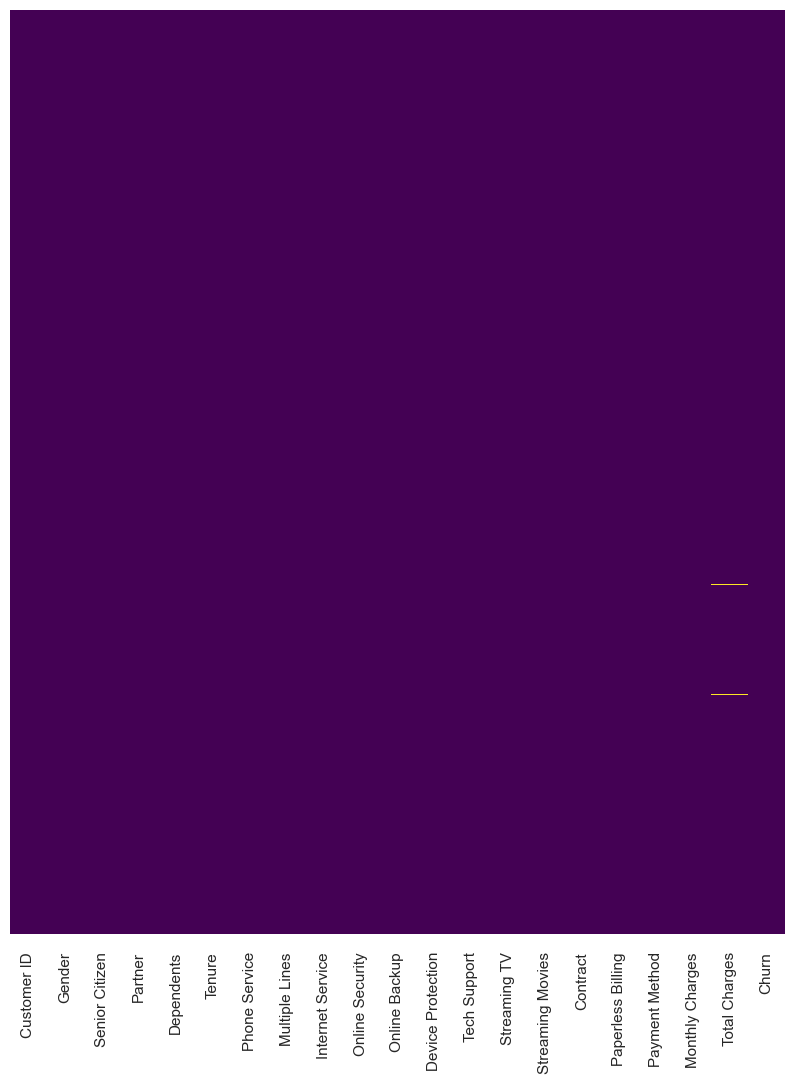

In [15]:
plt.figure(figsize=(10,12))
sns.heatmap(full_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [16]:
full_data.nunique()

Customer ID          7043
Gender                  2
Senior Citizen          2
Partner                 2
Dependents              2
Tenure                 73
Phone Service           2
Multiple Lines          3
Internet Service        3
Online Security         3
Online Backup           3
Device Protection       3
Tech Support            3
Streaming TV            3
Streaming Movies        3
Contract                3
Paperless Billing       2
Payment Method          4
Monthly Charges      1585
Total Charges        6530
Churn                   2
dtype: int64

In [17]:
full_data.isnull().sum()

Customer ID           0
Gender                0
Senior Citizen        0
Partner               0
Dependents            0
Tenure                0
Phone Service         0
Multiple Lines        0
Internet Service      0
Online Security       0
Online Backup         0
Device Protection     0
Tech Support          0
Streaming TV          0
Streaming Movies      0
Contract              0
Paperless Billing     0
Payment Method        0
Monthly Charges       0
Total Charges        11
Churn                 0
dtype: int64

## 2) Functions used to explore each feature

In [19]:
#Function that will return the value count and frequency of each observation within a feature
def value_cnt_norm_cal(df,feature):
    ftr_value_cnt = df[feature].value_counts()
    ftr_value_cnt_norm = df[feature].value_counts(normalize=True) * 100
    ftr_value_cnt_concat = pd.concat([ftr_value_cnt, ftr_value_cnt_norm], axis=1)
    ftr_value_cnt_concat.columns = ['Count', 'Frequency (%)']
    return ftr_value_cnt_concat

In [20]:
# function to create display general information about the feature
def gen_info_feat(df,feature):
    match feature:
        case _:
            print('Description:\n{}'.format(df[feature].describe()))
            print('*'*50)
            print('Object type:\n{}'.format(df[feature].dtype))
            print('*'*50)
            value_cnt = value_cnt_norm_cal(df,feature)
            print('Value count:\n{}'.format(value_cnt))

In [21]:
# function to create a pie chart plot
def create_pie_plot(df,feature):
    match feature:
        case _:
            ratio_size = value_cnt_norm_cal(df, feature)
            ratio_size_len = len(ratio_size.index)
            ratio_list = []
            for i in range(ratio_size_len):
                ratio_list.append(ratio_size.iloc[i]['Frequency (%)'])
            fig, ax = plt.subplots(figsize=(8,8))
            # %1.2f%% display decimals in the pie chart with 2 decimal places
            plt.pie(ratio_list, labels=ratio_size.index, autopct='%1.2f%%', startangle=90, wedgeprops={'edgecolor' :'black'})
            plt.title('Pie chart of {}'.format(feature))
            plt.legend(loc='best')
            plt.axis('equal')
            return plt.show()

In [22]:
# Function to create a bar chart plot with adjusted spacing between bars
def create_bar_plot(df, feature):
    data = value_cnt_norm_cal(df, feature)
    x_labels = data.index
    y_values = data.values[:, 0]

    fig, ax = plt.subplots(figsize=(8, 10))

    sns.barplot(x=x_labels, y=y_values, ax=ax, width=0.5)  # giảm width để tạo khoảng cách

    ax.set_xticklabels(labels=x_labels, rotation=45, ha='right')

    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(f'{feature} Count')

    plt.xticks(ticks=range(len(x_labels)), labels=x_labels, rotation=45, ha='right')

    plt.tight_layout()
    plt.show()

In [23]:
# function to create a box plot
def create_box_plot(df,feature):
    match feature:
        case 'Monthly Charges' | 'Total Charges':
            fig, ax = plt.subplots(figsize=(2,8))
            sns.boxplot(y=df[feature])
            plt.title('{} distribution(Boxplot)'.format(feature))
            # suppress scientific notation
            ax.get_yaxis().set_major_formatter(
                matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
            return plt.show()
        case _:
            fig, ax = plt.subplots(figsize=(2,8))
            sns.boxplot(y=df[feature])
            plt.title('{} distribution(Boxplot)'.format(feature))
            return plt.show()

In [24]:
# function to create a histogram plot
def create_hist_plot(df,feature, the_bins=50):
    match feature:
        case 'Monthly Charges' | 'Total Charges':
            fig, ax = plt.subplots(figsize=(18,10))
            sns.histplot(df[feature],bins=the_bins,kde=True)
            # suppress scientific notation
            ax.get_xaxis().set_major_formatter(
                matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
            plt.title('{} distribution'.format(feature))
            return plt.show()
        case _:
            fig, ax = plt.subplots(figsize=(18,10))
            sns.histplot(df[feature],bins=the_bins,kde=True)
            plt.title('{} distribution'.format(feature))
            return plt.show()

In [25]:
# Churn box plot
def churn_box_plot(df,feature):
    match feature:
        case 'Monthly Charges' | 'Total Charges':
            print(df.groupby('Churn')[feature].mean())
            fig, ax = plt.subplots(figsize=(5,8))
            sns.boxplot(y=np.abs(df[feature]),x=df['Churn'])
            plt.xticks(ticks=[0,1],labels=['no','yes'])
            # suppress scientific notation
            ax.get_yaxis().set_major_formatter(
                matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
            plt.title('Churn individuals grouped by {}'.format(feature))
            return plt.show()
        case _:
            print(np.abs(df.groupby('Churn')[feature].mean()))
            fig, ax = plt.subplots(figsize=(5,8))
            sns.boxplot(y=np.abs(df[feature]),x=df['Churn'])
            plt.xticks(ticks=[0,1],labels=['no','yes'])
            plt.title('Churn individuals grouped by {}'.format(feature))
            return plt.show()

In [26]:
# Churn bar plot
def churn_bar_plot(df,feature):
    is_high_risk_grp = df.groupby(feature)['Churn'].sum()
    is_high_risk_grp_srt = is_high_risk_grp.sort_values(ascending=False)
    print(dict(is_high_risk_grp_srt))
    fig, ax = plt.subplots(figsize=(6,10))
    sns.barplot(x=is_high_risk_grp_srt.index,y=is_high_risk_grp_srt.values)
    ax.set_xticklabels(labels=is_high_risk_grp_srt.index,rotation=45, ha='right')
    plt.ylabel('Count')
    plt.title('Churn applicants count grouped by {}'.format(feature))
    return plt.show()

In [27]:
full_data_copy = full_data.copy()
full_data_copy.shape

(7043, 21)

## 3) Univariate analysis

### 3.1) Gender

In [30]:
gen_info_feat(full_data_copy,'Gender')

Description:
count     7043
unique       2
top       Male
freq      3555
Name: Gender, dtype: object
**************************************************
Object type:
object
**************************************************
Value count:
        Count  Frequency (%)
Gender                      
Male     3555       50.47565
Female   3488       49.52435


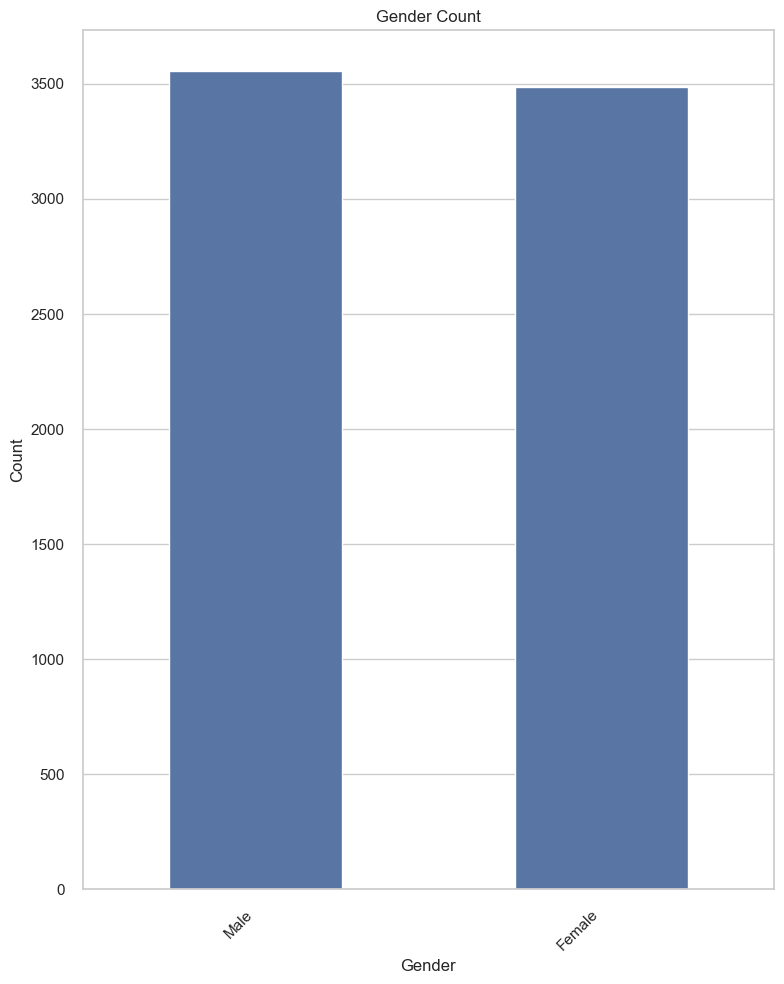

In [31]:
create_bar_plot(full_data_copy,'Gender')

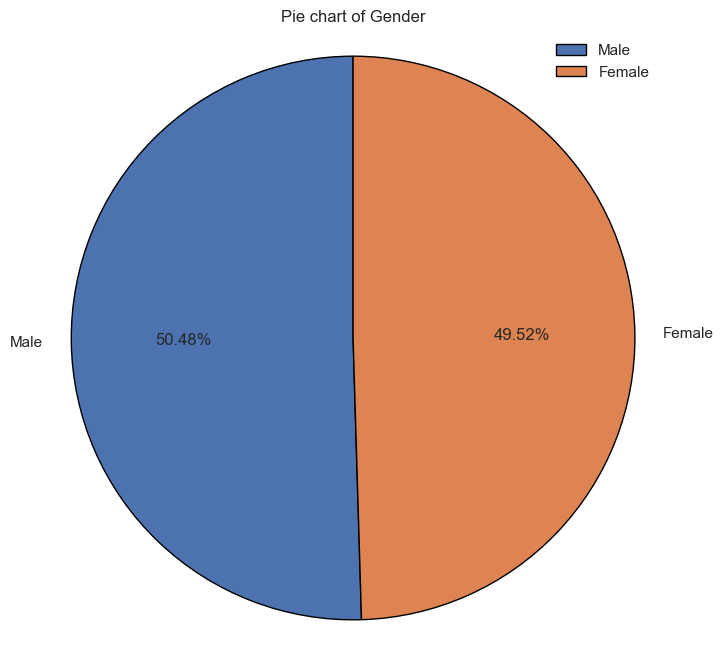

In [32]:
create_pie_plot(full_data_copy,'Gender')

**Interpretation:**

- The dataset contains **7,043 customers**, all of whom have non-missing gender information.
- There are **only two unique gender categories**: "Male" and "Female", indicating that gender is recorded in a binary format.
- The distribution is nearly balanced:
  - **Male:** 3,555 customers (**50.48%**)
  - **Female:** 3,488 customers (**49.52%**)
- There is **no significant gender imbalance**, suggesting that the dataset is **representative** in terms of tion tasks.
training.


### 3.2) Senior Citizen

In [35]:
gen_info_feat(full_data_copy,'Senior Citizen')

Description:
count    7043.000000
mean        0.162147
std         0.368612
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: Senior Citizen, dtype: float64
**************************************************
Object type:
int64
**************************************************
Value count:
                Count  Frequency (%)
Senior Citizen                      
0                5901      83.785319
1                1142      16.214681


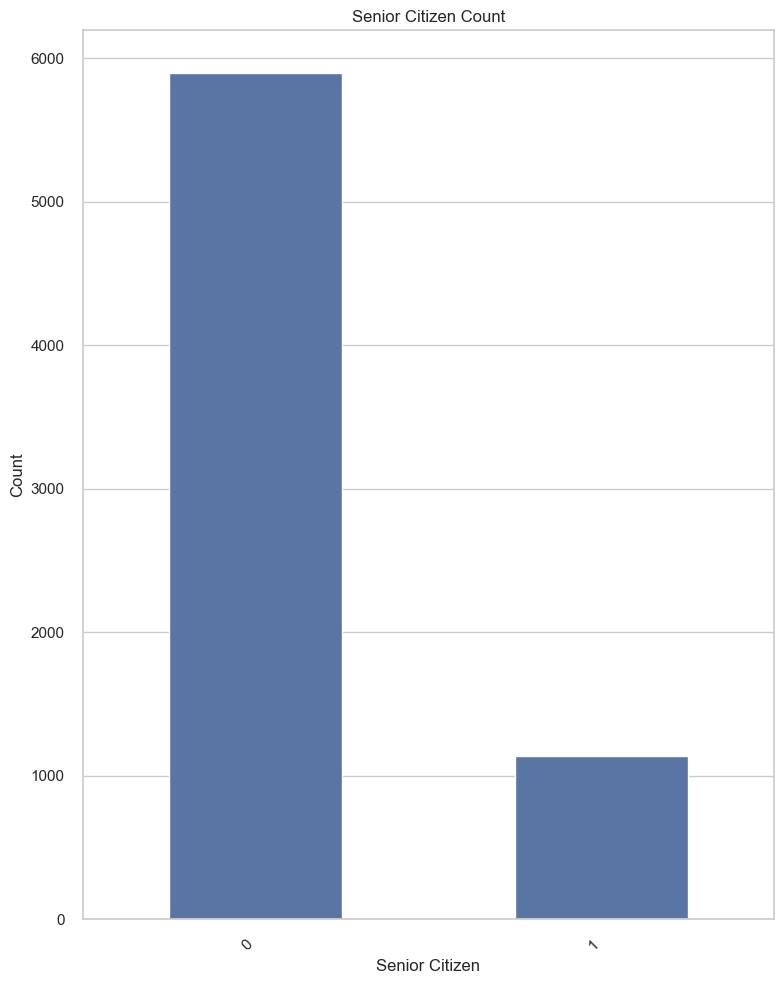

In [36]:
create_bar_plot(full_data_copy,'Senior Citizen')

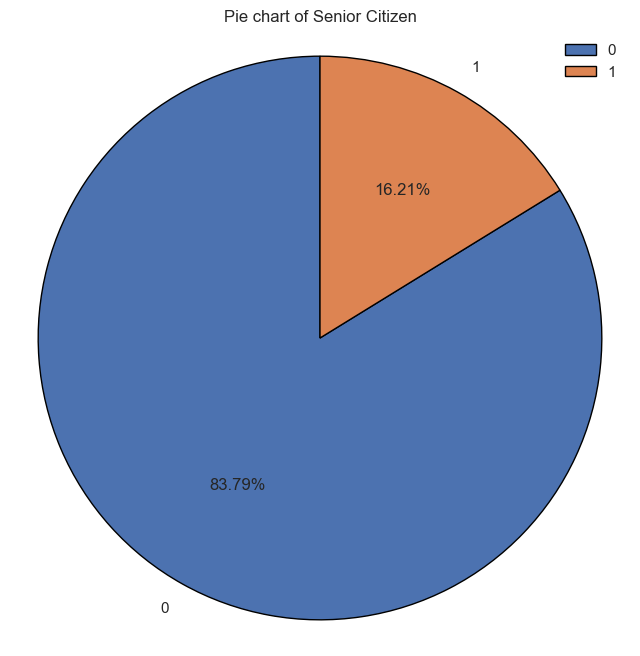

In [37]:
create_pie_plot(full_data_copy,'Senior Citizen')

**Interpretation:**

- The dataset contains **7043 customers**, all with valid values for the `Senior Citizen` variable.
- This variable is **binary encoded**:
  - `0` indicates a **non-senior customer**
  - `1` indicates a **senior citizen customer**
- The majority of customers (**83.79%**) are **non-senior citizens**, while only **16.21%** are **senior citizmbalance.
- From a business perspective, the relatively **small proportion of senior customers** may indicate:
  - Potential market segment to **target for growth**, especially if they have distinct service needs or higher retention value.
  - Need for **customized plans or communication strategies** tailored to senior users if their behavior differs siarning models.
ning tasks.


### 3.3) Partner

In [40]:
gen_info_feat(full_data_copy,'Partner')

Description:
count     7043
unique       2
top         No
freq      3641
Name: Partner, dtype: object
**************************************************
Object type:
object
**************************************************
Value count:
         Count  Frequency (%)
Partner                      
No        3641       51.69672
Yes       3402       48.30328


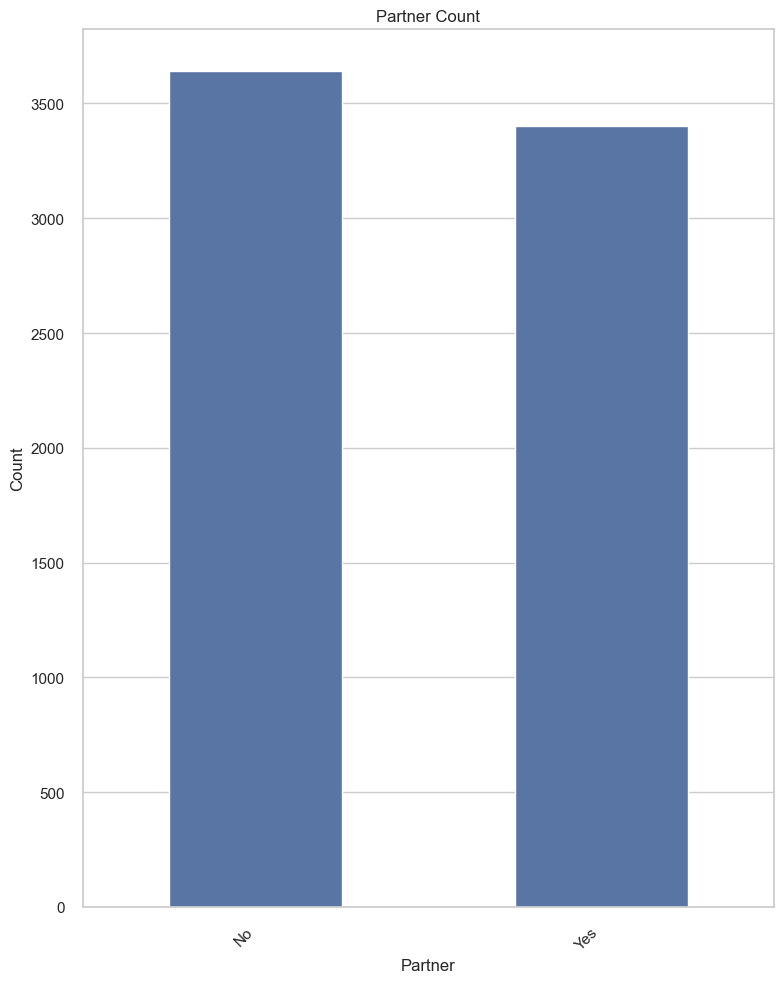

In [41]:
create_bar_plot(full_data_copy,'Partner')

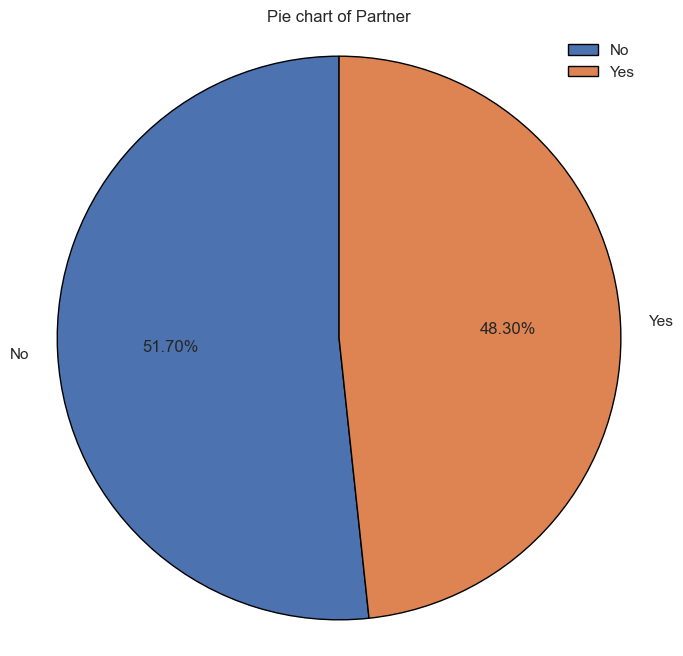

In [42]:
create_pie_plot(full_data_copy,'Partner')

**Interpretation:**

- The dataset contains **7,043 customer records**, all of which have valid entries for the `Partner` feature.
- This feature is **binary categorical**, indicating whether a customer has a partner:
  - **"No"** – 3,641 customers (**51.70%**)
  - **"Yes"** – 3,402 customers (**48.30%**)
- The distribution is **fairly balanced**, with a slight majority of customers not having a pa
> In telecom analytics, the presence or absence of a partner may correlate with usage patterns, service bundling, and churn behavior. For example, customers with partners might share or rely more on joint services, which could affect retention strategies.trategies.


### 3.4) Dependents

In [45]:
gen_info_feat(full_data_copy,'Dependents')

Description:
count     7043
unique       2
top         No
freq      4933
Name: Dependents, dtype: object
**************************************************
Object type:
object
**************************************************
Value count:
            Count  Frequency (%)
Dependents                      
No           4933      70.041176
Yes          2110      29.958824


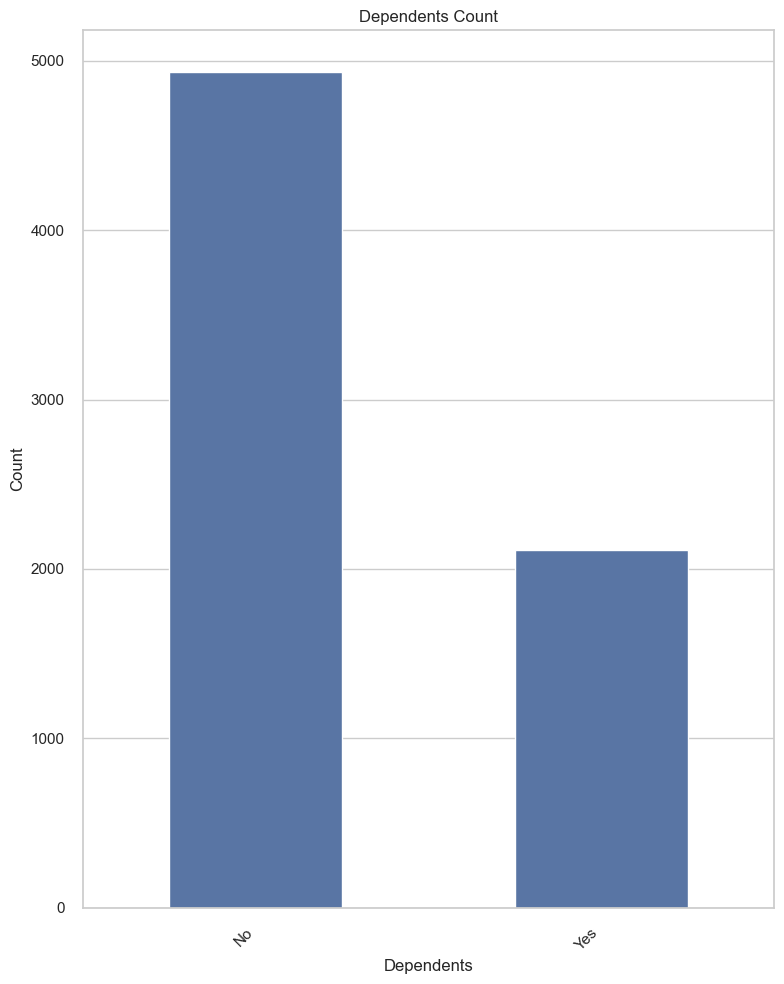

In [46]:
create_bar_plot(full_data_copy,'Dependents')

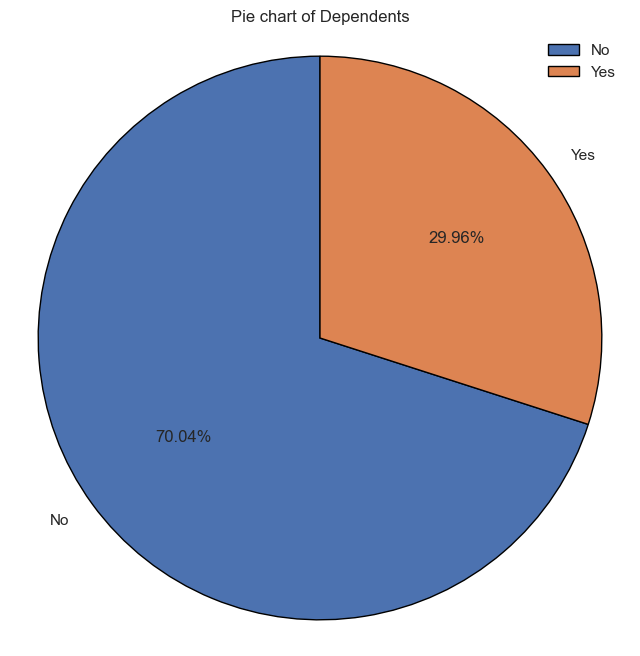

In [47]:
create_pie_plot(full_data_copy,'Dependents')

**Interpretation:**

- The dataset includes **7,043 customers**, all with valid entries in the `Dependents` feature.
- This feature is **binary categorical**, indicating whether a customer has dependents (e.g., children, elderly family members):
  - **"No"** – 4,933 customers (**70.04%**)
  - **"Yes"** – 2,110 customers (**29.96%**)
- A significant majority of customers **do not have dependents**, suggesting that most customers maÂy have fewer household obligaon models.

### 3.5) Tenure

In [50]:
gen_info_feat(full_data_copy,'Tenure')

Description:
count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: Tenure, dtype: float64
**************************************************
Object type:
int64
**************************************************
Value count:
        Count  Frequency (%)
Tenure                      
1         613       8.703677
72        362       5.139855
2         238       3.379242
3         200       2.839699
4         176       2.498935
...       ...            ...
28         57       0.809314
39         56       0.795116
44         51       0.724123
36         50       0.709925
0          11       0.156183

[73 rows x 2 columns]


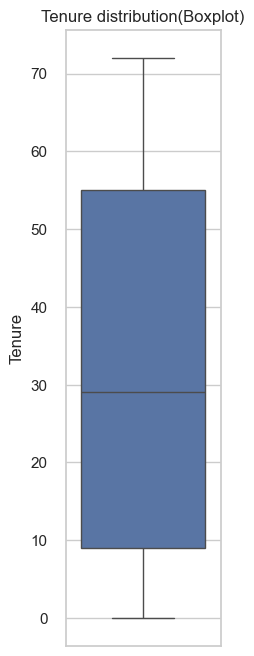

In [51]:
create_box_plot(full_data_copy,'Tenure')

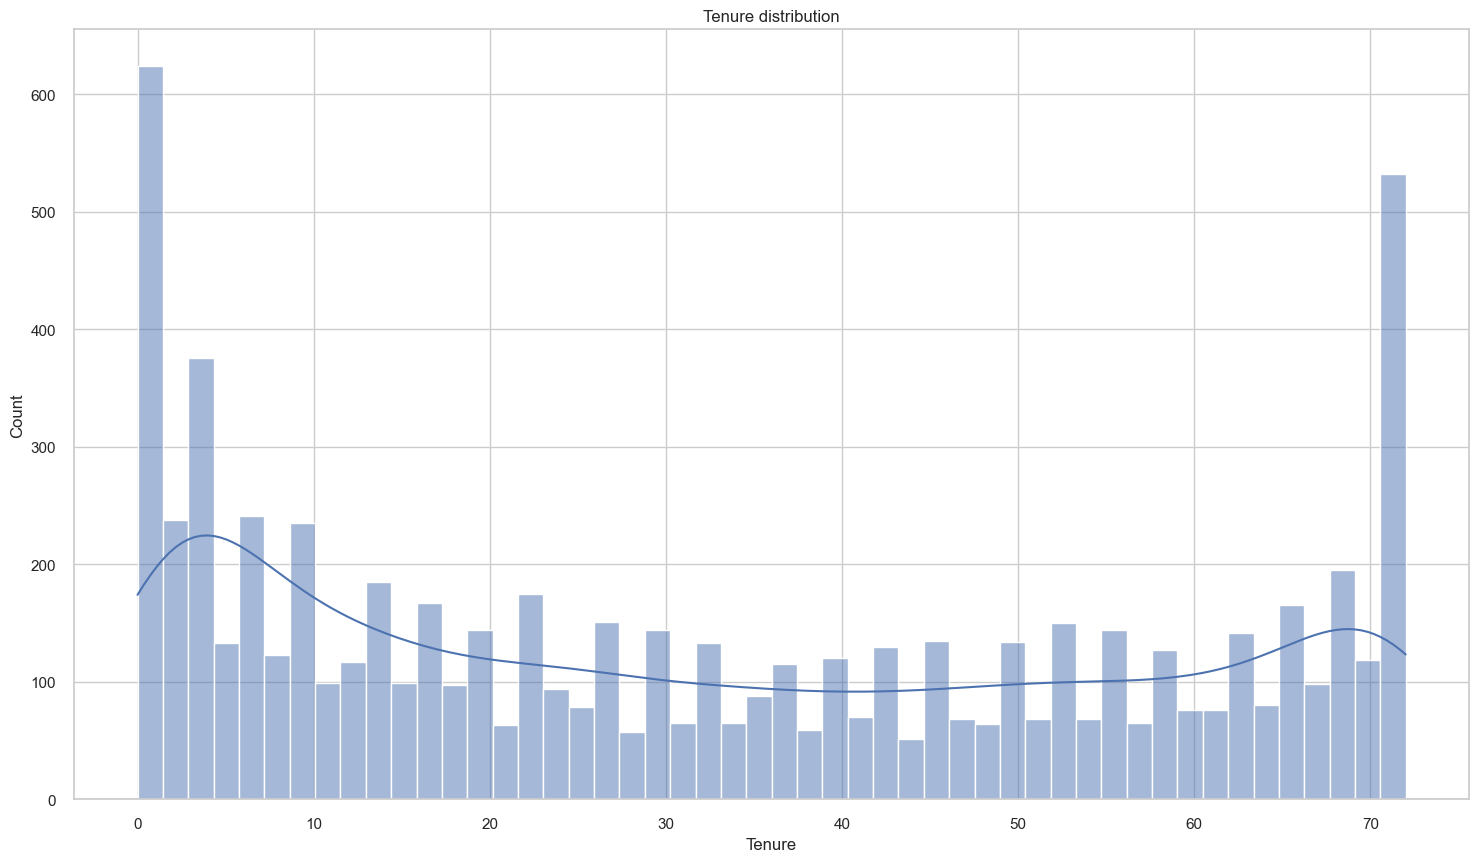

In [52]:
create_hist_plot(full_data_copy,'Tenure')

Churn
No     37.569965
Yes    17.979133
Name: Tenure, dtype: float64


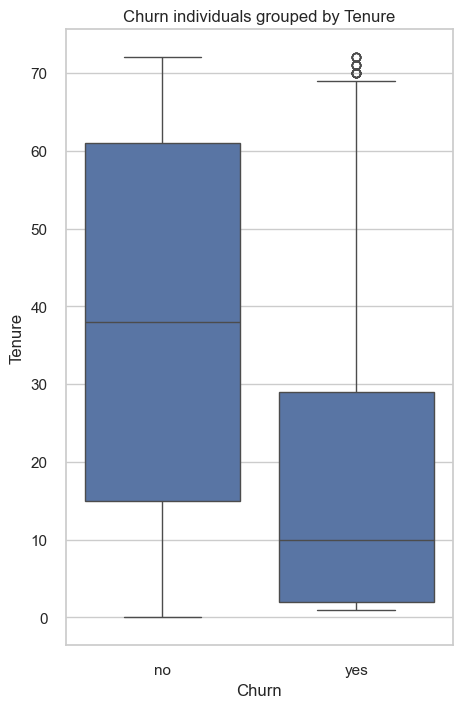

In [53]:
churn_box_plot(full_data_copy,'Tenure')

**Interpretation: Tenure Distribution**

- **`Tenure`** (in months) represents how long a customer has been with the telecom company.
- The dataset contains **7,043 records**, with **no missing values** for this feature.

**Summary Statistics:**
- **Mean Tenure:** 32.37 months  
- **Median (50%):** 29 months  
- **Min:** 0 months | **Max:** 72 months  
- **Standard Deviation:** 24.56 months

**Distribution Insights:**
- The distribution is **multimodal**, with two clear peaks:
  - **Peak 1:** Tenure = 1 month → **613 customers (~8.7%)**
  - **Peak 2:** Tenure = 72 months → **362 customers (~5.1%)**
- **11 customers have a tenure of 0 months**, which could indicate:
  - **New customers** who just joined, or
  - **Data entry errors** that should be reviewed.
- The distribution is **non-normal and irregular**, exhibiting both skewness and multiple modes, so it cannot simply be described as "right-skewed."

---

**Churn Analysis by Tenure**

- **Churned customers**:
  - **Average tenure:** 17.98 months
- **Retained (non-churned) customers**:
  - **Average tenure:** 37.57 months
- **Boxplot analysis** shows:
  - Churned customers tend to have **shorter and more concentrated tenure**.
  - Non-churned customers have **higher and more varied tenure**, indicating greater loyalty over time.

> **Conclusion:** In the telecom industry, `Tenure` is a **strong predictor of customer churn**.  
> **Newer customers are more at risk**, emphasizing the need for **early retention and engagement strategies** to reduce churn.



### 3.6) Phone Service

In [56]:
gen_info_feat(full_data_copy,'Phone Service')

Description:
count     7043
unique       2
top        Yes
freq      6361
Name: Phone Service, dtype: object
**************************************************
Object type:
object
**************************************************
Value count:
               Count  Frequency (%)
Phone Service                      
Yes             6361      90.316626
No               682       9.683374


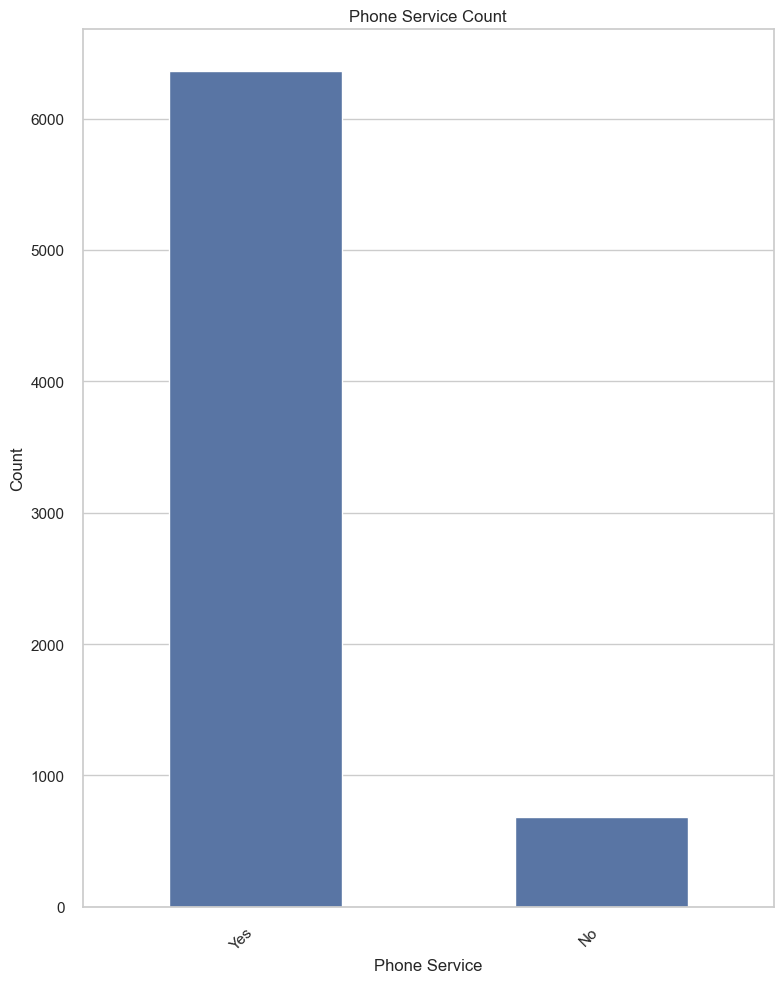

In [57]:
create_bar_plot(full_data_copy,'Phone Service')

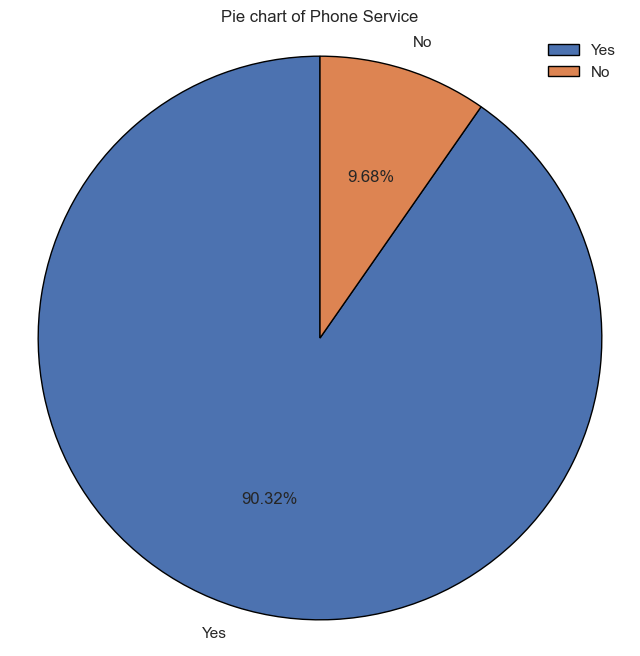

In [58]:
create_pie_plot(full_data_copy,'Phone Service')

**Interpretation:**

- The dataset includes **7,043 customer records**, all of which have valid entries for the `Phone Service` feature.
- This is a **binary categorical** variable that indicates whether a customer subscribes to a phone service:
  - **"Yes"** – 6,361 customers (**90.32%**)
  - **"No"** – 682 customers (**9.68%**)
- The vast majority of customers **have a phone service**, which aligns with typical expectations in the telecom industry.
- The relatively small group of customers without phone service may represent:
  - Internet-only users
  - Users relying solely on mobile/data services
  - Customers in regions with poor phone coverage or preference for other communication methods
> In telecom analytics, the presence of a phone service can impact churn prediction and cross-sell opportunities. Customers without phone service might be more price-sensitive or using competitors for voice communication, making them a potential upsell target or a churn risk.


### 3.7) Multiple Lines

In [61]:
gen_info_feat(full_data_copy,'Multiple Lines')

Description:
count     7043
unique       3
top         No
freq      3390
Name: Multiple Lines, dtype: object
**************************************************
Object type:
object
**************************************************
Value count:
                  Count  Frequency (%)
Multiple Lines                        
No                 3390      48.132898
Yes                2971      42.183729
No phone service    682       9.683374


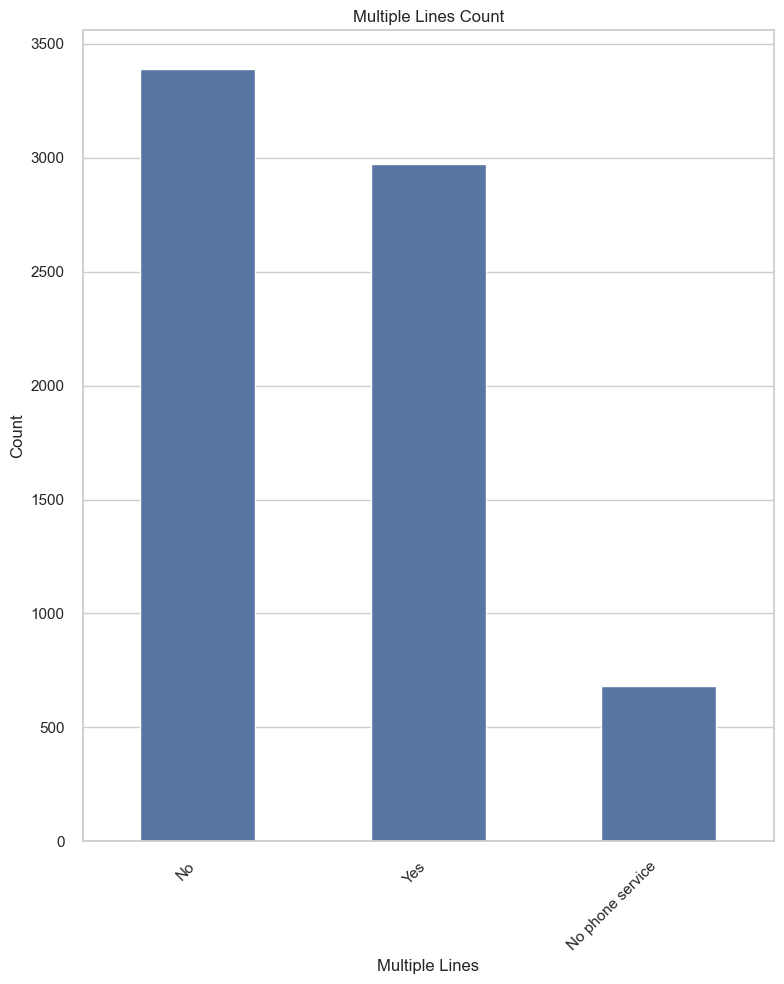

In [62]:
create_bar_plot(full_data_copy,'Multiple Lines')

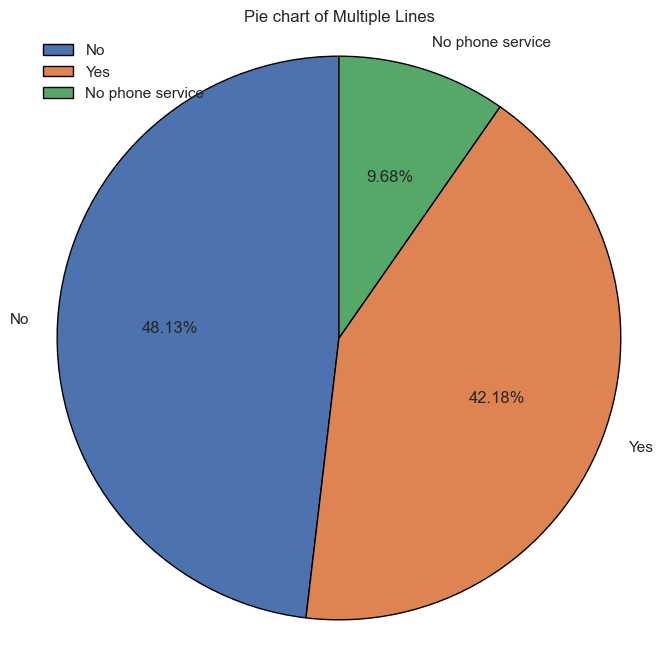

In [63]:
create_pie_plot(full_data_copy,'Multiple Lines')

**Interpretation:**

- The `Multiple Lines` feature indicates whether a customer has multiple phone lines.
- The dataset includes **7,043 entries** with **no missing values** for this feature.
- This is a **categorical variable** with three distinct values:
  - **"No"** – 3,390 customers (**48.13%**) have only a single phone line.
  - **"Yes"** – 2,971 customers (**42.18%**) have multiple phone lines.
  - **"No phone service"** – 682 customers (**9.68%**) do not have any phone service, aligning with the `Phone Service` column.

**Key Observations:**
- Among customers with phone service (6,361 individuals), roughly **46.7%** (2,971 out of 6,361) have multiple lines, which indicates a significant segment that may require bundled or family plans.
- The presence of multiple lines often reflects **higher engagement and revenue potential**, but could also correlate with **higher churn risk** if service quality or cost is unsatisfactory.
> In the telecom industry, identifying customers with multiple lines can help tailor offers such as family plans, shared data bundles, or loyalty rewards. These customers are valuable but may be more price-sensitive or demanding in terms of service quality.


### 3.8) Internet Service

In [66]:
gen_info_feat(full_data_copy,'Internet Service')

Description:
count            7043
unique              3
top       Fiber optic
freq             3096
Name: Internet Service, dtype: object
**************************************************
Object type:
object
**************************************************
Value count:
                  Count  Frequency (%)
Internet Service                      
Fiber optic        3096      43.958540
DSL                2421      34.374556
No                 1526      21.666903


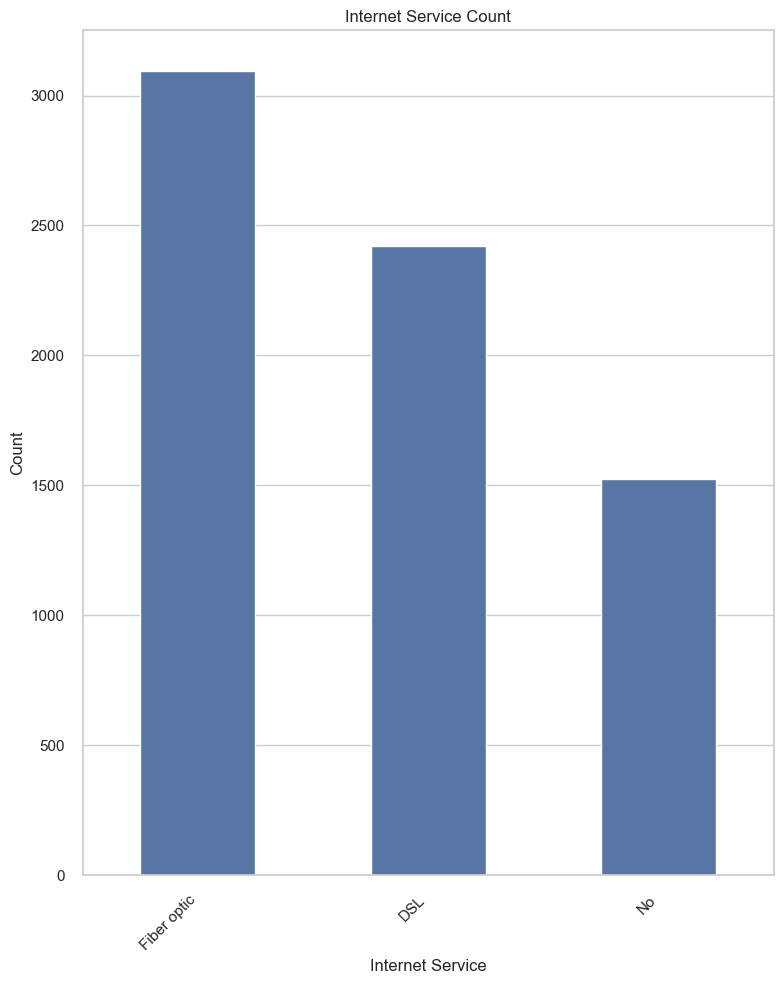

In [67]:
create_bar_plot(full_data_copy, 'Internet Service')

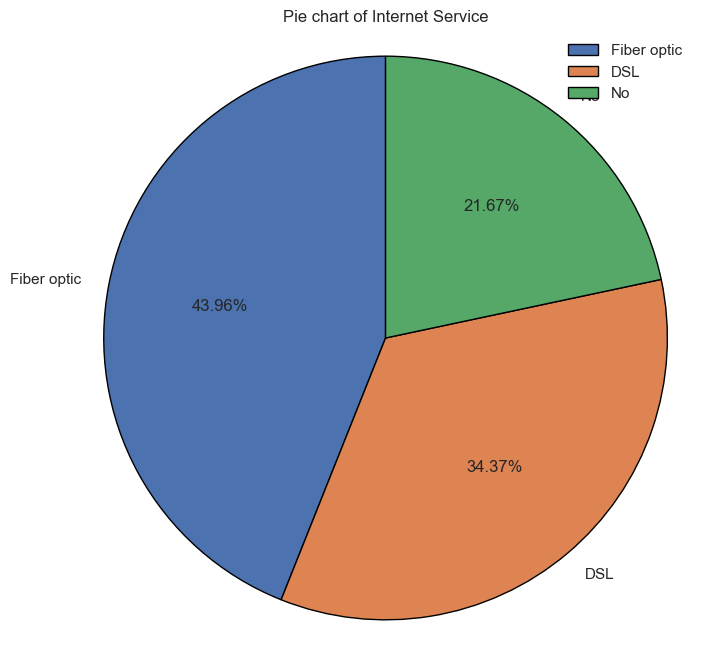

In [68]:
create_pie_plot(full_data_copy,'Internet Service')

**Interpretation:**

- The `Internet Service` feature describes the type of internet connection each customer has.
- All **7,043 customers** in the dataset have valid entries for this feature, categorized into three groups:
  - **Fiber optic** – 3,096 customers (**43.96%**)
  - **DSL (Digital Subscriber Line)** – 2,421 customers (**34.37%**)
  - **No internet service** – 1,526 customers (**21.67%**)

**Key Insights:**
- **Fiber optic** is the most common internet service, likely due to its faster speed and growing coverage area.
- A significant portion still uses **DSL**, possibly due to lower cost or limited fiber availability in certain regions.
- **Over one-fifth of customers (21.67%)** do not use any internet service, which could indicate:
  - Customers using only phone services
  - Areas with poor internet infrastructure
  - Older or less tech-savvy demographics

**Business Implications:**
- Customers using **fiber optic** are more likely to be **heavy data users**, thus representing higher ARPU (Average Revenue Per User), but may also be more demanding and **churn-sensitive** if service quality drops.
- Those without internet service present **cross-sell opportunities**, e.g., bundling internet with existing phone plans.

> In the telecom sector, understanding the type of internet service is crucial for both operational planning (e.g., infrastructure investment) and customer strategy (e.g., offering upgrades or promotions).


### 3.9) Online Security

In [71]:
gen_info_feat(full_data_copy,'Online Security')

Description:
count     7043
unique       3
top         No
freq      3498
Name: Online Security, dtype: object
**************************************************
Object type:
object
**************************************************
Value count:
                     Count  Frequency (%)
Online Security                          
No                    3498      49.666335
Yes                   2019      28.666761
No internet service   1526      21.666903


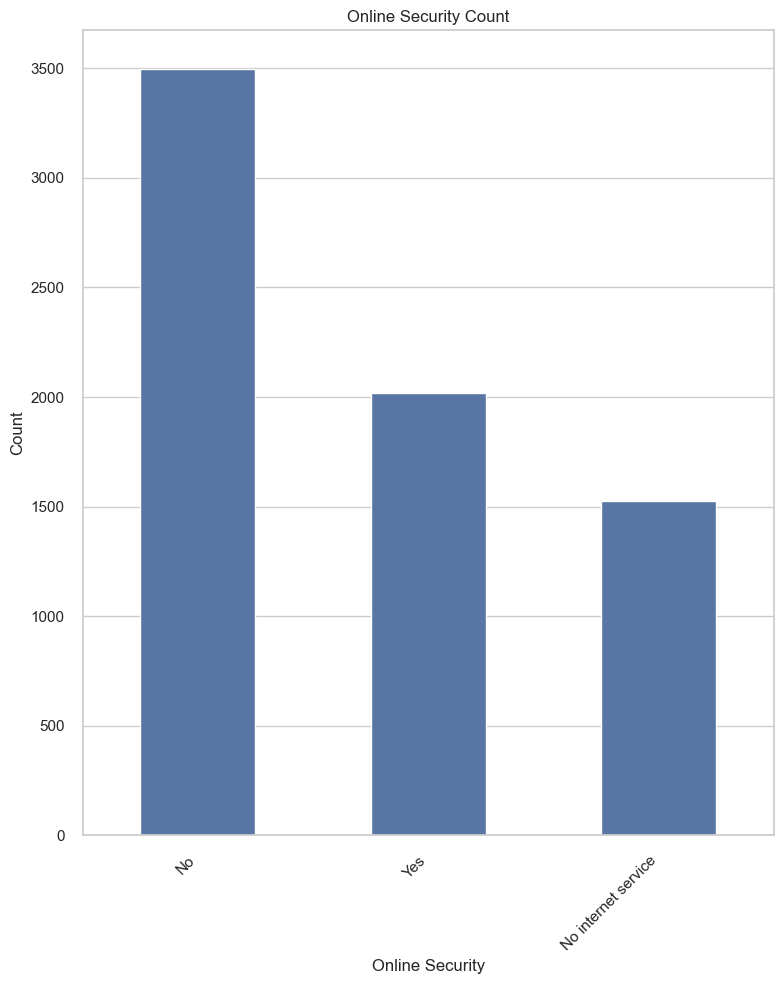

In [72]:
create_bar_plot(full_data_copy,'Online Security')

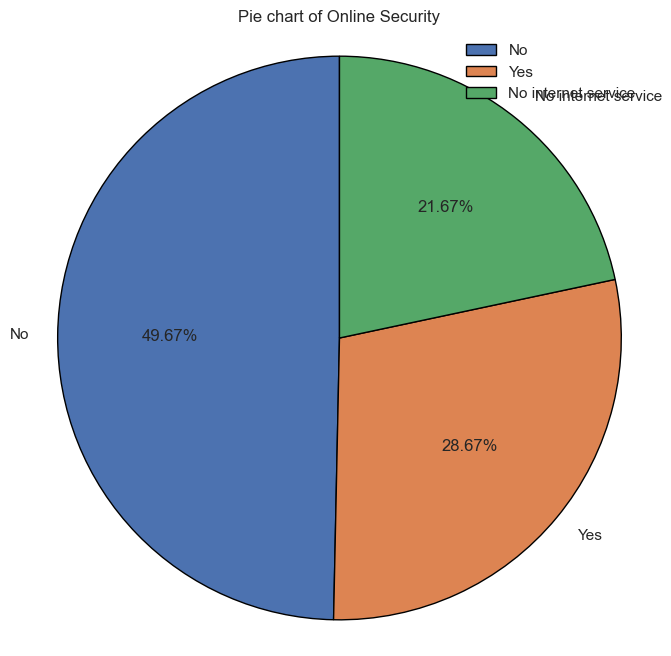

In [73]:
create_pie_plot(full_data_copy,'Online Security')

**Interpretation:**

- The `Online Security` feature indicates whether a customer subscribes to the online security add-on service.
- Among the **7,043 customers**, the distribution is as follows:
  - **No**: 3,498 customers (**49.67%**) do not have online security.
  - **Yes**: 2,019 customers (**28.67%**) have subscribed to online security.
  - **No internet service**: 1,526 customers (**21.67%**) do not use internet, thus this service is not applicable.

**Key Insights:**
- Nearly **half of the customers (49.67%)** with internet access do **not** use online security, which may imply:
  - Lack of awareness about cybersecurity threats
  - Perception that the service is unnecessary or overpriced
- Only **28.67%** use the online security service, representing a potential **growth opportunity** for upselling.
- Customers without internet service are **excluded** from this feature’s applicability and need to be handled separately during modeling.

**Business Implications:**
- Online security can be positioned as a **value-added service** to increase customer retention and revenue.
- Marketing campaigns can target customers who currently lack online security, especially in light of increasing cyber threats.

> In the telecom domain, online security services not only protect customers but also offer a chance to build customer trust and generate additional recurring revenue.


### 3.10) Online Backup

In [76]:
gen_info_feat(full_data_copy,'Online Backup')

Description:
count     7043
unique       3
top         No
freq      3088
Name: Online Backup, dtype: object
**************************************************
Object type:
object
**************************************************
Value count:
                     Count  Frequency (%)
Online Backup                            
No                    3088      43.844952
Yes                   2429      34.488144
No internet service   1526      21.666903


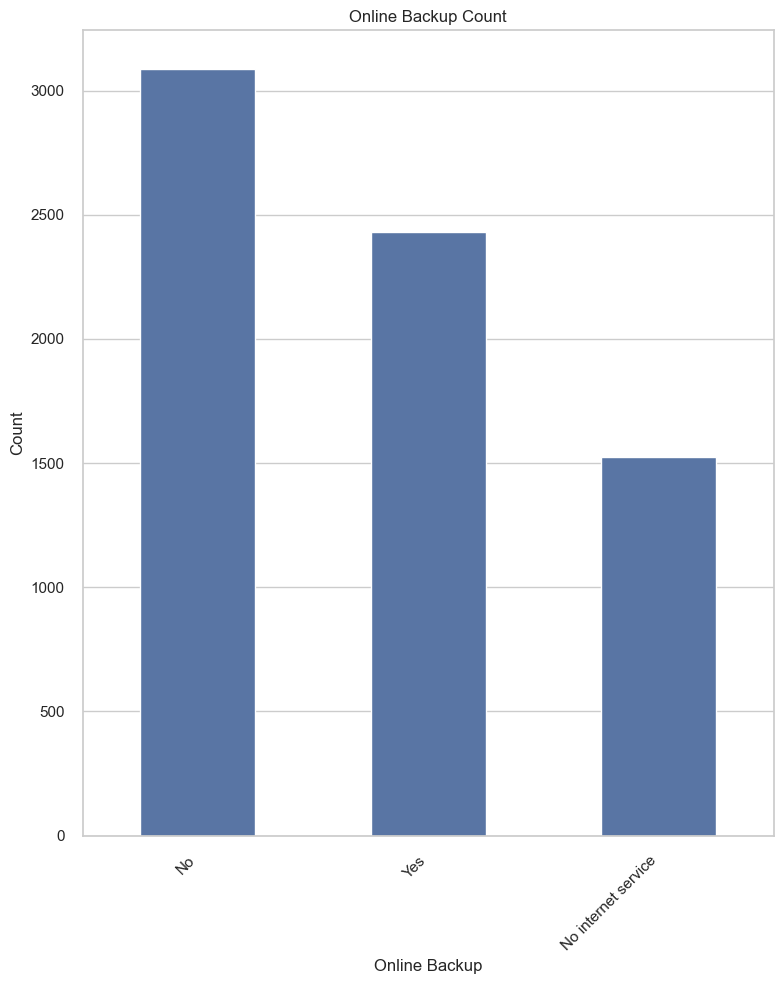

In [77]:
create_bar_plot(full_data_copy,'Online Backup')

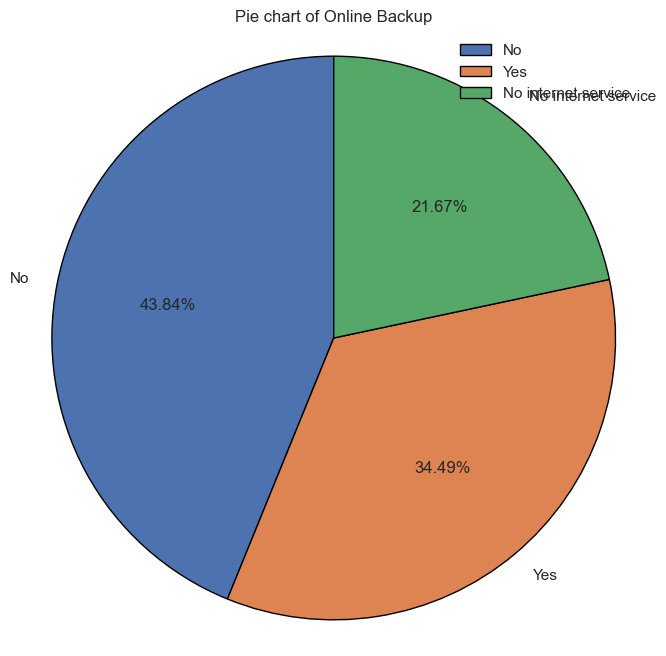

In [78]:
create_pie_plot(full_data_copy,'Online Backup')

**Interpretation:**

- The `Online Backup` feature indicates whether a customer subscribes to the online data backup service.
- Out of **7,043 customers**, the distribution is:
  - **No**: 3,088 customers (**43.84%**) do not use the online backup service.
  - **Yes**: 2,429 customers (**34.49%**) have subscribed to the service.
  - **No internet service**: 1,526 customers (**21.67%**) are not eligible for this service.

**Key Insights:**
- Nearly **44%** of customers with internet access do **not** use online backup, highlighting potential for upselling.
- Around **34.5%** of customers have adopted the service, indicating a moderate level of demand and awareness.
- Customers without internet should be excluded or treated separately during modeling and analysis.

**Business Implications:**
- Online Backup is a valuable **add-on service** that can help increase **Average Revenue Per User (ARPU)** through cross-selling.
- Marketing strategies should identify barriers (e.g., price sensitivity or lack of awareness) and emphasize data protection benefits.

> In the telecom sector, add-on services like Online Backup not only enhance customer experience but also offer strategic revenue opportunities and customer retention leverage.

### 3.11) Device Protection

In [81]:
gen_info_feat(full_data_copy,'Device Protection')

Description:
count     7043
unique       3
top         No
freq      3095
Name: Device Protection, dtype: object
**************************************************
Object type:
object
**************************************************
Value count:
                     Count  Frequency (%)
Device Protection                        
No                    3095      43.944342
Yes                   2422      34.388755
No internet service   1526      21.666903


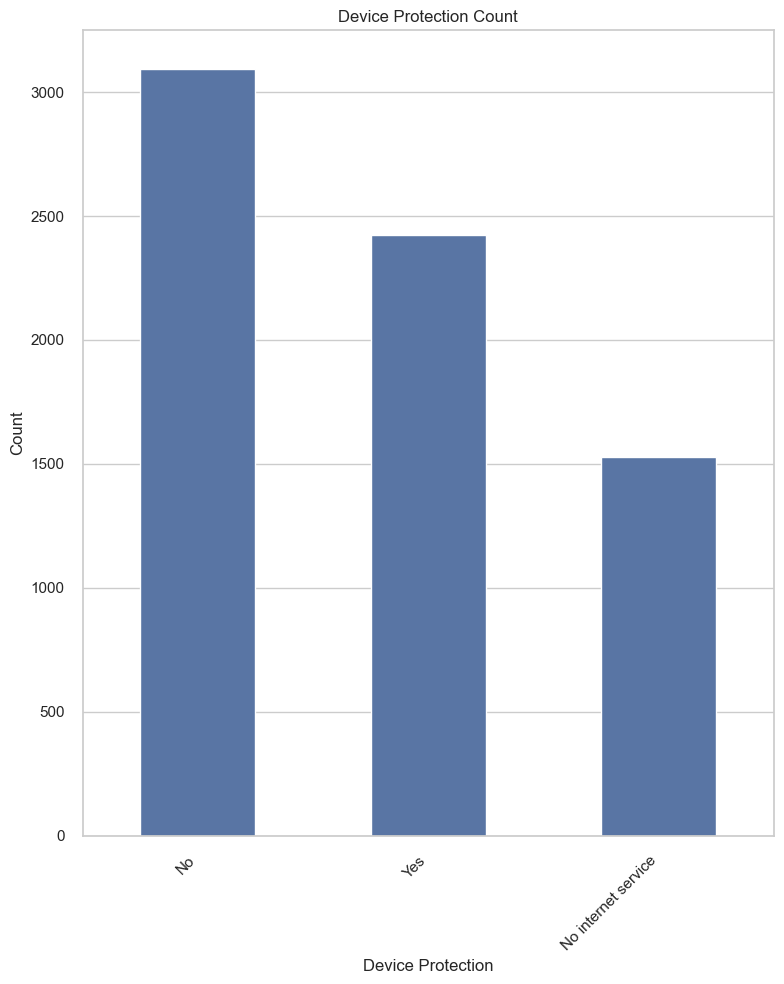

In [82]:
create_bar_plot(full_data_copy,'Device Protection')

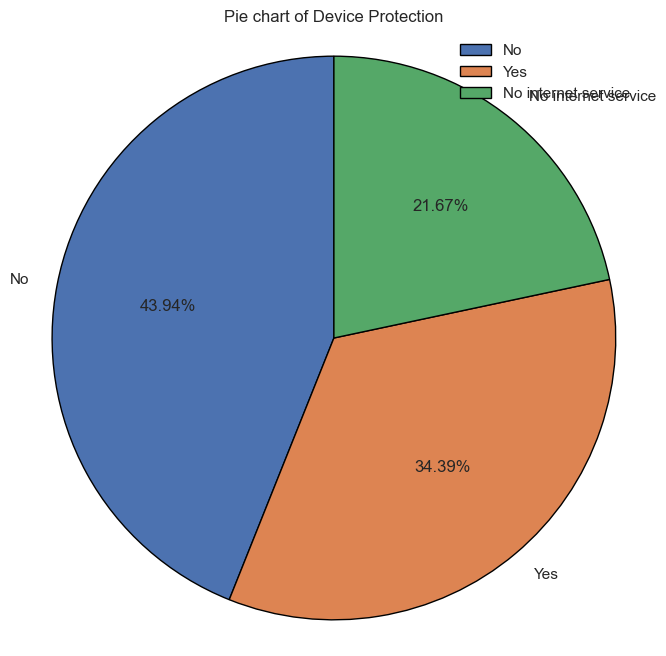

In [83]:
create_pie_plot(full_data_copy,'Device Protection')

**Interpretation:**

- The `Device Protection` feature shows whether a customer is subscribed to the device protection plan, which typically covers repairs or replacements for internet-connected devices.
- Among **7,043 customers**, the distribution is:
  - **No**: 3,095 customers (**43.94%**) do not have device protection.
  - **Yes**: 2,422 customers (**34.39%**) are subscribed to the service.
  - **No internet service**: 1,526 customers (**21.67%**) are not eligible for this offering.

**Key Insights:**
- A significant portion (**~44%**) of internet users have **not** opted for device protection, signaling an opportunity for product promotion.
- Approximately **one-third** of customers (34.39%) value the added security of protecting their devices, which may suggest higher engagement levels.

**Business Implications:**
- Device Protection is a potential **revenue driver** through upselling and bundling with other services.
- Customers who use such add-ons are often more invested in the service ecosystem and may exhibit **lower churn rates**.
- The telecom company can target non-subscribers through campaigns focused on **cost savings, convenience, and peace of mind**.

> In the competitive telecom industry, value-added services like Device Protection not only increase revenue but also enhance customer satisfaction and loyalty.


### 3.12) Tech Support

In [86]:
gen_info_feat(full_data_copy,'Tech Support')

Description:
count     7043
unique       3
top         No
freq      3473
Name: Tech Support, dtype: object
**************************************************
Object type:
object
**************************************************
Value count:
                     Count  Frequency (%)
Tech Support                             
No                    3473      49.311373
Yes                   2044      29.021724
No internet service   1526      21.666903


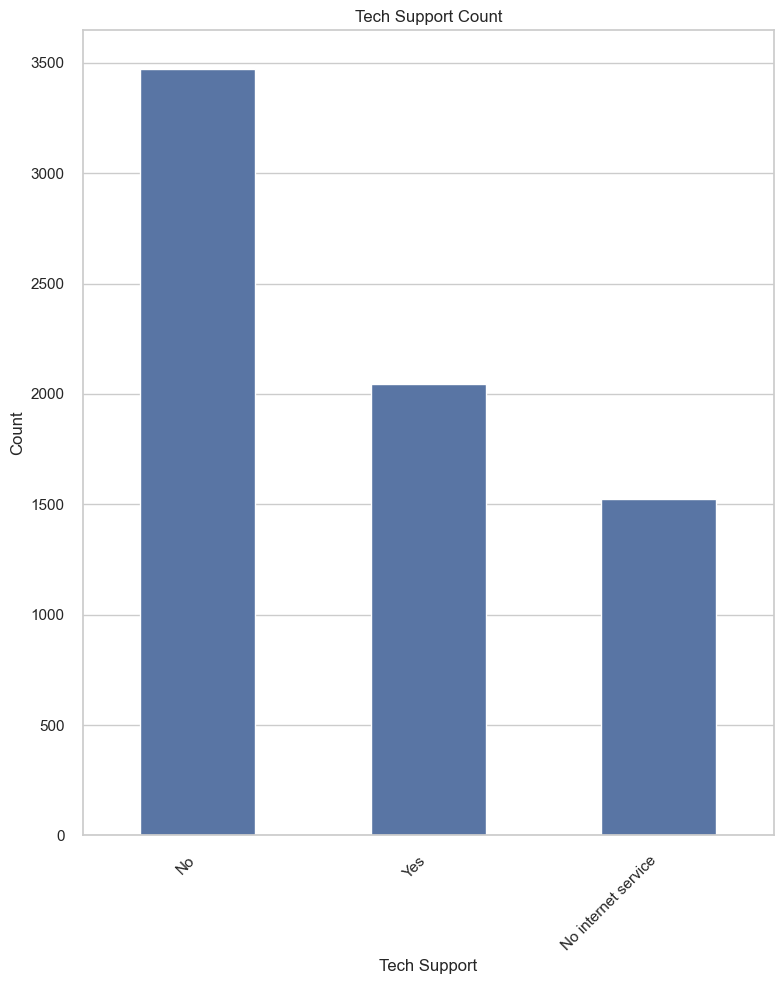

In [87]:
create_bar_plot(full_data_copy,'Tech Support')

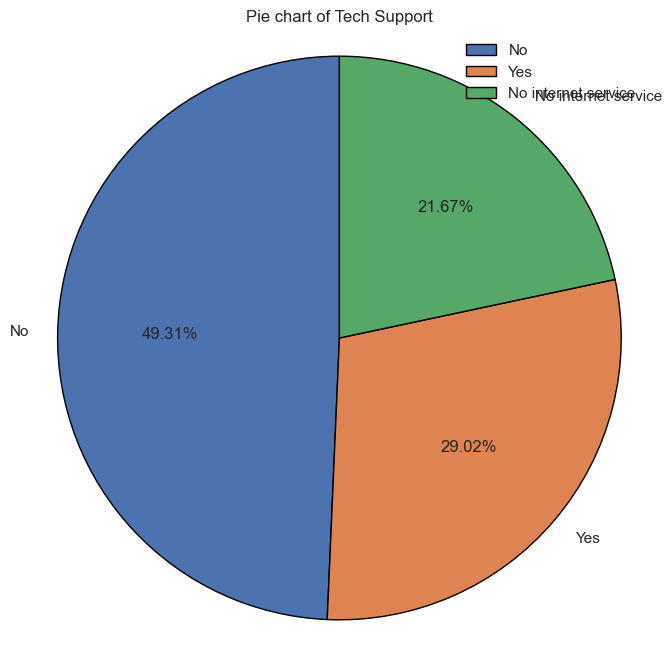

In [88]:
create_pie_plot(full_data_copy,'Tech Support')

**Interpretation:**

- The `Tech Support` feature indicates whether a customer has subscribed to technical support services, typically offering assistance with internet or device-related issues.
- Among **7,043 customers**, the service distribution is:
  - **No**: 3,473 customers (**49.31%**) do not use tech support.
  - **Yes**: 2,044 customers (**29.02%**) subscribe to this service.
  - **No internet service**: 1,526 customers (**21.67%**) are not eligible for tech support.

**Key Insights:**
- Nearly **half of the customers with internet** have **not subscribed** to tech support, presenting an opportunity for growth through education or bundling.
- About **29%** of customers actively use tech support, reflecting a moderate demand for hands-on service and possibly indicating customers who are less tech-savvy or value real-time help.

**Business Implications:**
- Tech support services can be marketed as part of **premium service packages** or offered as incentives to retain customers with frequent issues.
- Customers who subscribe to support may have **higher satisfaction and retention rates**, especially if they receive timely and effective assistance.
- There is a clear potential to **increase adoption** through improved awareness, trial offers, or as a bundled service with internet plans.

> In the telecom industry, offering dependable and accessible tech support is a key differentiator that can improve customer experience, reduce churn, and build long-term loyalty.


### 3.13) Streaming TV

In [91]:
gen_info_feat(full_data_copy,'Streaming TV')

Description:
count     7043
unique       3
top         No
freq      2810
Name: Streaming TV, dtype: object
**************************************************
Object type:
object
**************************************************
Value count:
                     Count  Frequency (%)
Streaming TV                             
No                    2810      39.897771
Yes                   2707      38.435326
No internet service   1526      21.666903


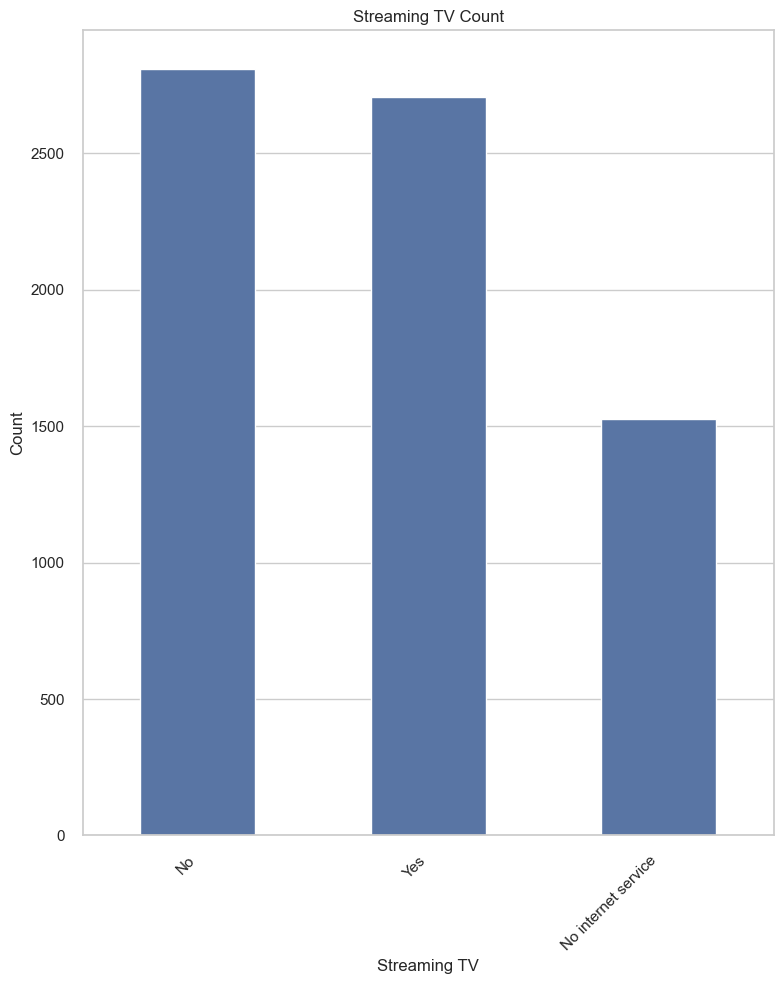

In [92]:
create_bar_plot(full_data_copy,'Streaming TV')

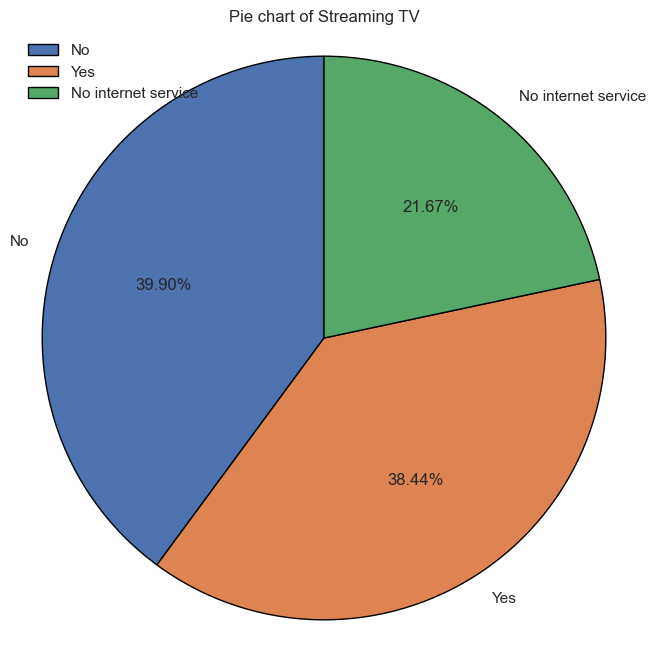

In [93]:
create_pie_plot(full_data_copy,'Streaming TV')

**Interpretation:**

- The `Streaming TV` feature captures whether a customer has access to streaming television services through their telecom provider.
- Across **7,043 customers**, the distribution is as follows:
  - **No**: 2,810 customers (**39.90%**) do not use the streaming TV service.
  - **Yes**: 2,707 customers (**38.44%**) subscribe to the service.
  - **No internet service**: 1,526 customers (**21.67%**) are not eligible for this feature.

**Key Insights:**
- The usage of streaming TV among internet users is **fairly balanced** between users and non-users, suggesting it is a well-known but not yet fully adopted add-on.
- With nearly **40% of customers not using** the service despite having internet, there is **room for growth** through bundling, education, or promotional offers.

**Business Implications:**
- Streaming services are becoming **central to digital lifestyle bundles**. Increasing adoption can lead to **higher ARPU (Average Revenue Per User)** and improve customer retention.
- Customers using streaming TV may be more **engaged** with the provider’s ecosystem and may exhibit **lower churn rates**.
- Telecom companies can boost adoption by highlighting **exclusive content**, **convenience**, or **cost advantages** over third-party platforms.

> In the current digital era, offering streaming services like TV is essential for telecom providers to remain competitive, drive engagement, and expand revenue streams.


### 3.14) Streaming Movies

In [96]:
gen_info_feat(full_data_copy,'Streaming Movies')

Description:
count     7043
unique       3
top         No
freq      2785
Name: Streaming Movies, dtype: object
**************************************************
Object type:
object
**************************************************
Value count:
                     Count  Frequency (%)
Streaming Movies                         
No                    2785      39.542808
Yes                   2732      38.790288
No internet service   1526      21.666903


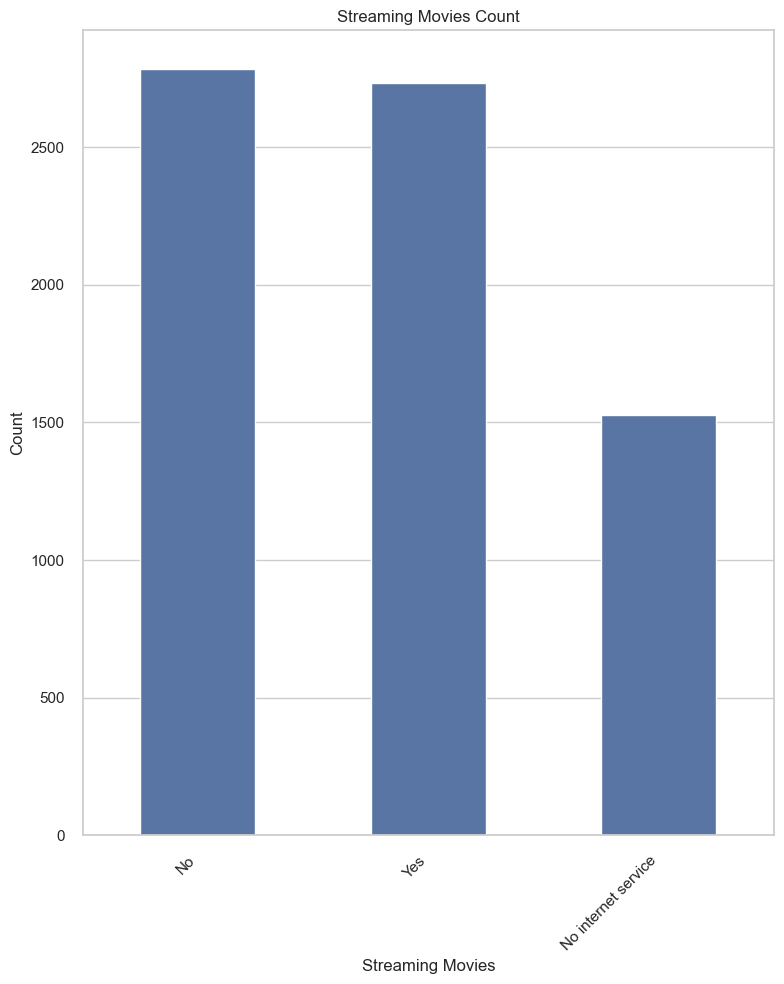

In [97]:
create_bar_plot(full_data_copy,'Streaming Movies')

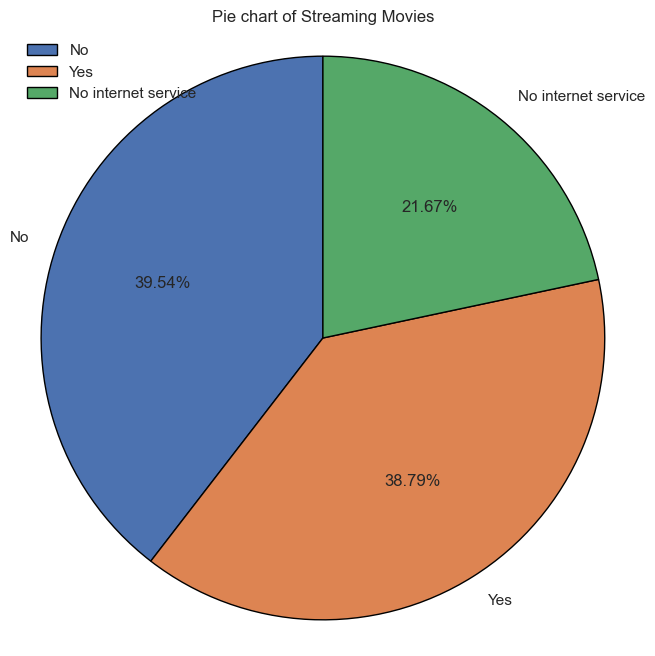

In [98]:
create_pie_plot(full_data_copy,'Streaming Movies')

**Interpretation:**

- The `Streaming Movies` feature indicates whether a customer subscribes to movie streaming services offered by the telecom provider.
- Out of **7,043 customers**, the distribution is:
  - **No**: 2,785 customers (**39.54%**) do not use the movie streaming service.
  - **Yes**: 2,732 customers (**38.79%**) use the service.
  - **No internet service**: 1,526 customers (**21.67%**) are not eligible for this service.

**Key Insights:**
- There is a **nearly equal split** between customers who subscribe and those who don’t among internet users, showing competitive adoption levels.
- The **small margin** between users and non-users suggests that slight improvements in marketing, pricing, or content could tip more customers toward adoption.

**Business Implications:**
- Streaming movies are part of the growing **digital entertainment market**, and bundling this service could enhance customer value perception.
- Offering exclusive content or seamless integration with existing telecom plans may help convert non-users.
- Customers engaged with entertainment services may have **higher satisfaction**, making them **less likely to churn** and more likely to adopt other digital products.

> In a competitive telecom landscape, providing compelling movie streaming services helps drive digital engagement, diversify revenue streams, and strengthen customer relationships.


### 3.15) Contract

In [101]:
gen_info_feat(full_data_copy,'Contract')

Description:
count               7043
unique                 3
top       Month-to-month
freq                3875
Name: Contract, dtype: object
**************************************************
Object type:
object
**************************************************
Value count:
                Count  Frequency (%)
Contract                            
Month-to-month   3875      55.019168
Two year         1695      24.066449
One year         1473      20.914383


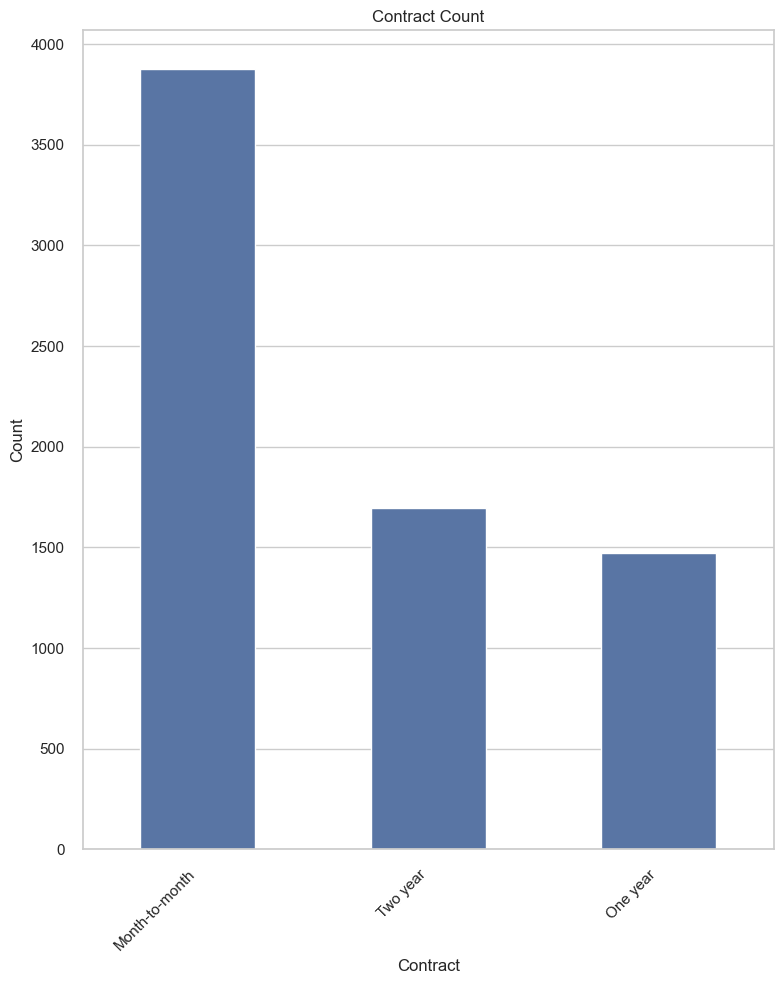

In [102]:
create_bar_plot(full_data_copy,'Contract')

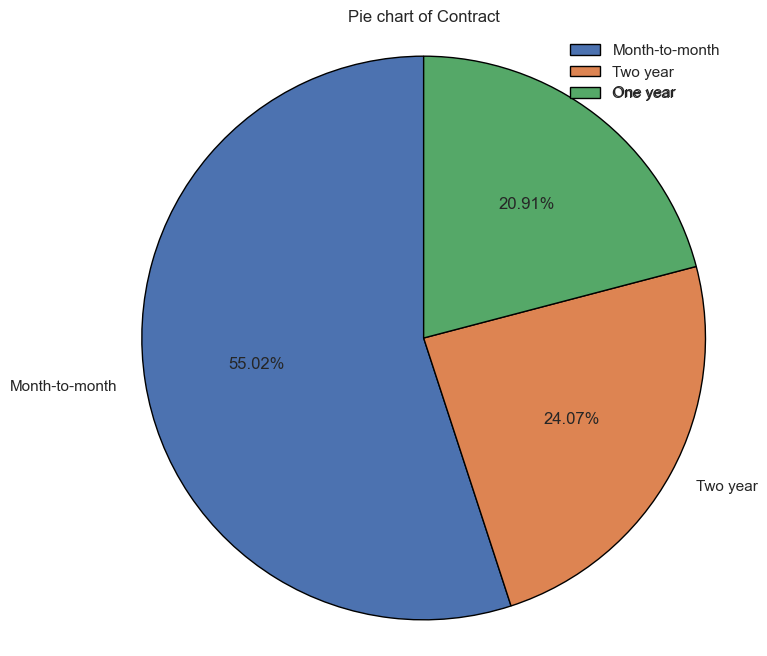

In [103]:
create_pie_plot(full_data_copy,'Contract')

**Interpretation:**

- The `Contract` feature indicates the type of agreement each customer has with the telecom provider.
- Among **7,043 customers**, the distribution is:
  - **Month-to-month**: 3,875 customers (**55.02%**) use a flexible, no-commitment plan.
  - **One year**: 1,473 customers (**20.91%**) are on annual contracts.
  - **Two year**: 1,695 customers (**24.07%**) have long-term commitments.

**Key Insights:**
- The **majority of customers (55%) are on month-to-month contracts**, which typically correlates with **higher churn risk**, as these customers can cancel anytime without penalty.
- Only about **45% of customers are locked into longer-term contracts**, which often come with discounts or promotional offers.

**Business Implications:**
- Customers on **month-to-month plans** should be prioritized for **retention strategies**, such as loyalty rewards, upselling bundles, or personalized discounts.
- Promoting the value and benefits of **long-term contracts** may reduce churn and improve revenue stability.
- Understanding the distribution of contract types helps in **segmenting the customer base** and optimizing retention campaigns.

> Since contract flexibility often equates to increased churn risk, telecom providers should take proactive steps to retain short-term customers while leveraging long-term contracts to build stable revenue.


### 3.16) Paperless Billing

In [106]:
gen_info_feat(full_data_copy,'Paperless Billing')

Description:
count     7043
unique       2
top        Yes
freq      4171
Name: Paperless Billing, dtype: object
**************************************************
Object type:
object
**************************************************
Value count:
                   Count  Frequency (%)
Paperless Billing                      
Yes                 4171      59.221922
No                  2872      40.778078


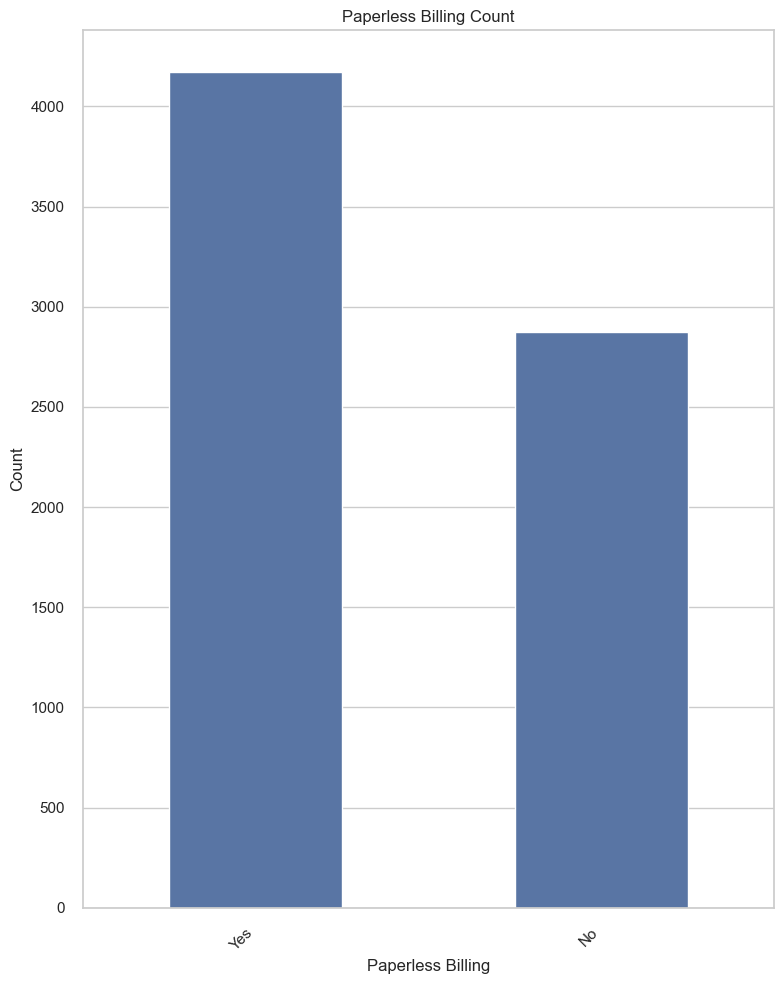

In [107]:
create_bar_plot(full_data_copy,'Paperless Billing')

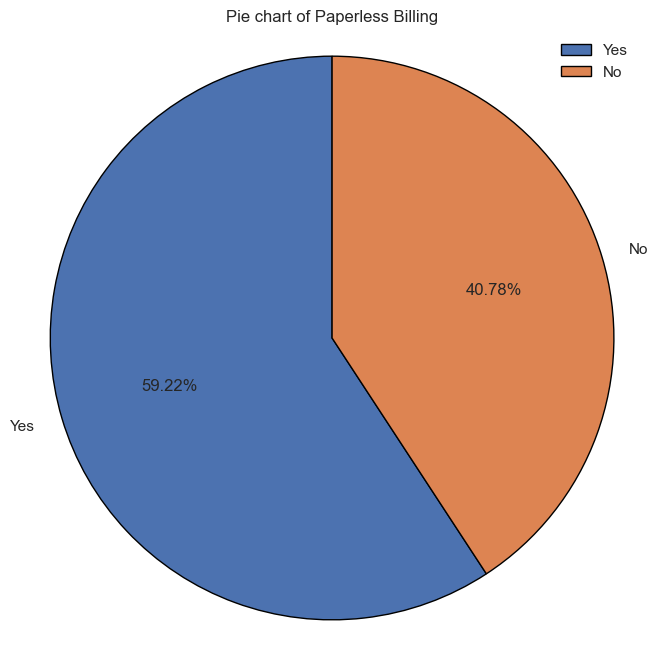

In [108]:
create_pie_plot(full_data_copy,'Paperless Billing')

**Interpretation:**

- The `Paperless Billing` feature indicates whether a customer has opted to receive bills electronically instead of by mail.
- Among **7,043 customers**, the distribution is:
  - **Yes**: 4,171 customers (**59.22%**) receive bills via email or online.
  - **No**: 2,872 customers (**40.78%**) still receive paper bills.

**Key Insights:**
- A **majority of customers (nearly 60%) prefer paperless billing**, reflecting a shift toward **digital convenience and sustainability**.
- Paperless billing adoption may correlate with other **digital behaviors** such as use of online services or electronic payments.
- The remaining **40% using paper billing** could represent either older demographics, customers less comfortable with technology, or those in areas with limited internet access.

**Business Implications:**
- Encouraging customers to switch to paperless billing can **reduce operational costs** and improve environmental impact.
- Paperless billing users may be more receptive to **digital engagement strategies**, such as app-based promotions or service updates.
- There may be a potential to **upsell or cross-sell digital products** more effectively to this segment.

> Promoting paperless billing not only supports operational efficiency and eco-friendliness, but also provides a valuable touchpoint to foster customer engagement in the digital ecosystem.


### 3.17) Payment Method

In [111]:
gen_info_feat(full_data_copy,'Payment Method')

Description:
count                 7043
unique                   4
top       Electronic check
freq                  2365
Name: Payment Method, dtype: object
**************************************************
Object type:
object
**************************************************
Value count:
                           Count  Frequency (%)
Payment Method                                 
Electronic check            2365      33.579441
Mailed check                1612      22.887974
Bank transfer (automatic)   1544      21.922476
Credit card (automatic)     1522      21.610109


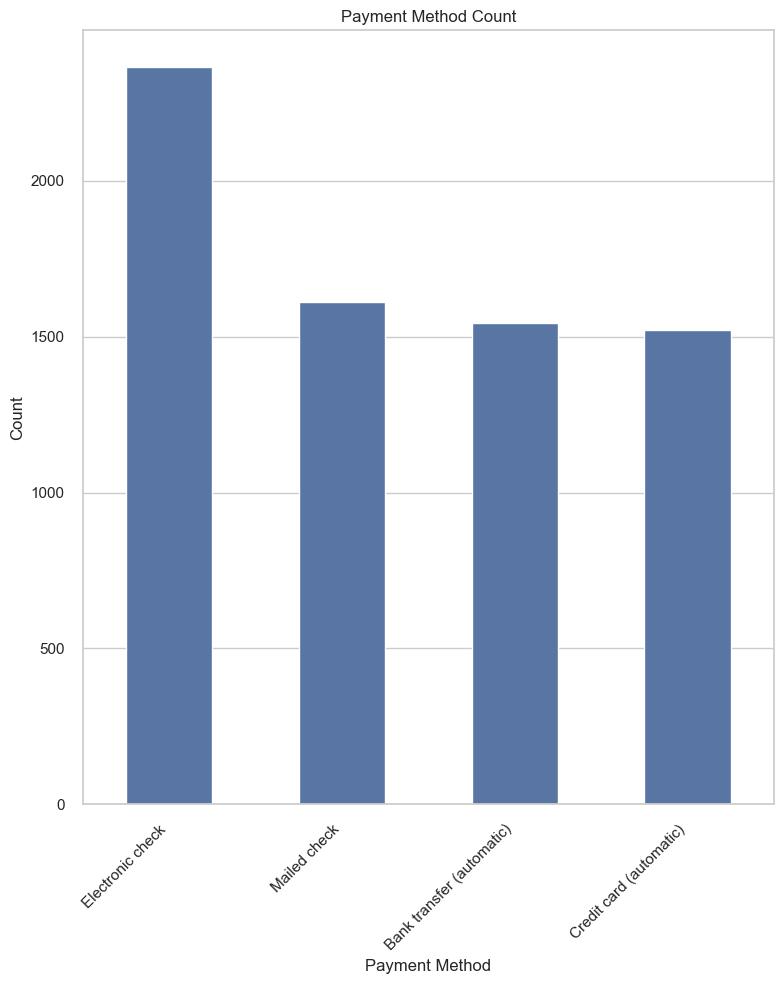

In [112]:
create_bar_plot(full_data_copy,'Payment Method')

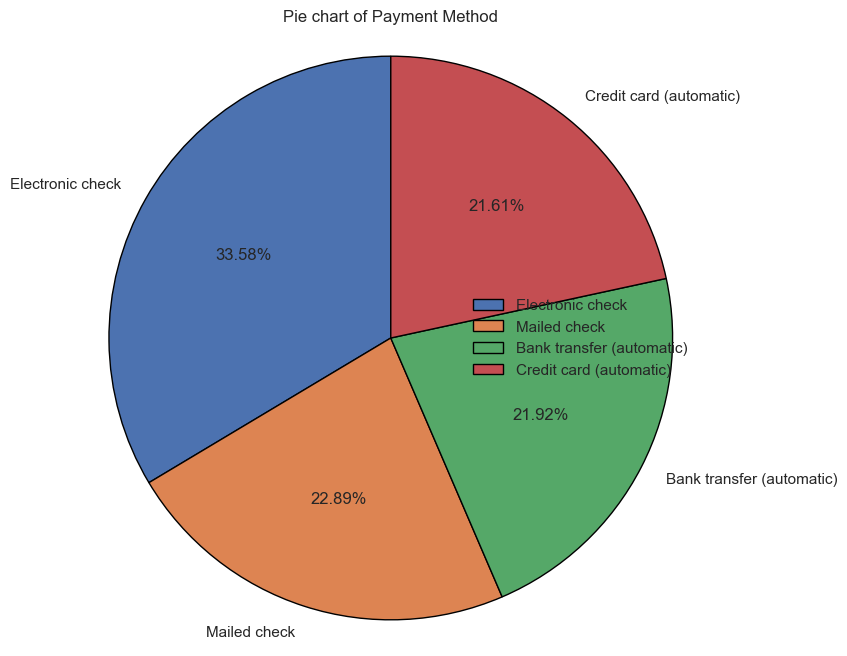

In [113]:
create_pie_plot(full_data_copy,'Payment Method')

**Interpretation:**

- The `Payment Method` feature shows how customers pay their bills.
- Among **7,043 customers**, the payment methods are distributed as follows:
  - **Electronic check**: 2,365 customers (**33.58%**) – the most common method.
  - **Mailed check**: 1,612 customers (**22.89%**).
  - **Bank transfer (automatic)**: 1,544 customers (**21.92%**).
  - **Credit card (automatic)**: 1,522 customers (**21.61%**).

**Key Insights:**
- **Electronic checks are the most used payment method**, possibly due to ease of use or default billing options.
- Around **43.5% of customers (bank transfer + credit card)** use **automatic payments**, indicating a significant segment prefers convenience and regularity in billing.
- **Mailed checks** are still used by nearly a quarter of customers, likely reflecting **older users or those less digitally inclined**.

**Business Implications:**
- Customers using **automatic payments** may exhibit **lower churn rates** due to reduced friction in billing.
- Those paying via **mailed or electronic checks** might benefit from **incentives to switch to auto-pay**, reducing late payments and support costs.
- Payment method preferences can help segment users for **targeted financial products** or **personalized offers** (e.g., discounts for enabling auto-pay).

> Understanding payment behavior is crucial for enhancing the billing experience, reducing payment-related churn, and aligning product offerings with customer preferences.


### 3.18) Monthly Charges

In [116]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
gen_info_feat(full_data_copy,'Monthly Charges')

Description:
count   7043.00
mean      64.76
std       30.09
min       18.25
25%       35.50
50%       70.35
75%       89.85
max      118.75
Name: Monthly Charges, dtype: float64
**************************************************
Object type:
float64
**************************************************
Value count:
                 Count  Frequency (%)
Monthly Charges                      
20.05               61           0.87
19.85               45           0.64
19.95               44           0.62
19.90               44           0.62
20.00               43           0.61
...                ...            ...
23.65                1           0.01
114.70               1           0.01
43.65                1           0.01
87.80                1           0.01
78.70                1           0.01

[1585 rows x 2 columns]


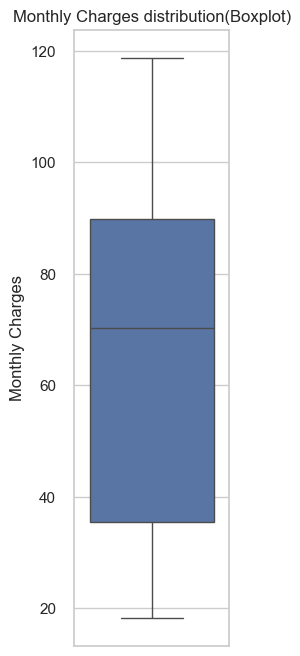

In [117]:
create_box_plot(full_data_copy,'Monthly Charges')

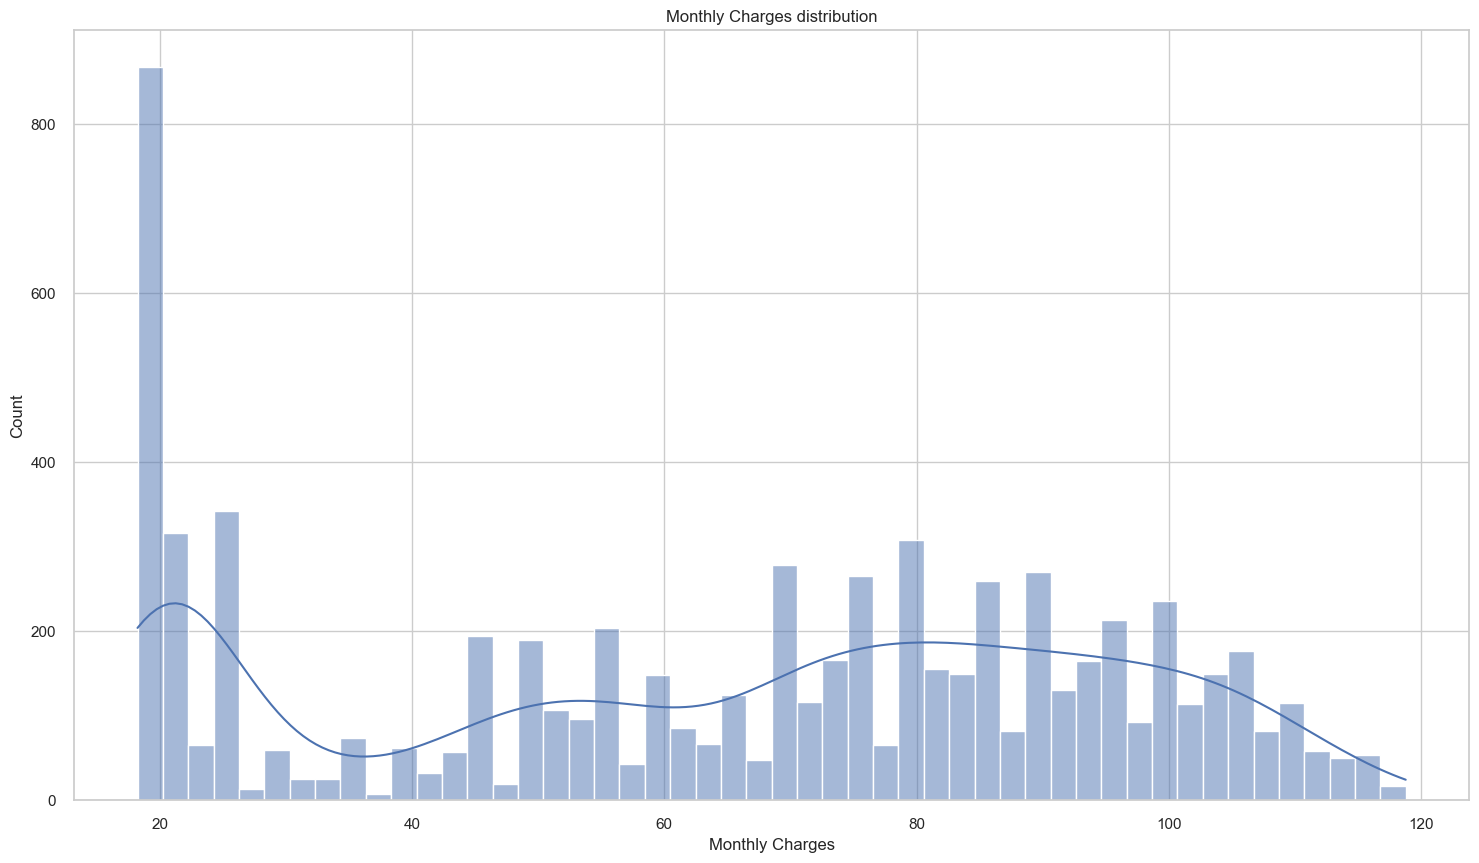

In [118]:
create_hist_plot(full_data_copy,'Monthly Charges')

Churn
No    61.27
Yes   74.44
Name: Monthly Charges, dtype: float64


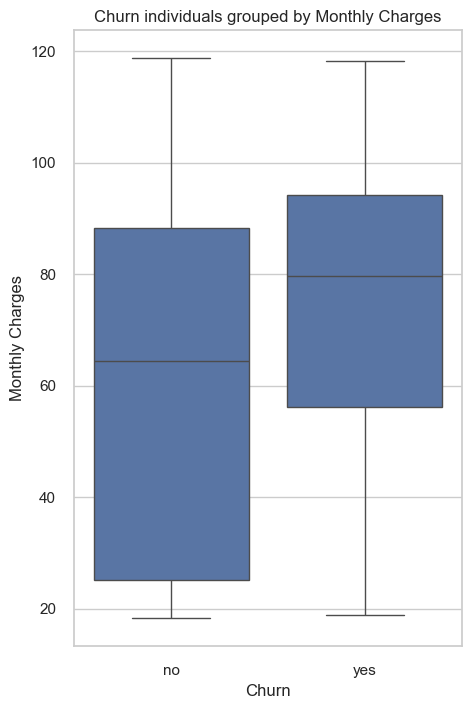

In [119]:
churn_box_plot(full_data_copy,'Monthly Charges')

**Interpretation: Monthly Charges Distribution**

- The average monthly charge among customers is **64.76**, with a **median of 70.35**.
- The distribution of `Monthly Charges` is **non-normal**, with **multiple peaks (multimodal)**.
- A **significant spike around 20** suggests a large number of customers subscribe to **basic or standalone services**.
- Beyond that, charges are widely spread across higher price ranges (e.g., 50–100), with **several small peaks**, reflecting **diverse service bundles**.
- The distribution is **slightly right-skewed**, not left-skewed — more customers are in the lower pricing tiers, but a long tail of higher-paying customers still exists.

---

**Churn Analysis by Monthly Charges**

- **Churned customers** have a **higher average monthly charge** of **74.44**.
- **Non-churned customers** pay on average **61.27** per month.
- This suggests that **customers with higher monthly spending are more likely to churn**.

> **Conclusion:** `Monthly Charges` is a useful predictor of churn.  
> Higher-paying customers may churn due to **unmet expectations**, **pricing dissatisfaction**, or **complex service bundles**.  
> It is crucial for telecom companies to **closely monitor the experience and satisfaction of high-value customer segments** to reduce churn.



### 3.19) Total Charges

In [122]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
gen_info_feat(full_data_copy,'Total Charges')

Description:
count   7032.00
mean    2283.30
std     2266.77
min       18.80
25%      401.45
50%     1397.47
75%     3794.74
max     8684.80
Name: Total Charges, dtype: float64
**************************************************
Object type:
float64
**************************************************
Value count:
               Count  Frequency (%)
Total Charges                      
20.20             11           0.16
19.75              9           0.13
20.05              8           0.11
19.90              8           0.11
19.65              8           0.11
...              ...            ...
6849.40            1           0.01
692.35             1           0.01
130.15             1           0.01
3211.90            1           0.01
6844.50            1           0.01

[6530 rows x 2 columns]


In [123]:
job_title_nan_count = full_data_copy['Total Charges'].isna().sum()
rows_total_count = full_data_copy.shape[0]
print('The percentage of missing rows is {:.2f} %'.format(job_title_nan_count * 100 / rows_total_count))

The percentage of missing rows is 0.16 %


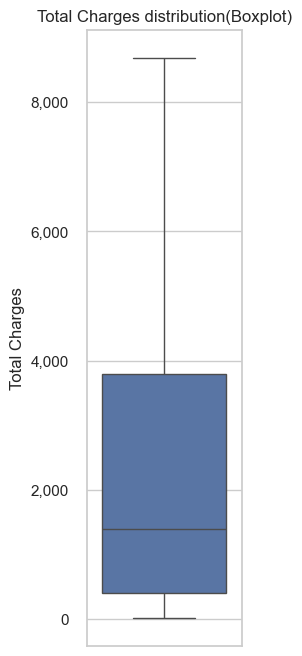

In [124]:
create_box_plot(full_data_copy,'Total Charges')

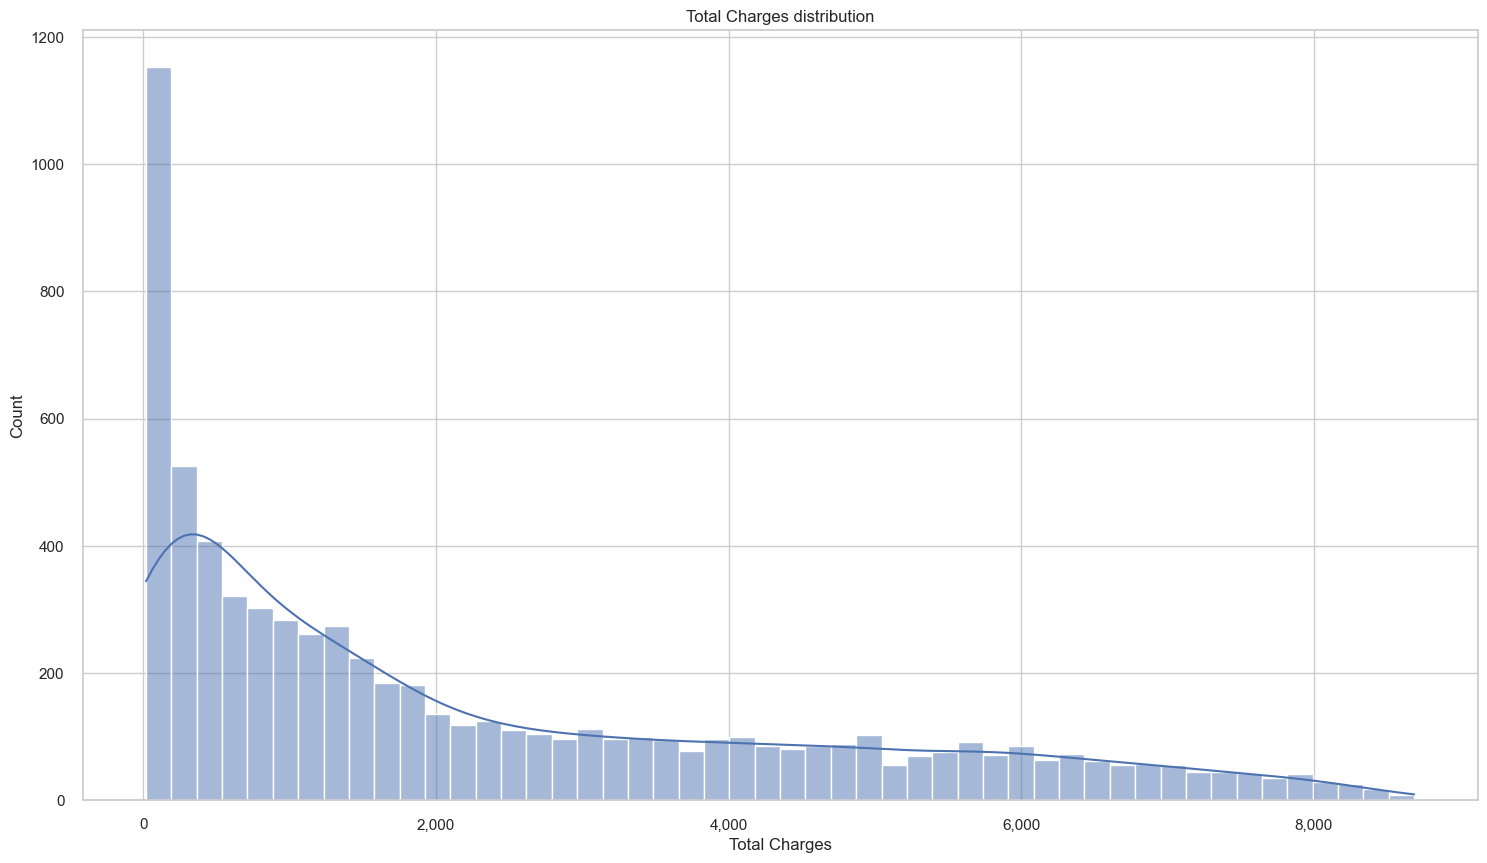

In [125]:
create_hist_plot(full_data_copy,'Total Charges')

Churn
No    2555.34
Yes   1531.80
Name: Total Charges, dtype: float64


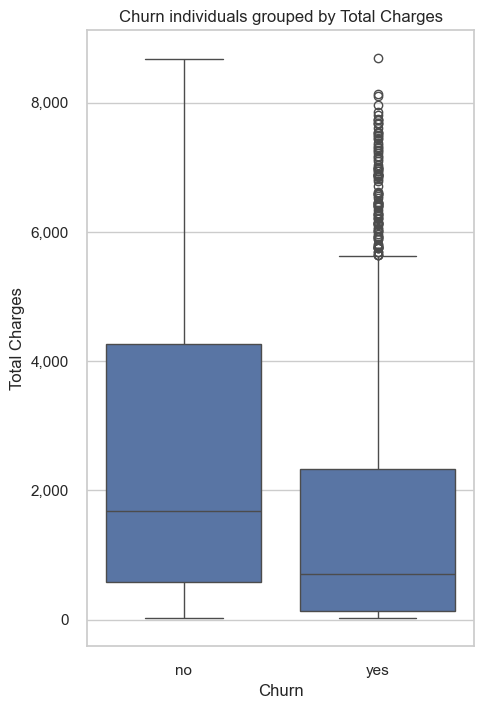

In [126]:
churn_box_plot(full_data_copy,'Total Charges')

**Interpretation:**

**Distribution of Total Charges**

- The distribution of **Total Charges** is **right-skewed**, with most customers incurring relatively low total expenses.
- The **mean** Total Charges is **2,283.30**, while the **median** is only **1,397.47**, confirming the presence of a long tail with a few customers incurring very high charges.
- This indicates that a large portion of the customer base either recently joined or left early, accumulating lower charges.

**Total Charges vs. Churn**

- Customers who **did not churn** had significantly **higher average Total Charges** (**2,555.34**) compared to those who **churned** (**1,531.80**).
- The boxplot shows a lower median and interquartile range for churned customers, suggesting they left early or engaged less with services.
- This supports the intuition that **loyal customers**, who stay longer and use more services, tend to generate higher revenue over time.

**Business Insights for Telecom**

- Low Total Charges may serve as an **early warning signal** for potential churn, especially for new customers or those with low engagement.
- While Total Charges is a useful indicator, it should be combined with other features such as:
  - **Tenure** (duration of service usage)
  - **Monthly Charges**
  - **Contract Type**
  - **Customer service interactions**
  - **Service usage behavior (e.g., internet, phone, streaming)**

### 3.20) Churn

In [129]:
gen_info_feat(full_data_copy,'Churn')

Description:
count     7043
unique       2
top         No
freq      5174
Name: Churn, dtype: object
**************************************************
Object type:
object
**************************************************
Value count:
       Count  Frequency (%)
Churn                      
No      5174          73.46
Yes     1869          26.54


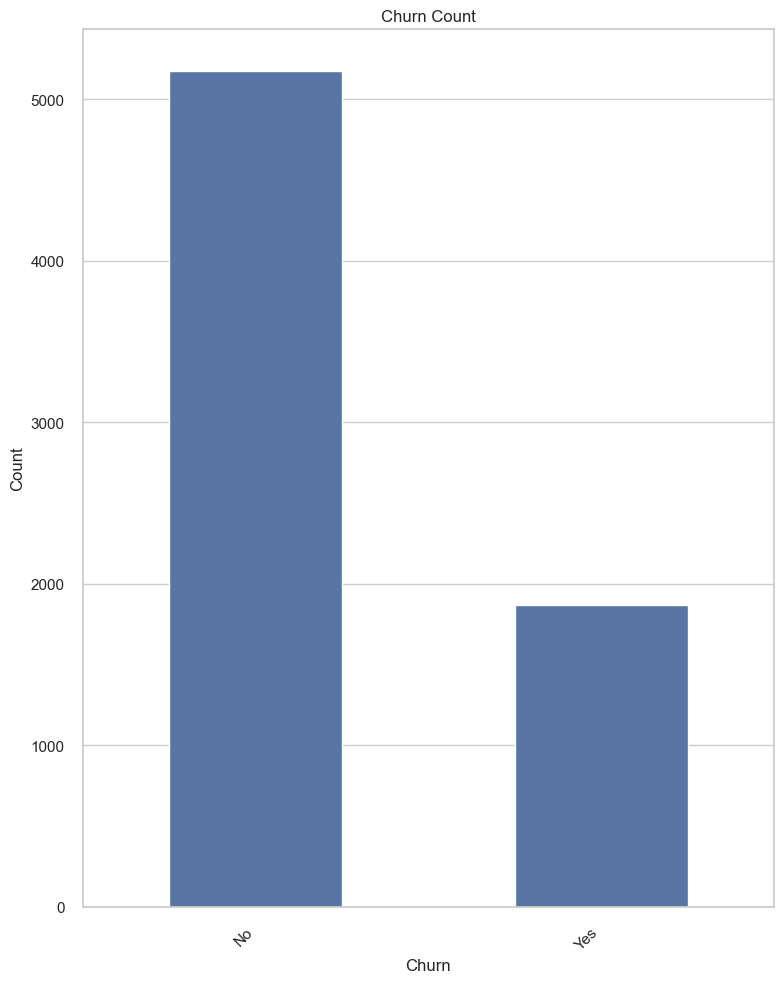

In [130]:
create_bar_plot(full_data_copy,'Churn')

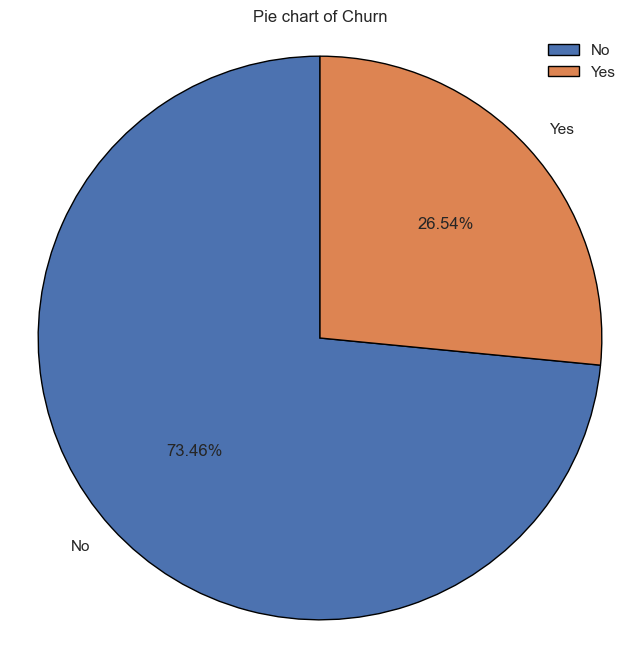

In [131]:
create_pie_plot(full_data_copy,'Churn')

**Interpretation:**
**Churn Distribution**

- The dataset contains **7,043 customers**, of which:
  - **5,174 customers (73.46%)** have **not churned** (`No`).
  - **1,869 customers (26.54%)** have **churned** (`Yes`).

**Business Interpretation**

- The churn rate of **26.54%** is relatively high in the telecom industry, signaling a **potential customer retention issue**.
- Given the competitive nature of telecom services (e.g., mobile, internet, TV), understanding the reasons behind churn is **critical** for reducing customer loss and maintaining market share.

**Implications**

- A churn rate above 20% typically warrants **immediate strategic attention**, such as:
  - Enhancing **customer experience** and service quality.
  - Improving **loyalty programs** or **long-term contract incentives**.
  - Proactively identifying and engaging with **at-risk customers**.

## 4) Bivariate analysis

### 4.1) Numerical vs numerical features (Correlation & scatter plots)

#### 4.1.1) Scatter plots

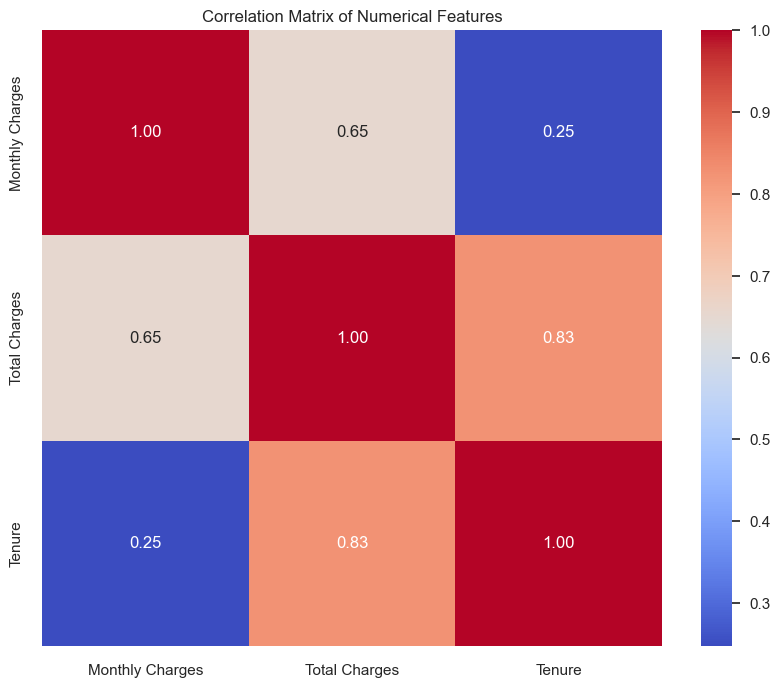

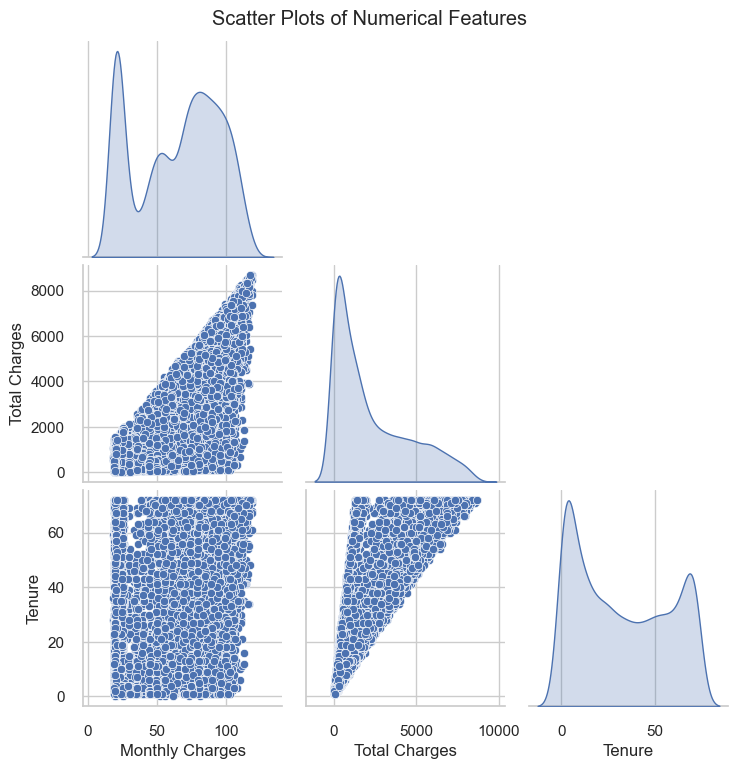

In [136]:
numerical_cols = [
    'Monthly Charges',
    'Total Charges',
    'Tenure'
]

plt.figure(figsize=(10, 8))
correlation_matrix = full_data_copy[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

sns.pairplot(full_data_copy[numerical_cols], diag_kind='kde', corner=True)
plt.suptitle('Scatter Plots of Numerical Features', y=1.02)
plt.show()


**Interpretation of Correlation and Scatter Plots**

- We can see a **strong positive linear correlation** between **Total Charges** and **Tenure** (**correlation = 0.83**).  
  - This makes intuitive sense: the longer a customer stays (tenure), the more they are likely to be charged in total.  
  - This is a typical **multicollinearity issue**, as both variables capture overlapping aspects of time-based customer behavior.  
  - In a modeling context, we might consider removing one of them to reduce redundancy or apply dimensionality reduction techniques.

- There is also a **moderate positive correlation** between **Monthly Charges** and **Total Charges** (**correlation = 0.65**).  
  - This is expected, since monthly charges directly contribute to total charges.  
  - While this pair does not show extreme multicollinearity, it highlights an inherent relationship and may still affect model interpretability.

- The correlation between **Monthly Charges** and **Tenure** is **weak** (**correlation = 0.25**).  
  - This indicates that the amount a customer pays monthly is not strongly dependent on how long they've stayed.  
  - This separation can be valuable in modeling, as these features may contribute **independently** to churn prediction or customer segmentation.

---

**Insights from Scatter Plots**

- The **Total Charges vs. Tenure** plot shows a **clear diagonal pattern**, reinforcing the strong linear relationship.
- The **Monthly Charges** distributions appear **multimodal**, suggesting the presence of subgroups in pricing (e.g., different service tiers or add-ons).
- The **Tenure** distribution shows a notable **spike at early and later tenure values**, possibly indicating **short-term and long-term customer groups**.

##### 4.1.1.1)  Tenure and Total Charges

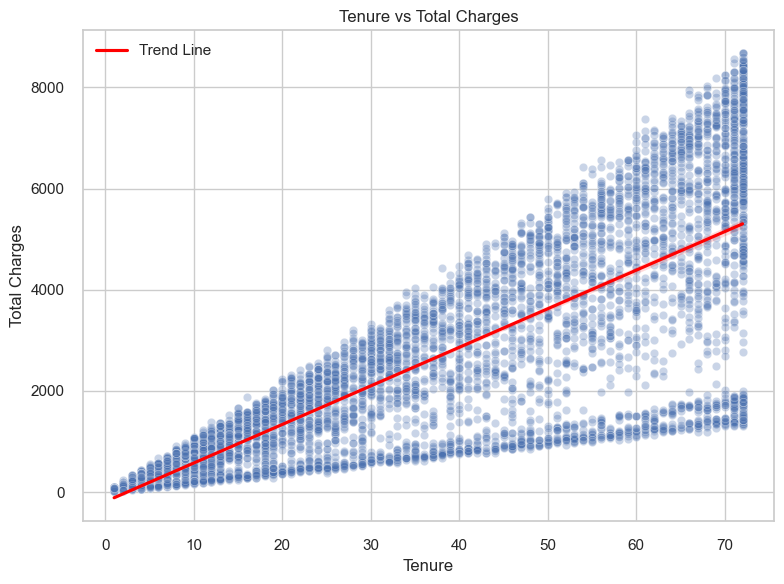

In [139]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=full_data_copy, x='Tenure', y='Total Charges', alpha=0.3)
sns.regplot(data=full_data_copy, x='Tenure', y='Total Charges', scatter=False, color='red', label='Trend Line')

plt.title('Tenure vs Total Charges')
plt.xlabel('Tenure')
plt.ylabel('Total Charges')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**Observations:**

- There is a **strong linear correlation** between `Tenure` and `Total Charges`, clearly illustrated by the red trend line.
  - This makes sense, as the longer a customer stays, the more they are likely to pay in total.
- The data points form a **triangular pattern**:
  - The **bottom corner** near the origin shows new customers with low total charges.
  - The **upper spread** suggests variability in `Total Charges` even for customers with the same `Tenure`, possibly due to:
    - Differences in `Monthly Charges`.
    - Additional services or promotions.
    - Periods of service interruption or billing adjustments.
- The trend line shows a **stable linear increase**, though many points fall **below the line**, which may indicate:
  - Customers using low-cost plans.
  - Discounts or service waivers.
  - Inactive or partially active accounts.

**Implications for Modeling:**

- The high linear relationship (**correlation ≈ 0.83**) implies possible **multicollinearity** if both variables are used in a predictive model.
- Consider **removing one of the two variables**, or apply techniques like **PCA**, **regularization**, or **feature selection** to prevent model bias or overfitting.

##### 4.1.1.2) Monthly Charges and Total Charges

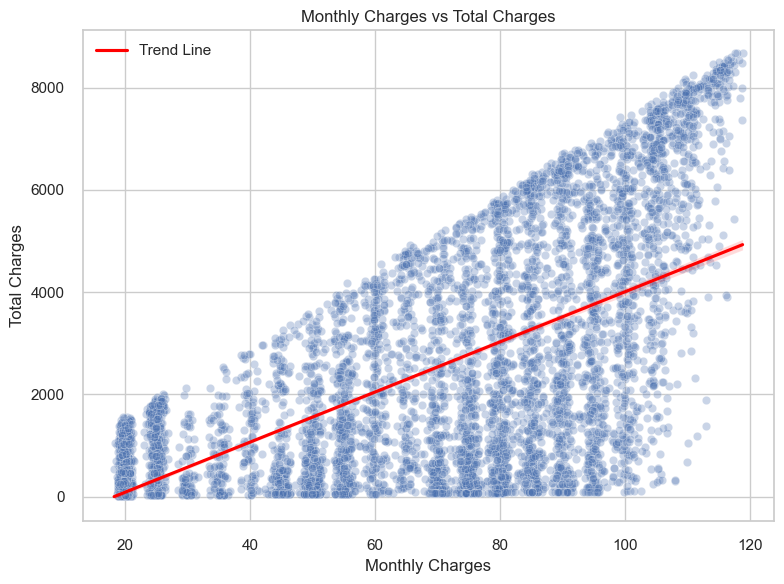

In [142]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=full_data_copy, x='Monthly Charges', y='Total Charges', alpha=0.3)
sns.regplot(data=full_data_copy, x='Monthly Charges', y='Total Charges', scatter=False, color='red', label='Trend Line')

plt.title('Monthly Charges vs Total Charges')
plt.xlabel('Monthly Charges')
plt.ylabel('Total Charges')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**Observations:**

- There is a **moderate positive linear relationship** between `Monthly Charges` and `Total Charges`.
  - This is expected, as customers with higher monthly fees typically accumulate more charges over time.
- Unlike the previous `Tenure vs Total Charges` chart, the spread is **more scattered**, especially in the vertical direction:
  - Many customers with the **same Monthly Charge** have **different Total Charges**, which indicates varying lengths of service (`Tenure`).
- The **red trend line** shows a clear upward slope, confirming the positive correlation.
- The bottom-left section shows customers with both low monthly and total charges — possibly **new or short-term users**.
- The top-right section reflects **long-term customers** with **high monthly plans**.

**Implications for Modeling:**

- While `Monthly Charges` does influence `Total Charges`, the correlation is weaker than with `Tenure`.
- The relationship is **partially linear**, but with **significant dispersion** due to factors like `Tenure`, discounts, or add-on services.
- It’s advisable to include **both `Tenure` and `Monthly Charges`** when modeling `Total Charges`, or carefully assess multicollinearity if using `Total Charges` as a target.

##### 4.1.1.3) Tenure ánd Monthly Charges

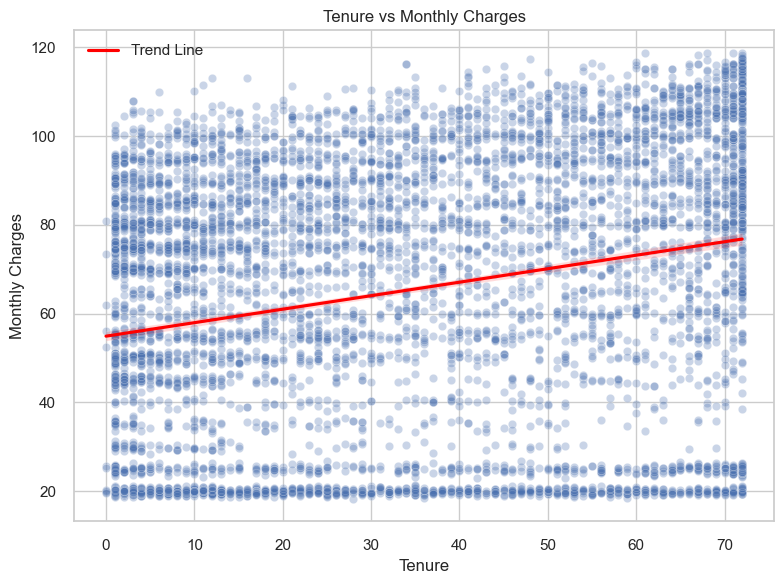

In [145]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=full_data_copy, x='Tenure', y='Monthly Charges', alpha=0.3)
sns.regplot(data=full_data_copy, x='Tenure', y='Monthly Charges', scatter=False, color='red', label='Trend Line')

plt.title('Tenure vs Monthly Charges')
plt.xlabel('Tenure')
plt.ylabel('Monthly Charges')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**Observations:**

- There is **very little correlation** between `Tenure` and `Monthly Charges`.
  - The red **trend line is nearly flat**, indicating a weak or non-existent linear relationship.
- Customers with short and long tenure are distributed across **all levels of monthly charges**.
  - This suggests that **monthly charges are not influenced by how long a customer has been with the company**.
- A large concentration of customers is around **$20, $70, and $100**, which may correspond to specific service plans or packages.
- The plot shows **horizontal bands** at those fixed prices, reinforcing the idea of **standardized pricing tiers**.

**Implications for Modeling:**

- `Tenure` and `Monthly Charges` are mostly **independent** features.
- While both are important for modeling customer behavior, one should not expect `Tenure` to explain changes in `Monthly Charges`.
- This supports the idea that monthly charges are based on **subscription plan** rather than customer loyalty or time.

### 4.2) Numerical vs categorical features (ANOVA)

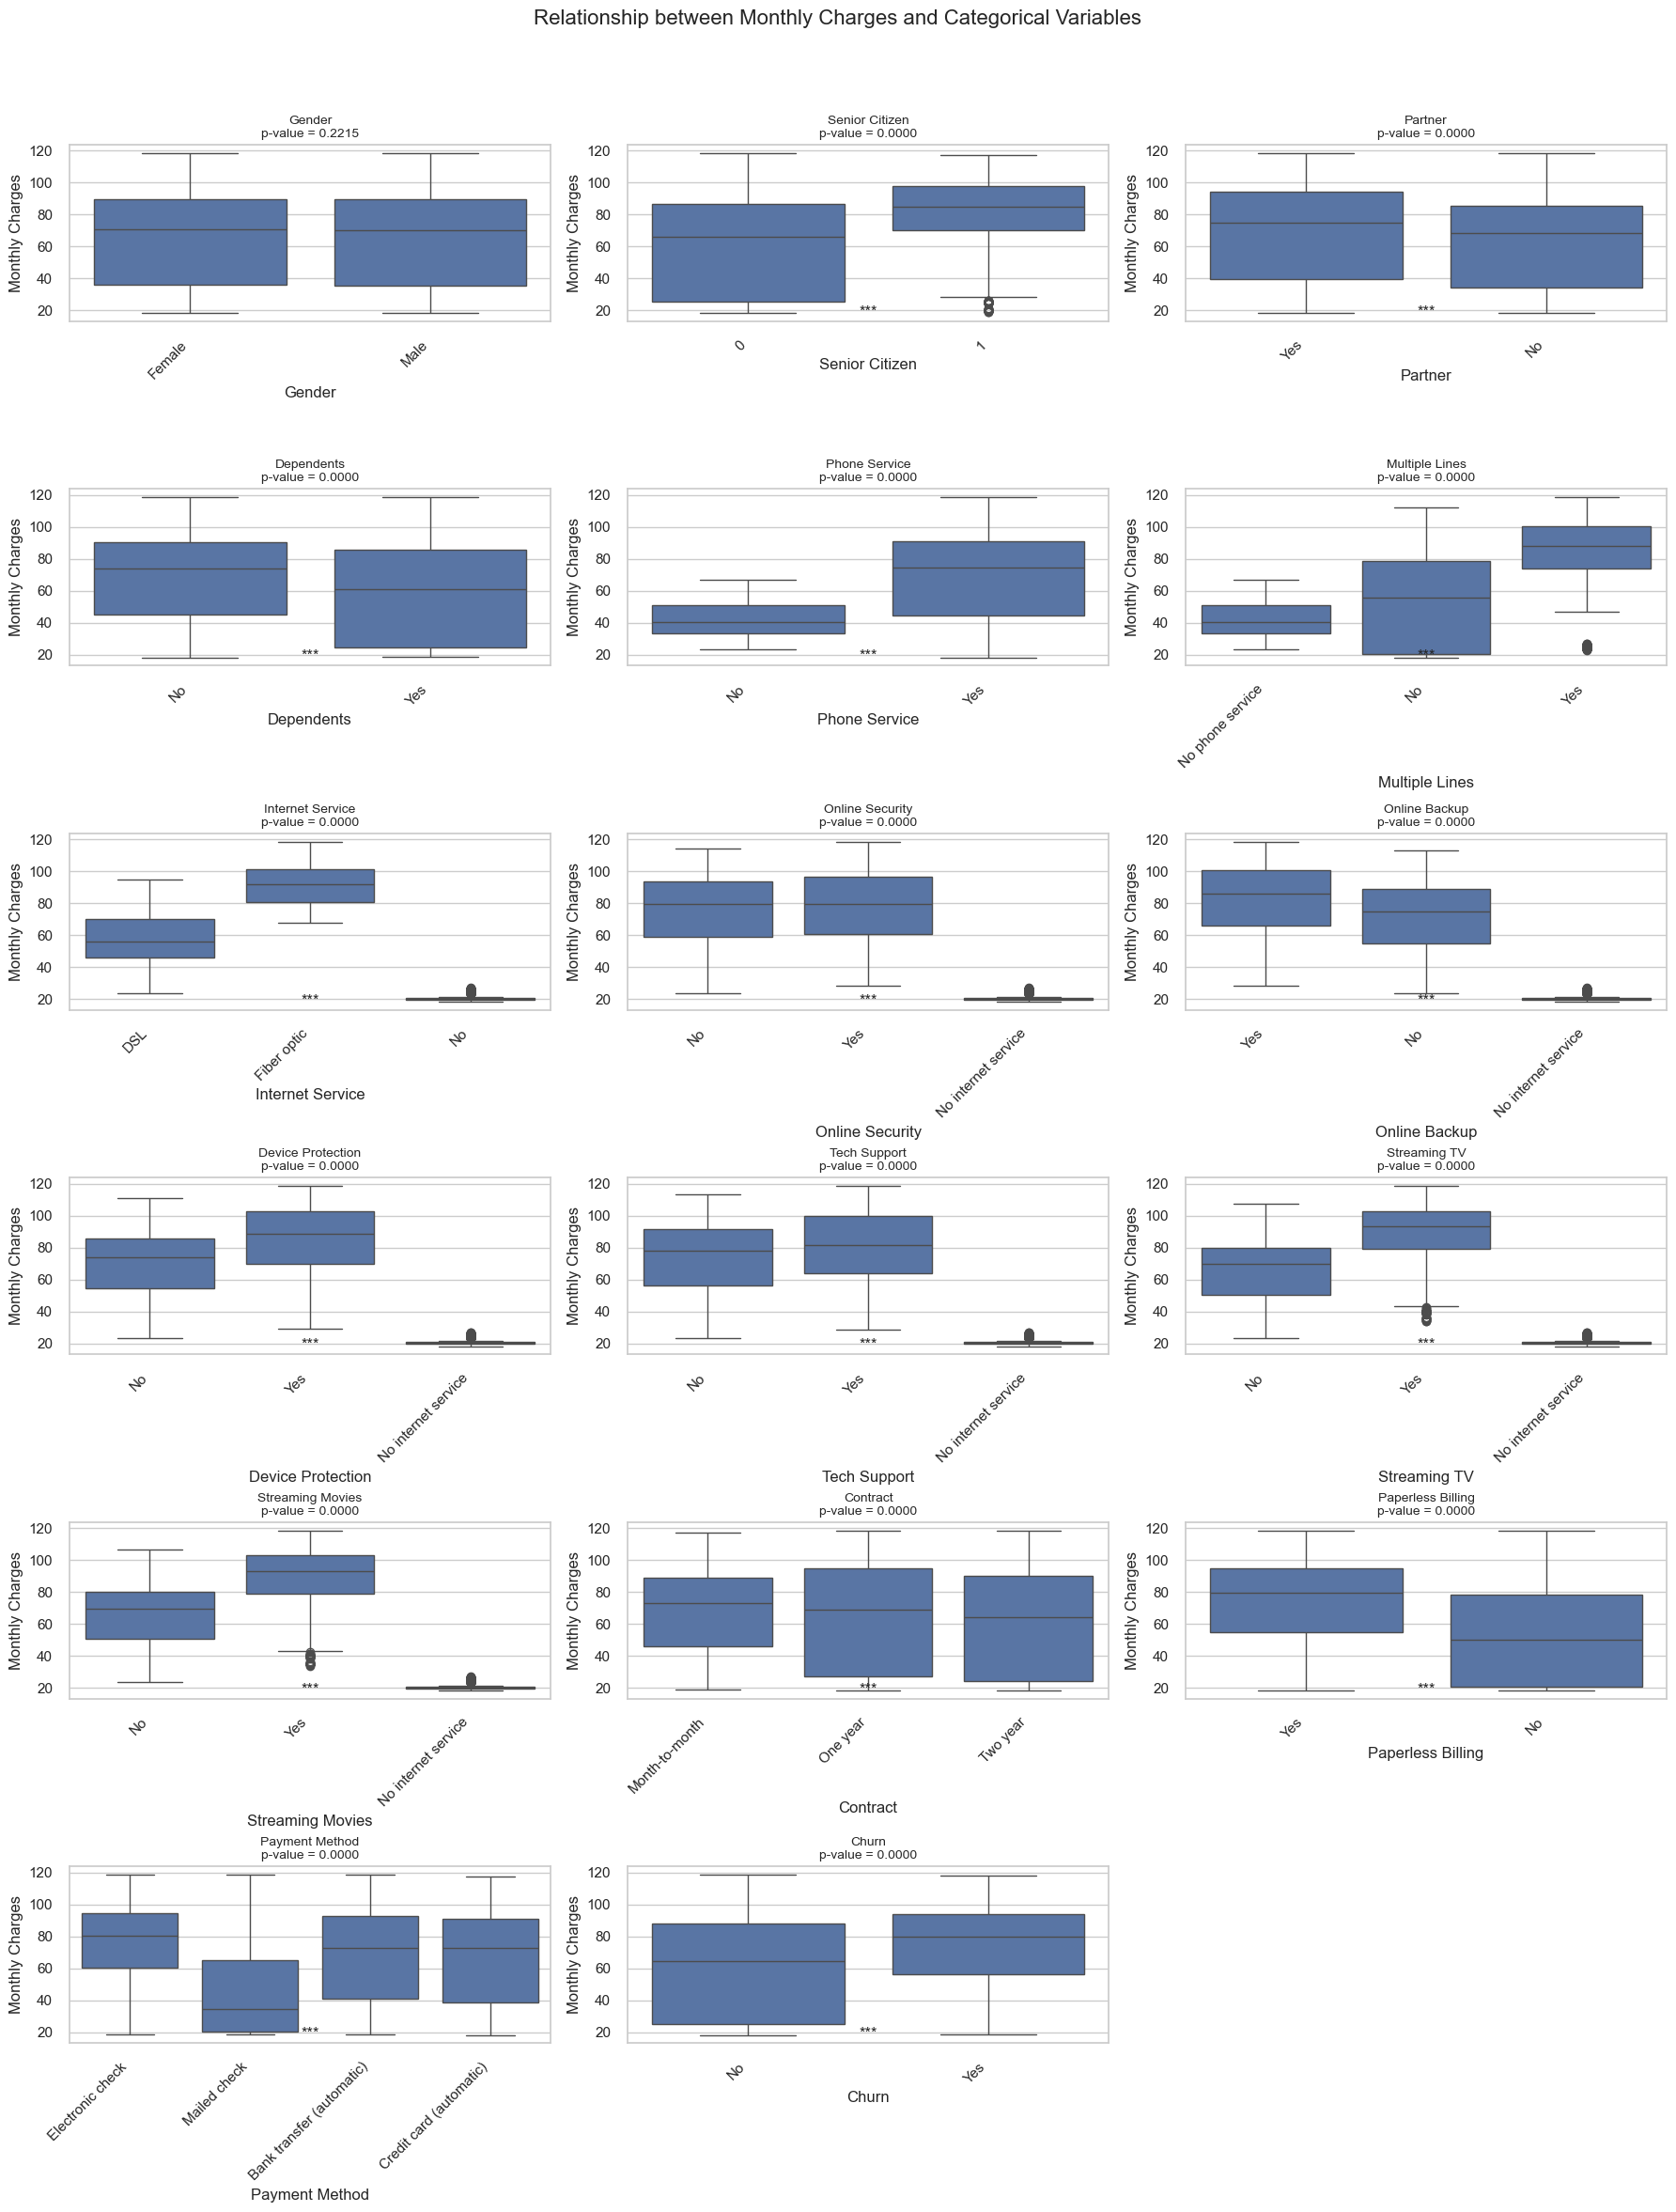

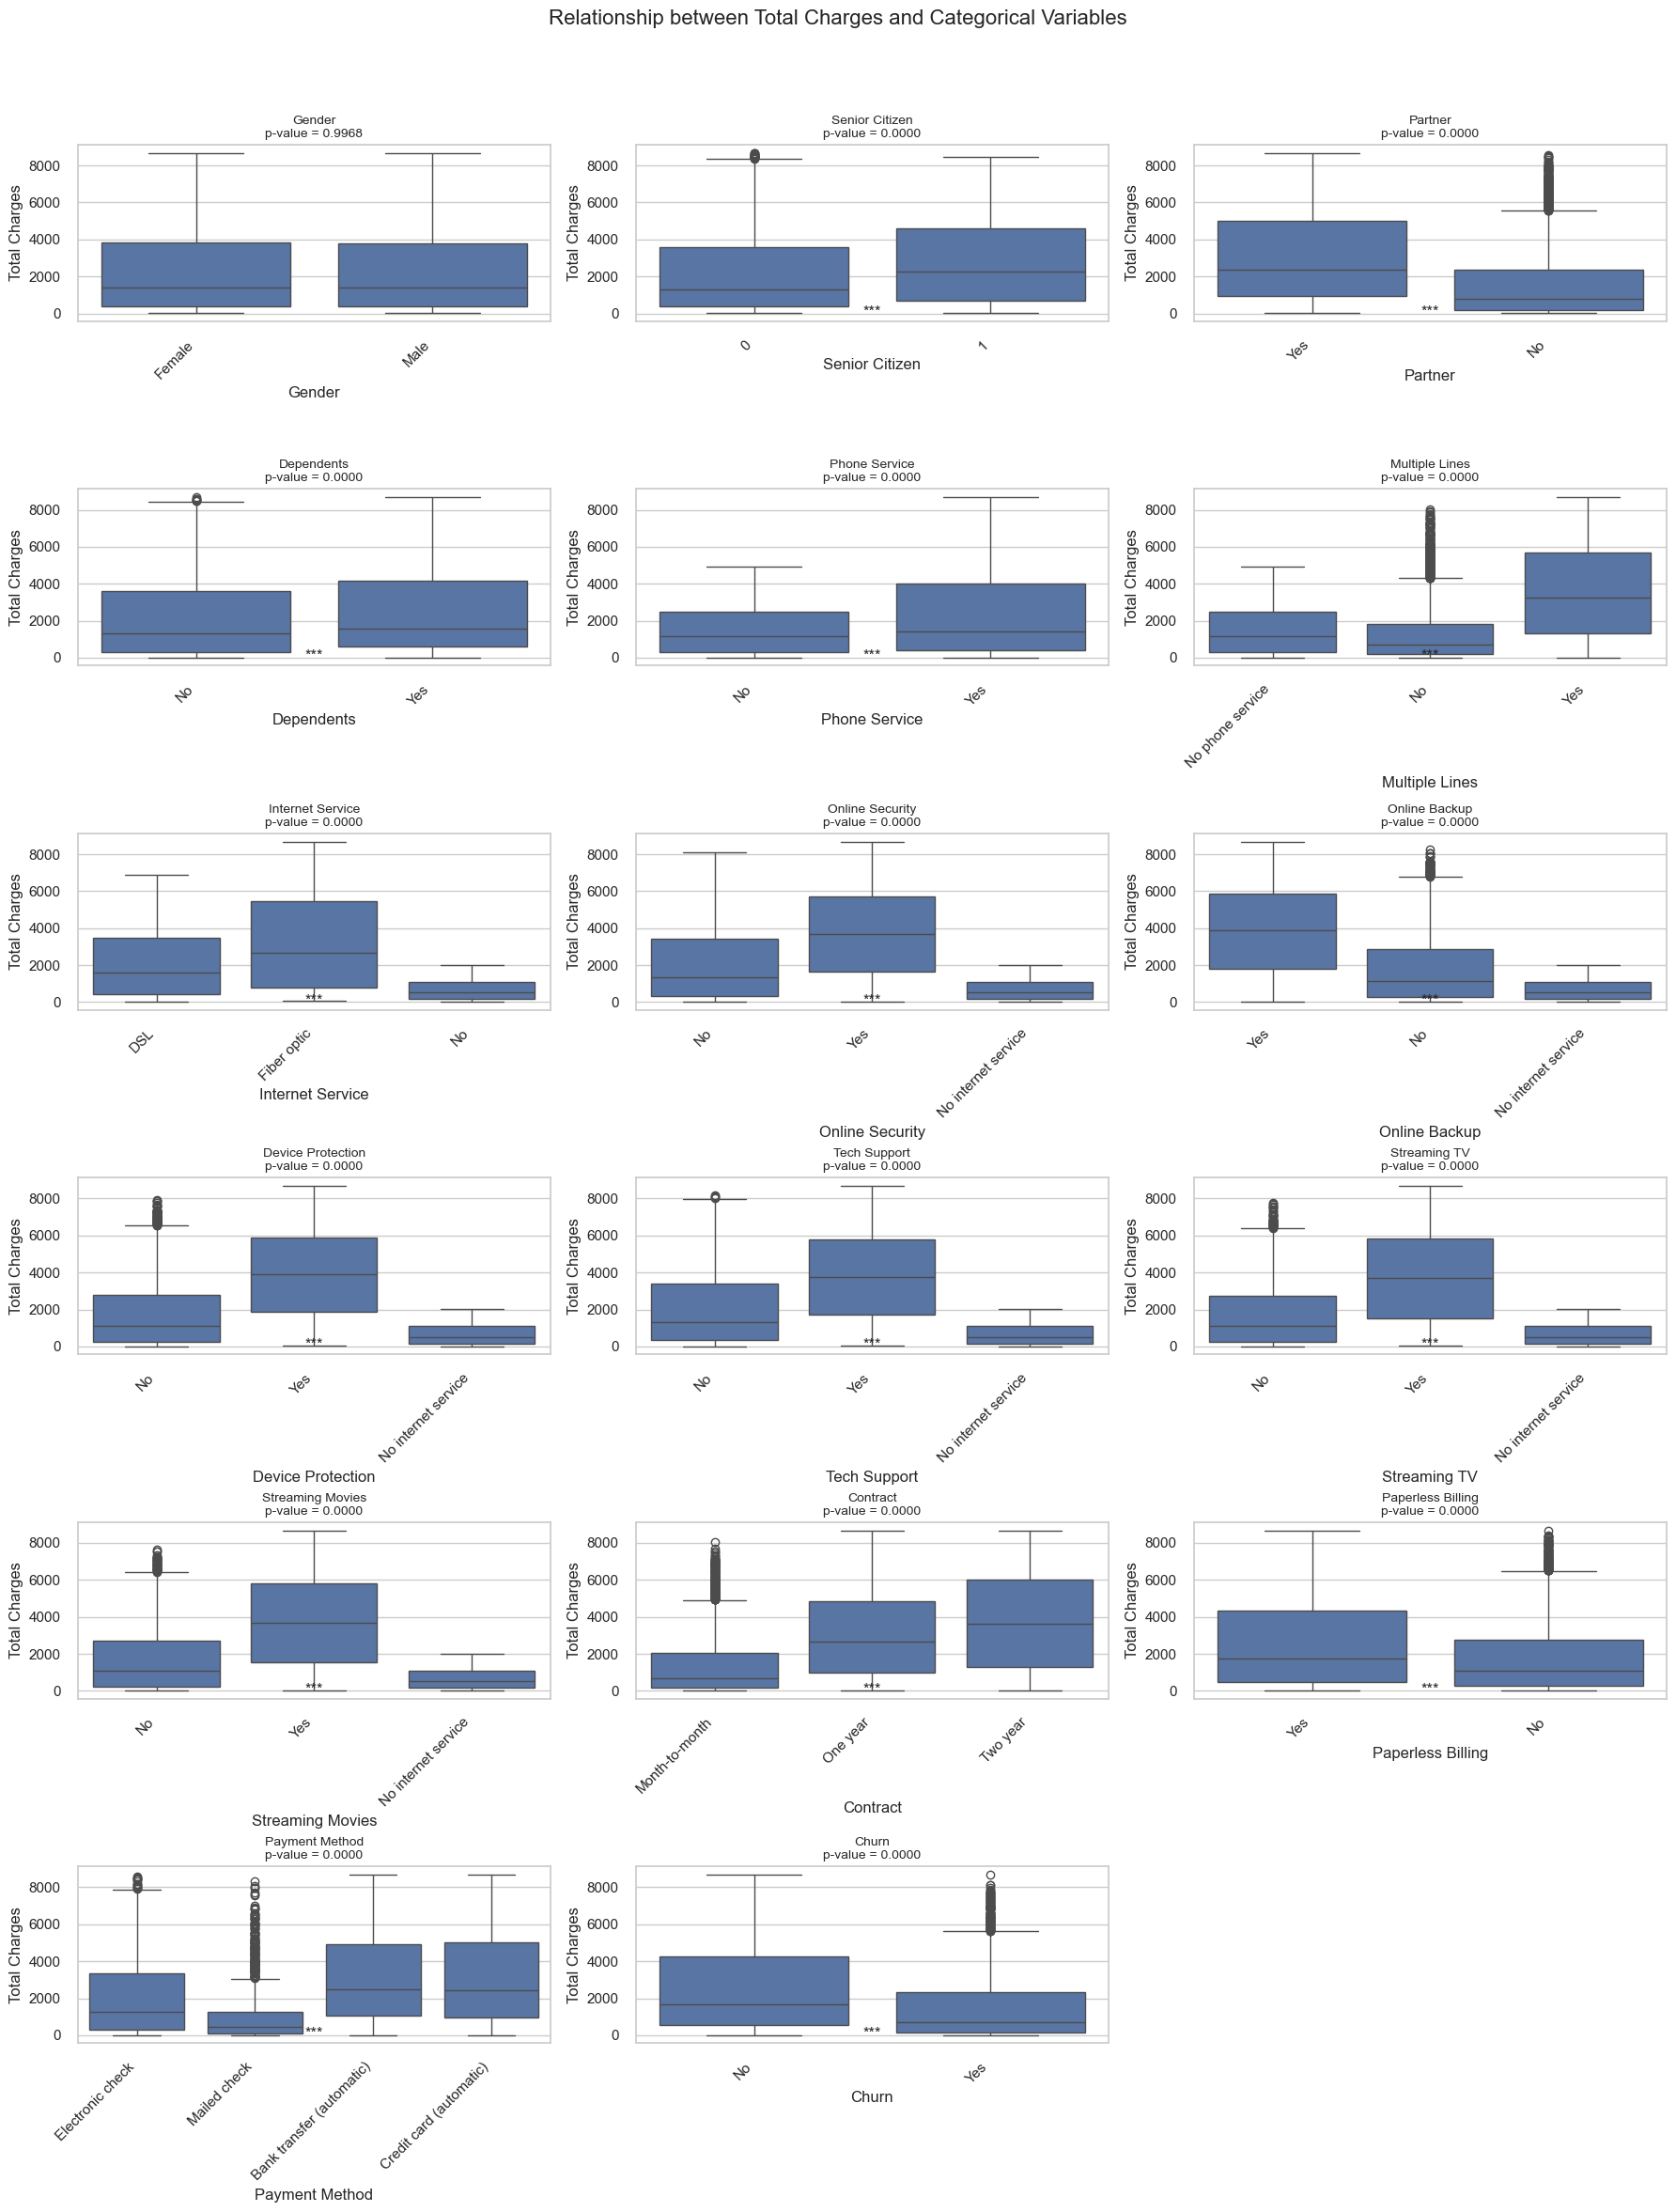

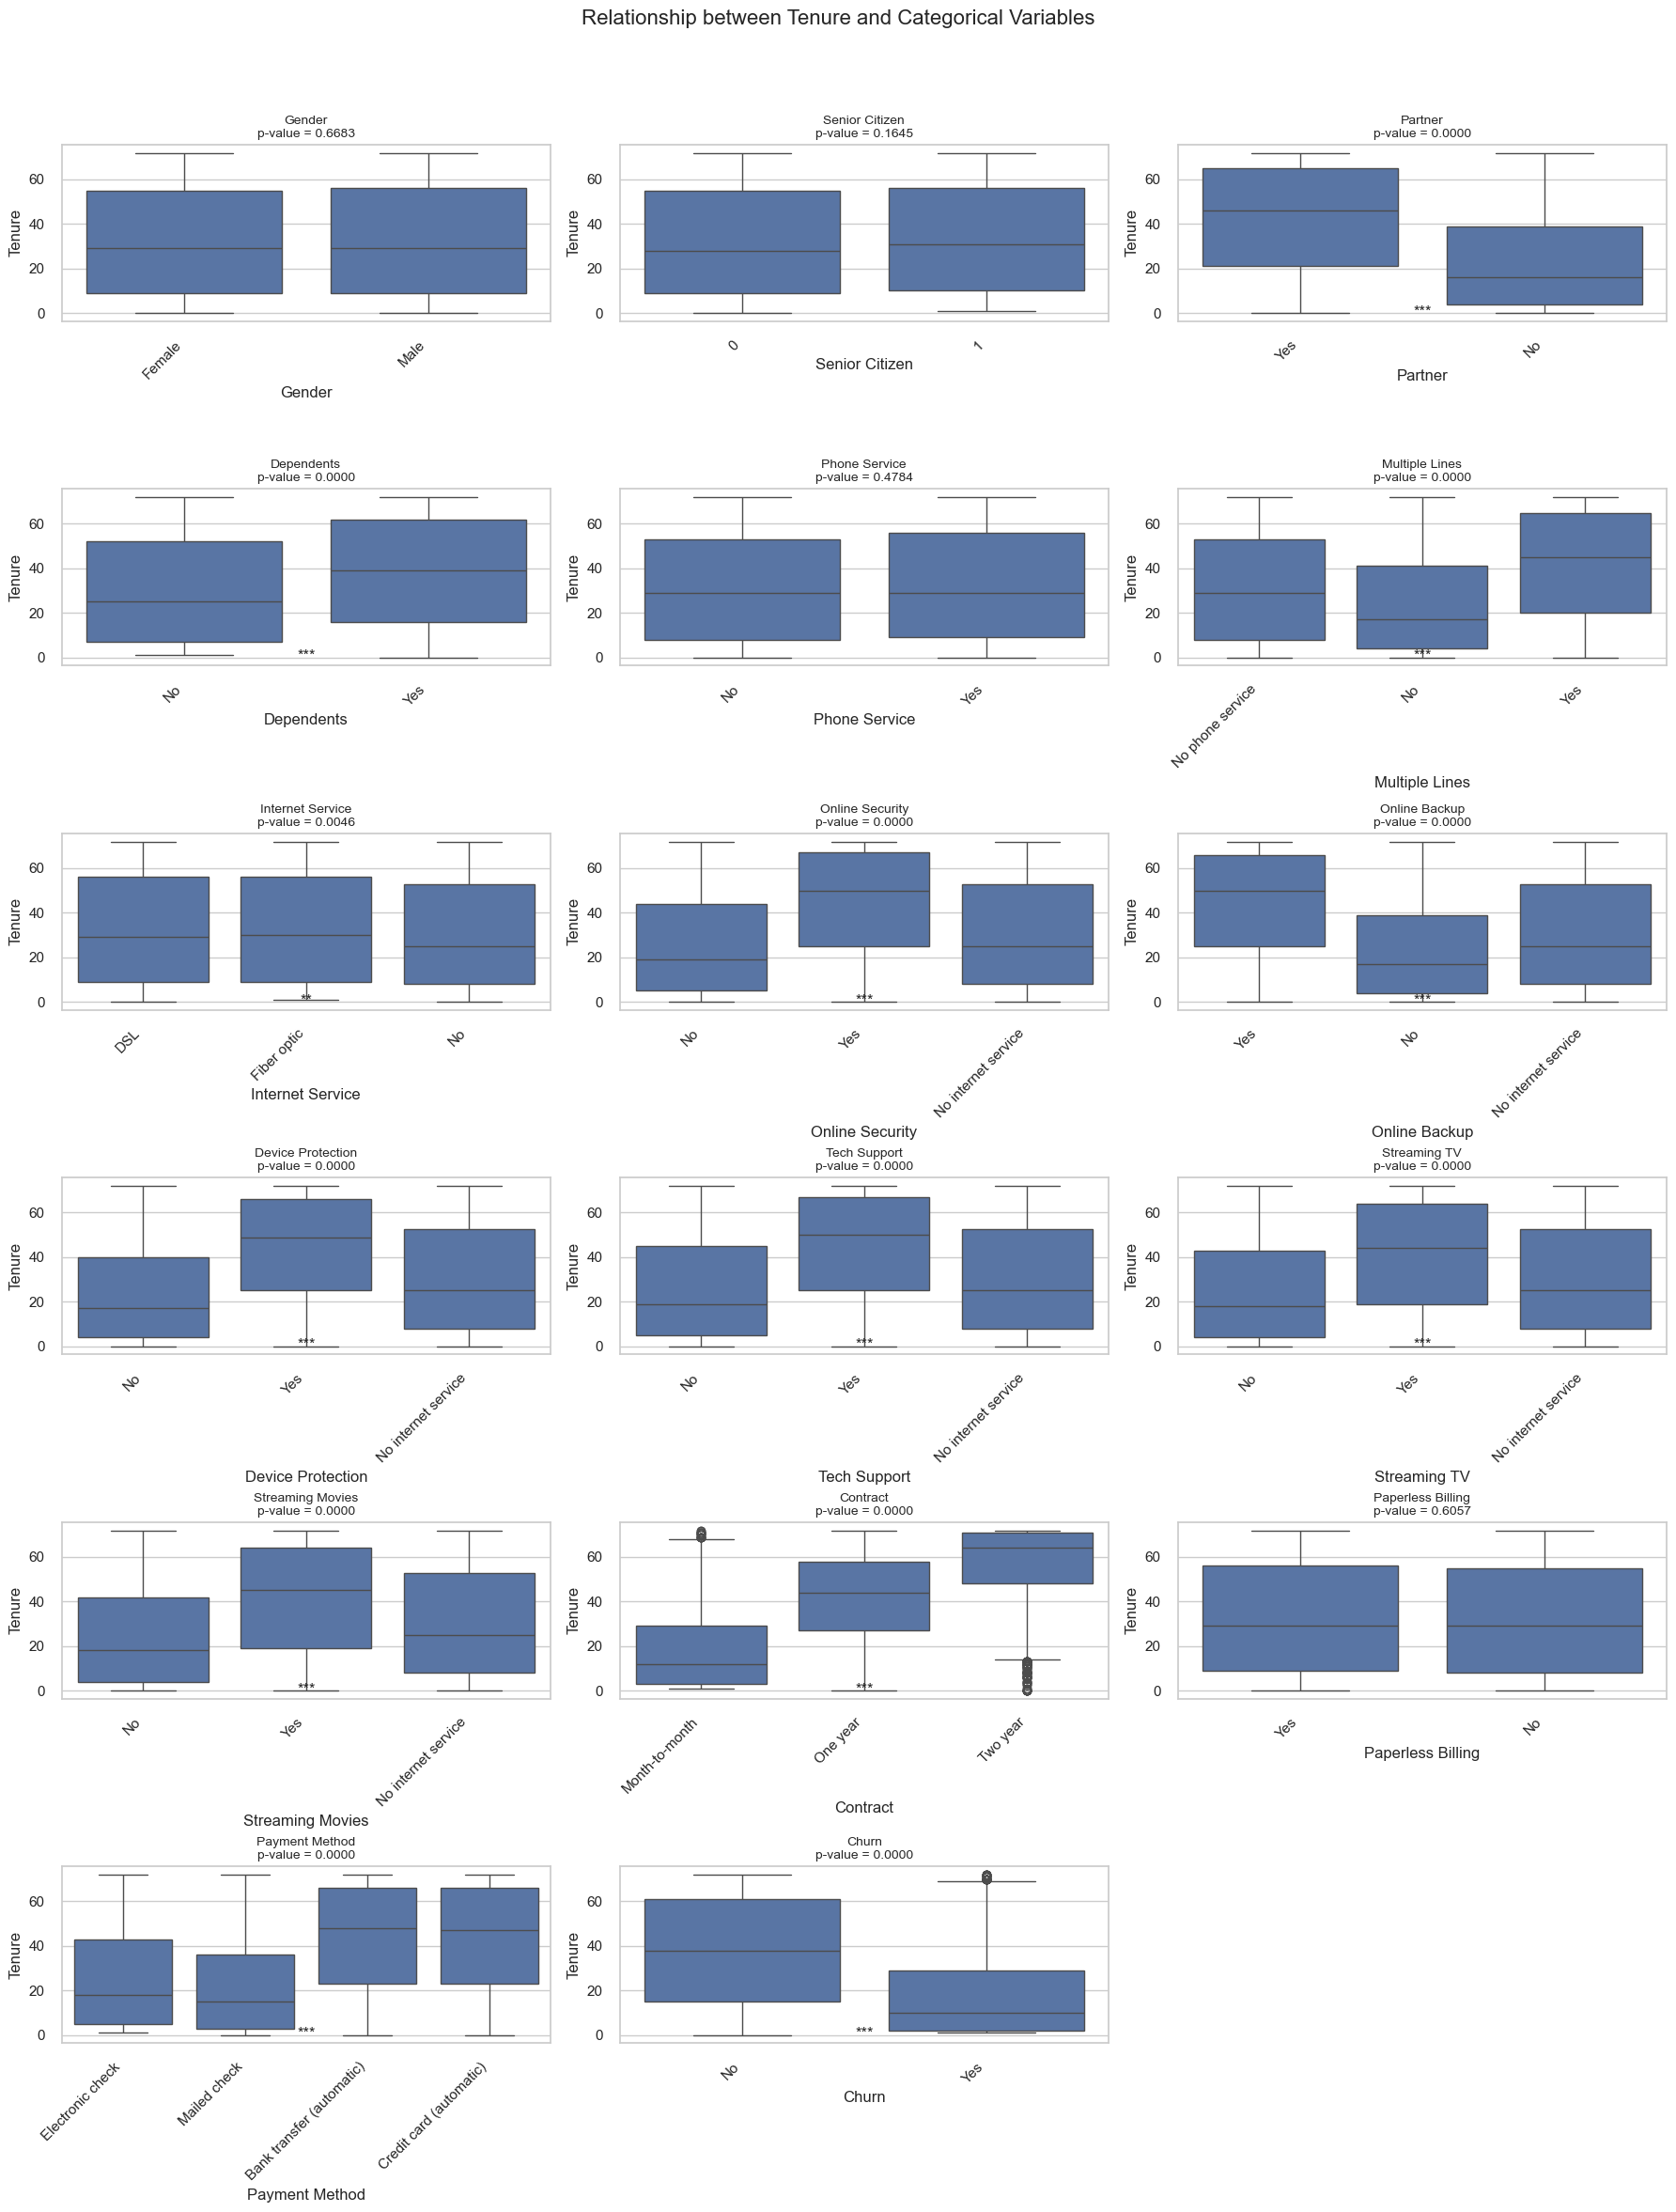

In [148]:
numerical_cols = [
    'Monthly Charges',
    'Total Charges',
    'Tenure'
]
categorical_cols = [
    'Gender', 'Senior Citizen', 'Partner', 'Dependents',
    'Phone Service', 'Multiple Lines', 'Internet Service',
    'Online Security', 'Online Backup', 'Device Protection',
    'Tech Support', 'Streaming TV', 'Streaming Movies',
    'Contract', 'Paperless Billing', 'Payment Method', 'Churn'
]

# Create a separate figure for each numerical column
for num_col in numerical_cols:
    # Calculate how many rows and columns we need for the subplots
    n_cols = 3  # Display 3 plots per row
    n_rows = (len(categorical_cols) + n_cols - 1) // n_cols  # Ceiling division to get number of rows
    
    # Create a figure with appropriate size
    plt.figure(figsize=(18, n_rows * 4))
    
    # Add a main title for this numerical feature
    plt.suptitle(f'Relationship between {num_col} and Categorical Variables', 
                 fontsize=16, y=0.98)
    
    for i, cat_col in enumerate(categorical_cols):
        # Create subplot
        plt.subplot(n_rows, n_cols, i + 1)
        
        # Get data and drop NAs
        sub_df = full_data_copy[[num_col, cat_col]].dropna()
        
        # Calculate ANOVA
        groups = [group[num_col].values for name, group in sub_df.groupby(cat_col)]
        f_stat, p_val = f_oneway(*groups)
        
        # Create boxplot
        sns.boxplot(data=sub_df, x=cat_col, y=num_col)
        
        # Adjust x-tick labels
        plt.xticks(rotation=45, ha='right')
        
        # Add title with ANOVA p-value
        plt.title(f'{cat_col}\np-value = {p_val:.4f}', fontsize=10)
        
        # Add significance stars
        if p_val < 0.001:
            plt.text(0.5, 0.01, '***', horizontalalignment='center',
                    verticalalignment='bottom', transform=plt.gca().transAxes, fontsize=12)
        elif p_val < 0.01:
            plt.text(0.5, 0.01, '**', horizontalalignment='center',
                    verticalalignment='bottom', transform=plt.gca().transAxes, fontsize=12)
        elif p_val < 0.05:
            plt.text(0.5, 0.01, '*', horizontalalignment='center',
                    verticalalignment='bottom', transform=plt.gca().transAxes, fontsize=12)
    
    # Adjust layout
    plt.tight_layout()
    plt.subplots_adjust(top=0.92)  # Make room for the suptitle
    
    # Show the figure for this numerical column
    plt.show()

#### Monthly Charges
**Service Usage Behavior Analysis & Customer Churn Prediction**

**Objective**
- Analyze the relationship between **Monthly Charges** and **categorical variables**.
- Identify key factors affecting **spending behavior** and **churn likelihood**.

---

**1. Insignificant Variable**
- **Gender**: `p-value = 0.2215` → No significant effect on monthly charges.

---

**2. Factors Affecting Monthly Charges**

| Variable | Key Insight | Recommendation |
|----------|-------------|----------------|
| **Senior Citizen** | Seniors tend to spend more. | Offer targeted senior-friendly services. |
| **Partner & Dependents** | Singles tend to pay more. | Personalized marketing for individuals. |
| **Phone Service / Multiple Lines** | More services = higher charges. | Ensure quality and reliability. |
| **Internet Service** | Fiber optic users have the highest costs. | Prioritize retention for this segment. |
| **Online Security / Backup / Support / Streaming** | Add-on services increase spending. | Promote bundles and upsell packages. |
| **Contract** | Month-to-month plans have the highest charges. | Encourage longer-term contracts. |
| **Paperless Billing** | Paperless users spend more. | Leverage digital billing for insights. |
| **Payment Method** | Electronic check users spend the most. | Promote auto-payment via card or bank. |

---

**3. Customer Churn Prediction**
- **Churned customers** have **significantly higher monthly charges**.
- High churn risk among users with:
  - Month-to-month contracts,
  - Fiber optic internet,
  - Streaming services,
  - Manual payment methods.

---

**4. Retention Strategy Recommendations**

- Target customers with:
  - **Fiber optic + Streaming**
  - **Electronic check** payment method
  - **Month-to-month** contracts

- Actions:
  - Offer contract upgrade incentives.
  - Promote add-on services: security, backup, tech support.
  - Encourage auto-payment methods for stability.

---

**Conclusion**
High-paying customers often use more services and have higher expectations. If dissatisfied, they are more likely to **churn**. Therefore, **service quality and flexible, personalized offers** are critical for retention.


#### Total Charges
**1. Gender**
- **p-value = 0.9968** → No significant difference in Total Charges by gender.
- Male and female customers have similar Total Charges distributions.

**2. Senior Citizen**
- **Senior citizens** tend to have slightly **lower total charges** than non-seniors.
- Possibly due to **shorter tenure** or limited service usage.

**3. Partner & Dependents**
- Customers with a **partner** or **dependents** tend to accumulate **higher Total Charges**.
- Indicates longer retention or broader service usage in families.

**4. Phone Service & Multiple Lines**
- **Customers with phone service** (and especially multiple lines) show **higher total charges**.
- Suggests upselling and bundled usage increase Total Charges.

**5. Internet Service & Add-ons (Online Security, Backup, Device Protection, etc.)**
- **Fiber optic users** have the **highest Total Charges**, followed by DSL.
- Add-on services (security, backup, tech support) are associated with **higher charges**, showing clear value add.
- Customers with **no internet** or add-ons have low charges.

**6. Streaming Services (TV & Movies)**
- Users of **streaming services** have significantly **higher Total Charges**.
- Indicates successful cross-selling of entertainment packages.

**7. Contract Type**
- **Two-year** and **one-year contract customers** accumulate **higher charges**.
- **Month-to-month** users show lower totals, aligning with **higher churn** risk.

**8. Paperless Billing**
- Paperless billing users have slightly **higher charges**, possibly due to being more tech-savvy and opting for more services.

**9. Payment Method**
- Customers paying by **mailed check** have the **lowest Total Charges**.
- Those using **automatic methods** (bank or credit card) tend to spend more.

**10. Churn**
- **Customers who churned** have **lower Total Charges** on average.
- Suggests they left early in their lifecycle, indicating **tenure is key** to revenue growth.

---

**Insights for Business Strategy**

- **Retention is key**: High Total Charges are correlated with long-term customers (contracts, add-ons, auto payments).
- **Bundling services** (phone + internet + streaming) increases revenue.
- **At-risk churners** tend to be on month-to-month, mailed check users, and without value-added services.

#### Tenure
**Significant Relationship (p < 0.05)**
These variables show a statistically significant association with `Tenure`:

- **Partner**: Customers with a partner tend to stay longer.
- **Dependents**: Customers with dependents have higher tenure.
- **Multiple Lines**: More services correlate with longer tenure.
- **Internet Service**: DSL users have slightly higher tenure than fiber optic users.
- **Online Security / Backup / Device Protection / Tech Support**: Usage of these add-ons is linked to longer customer retention.
- **Streaming TV / Movies**: Entertainment services correlate with higher tenure.
- **Contract Type**: Longer contracts (1-year, 2-year) → longer tenure.
- **Payment Method**: Auto-pay methods (bank/credit card) relate to higher tenure; electronic check relates to lower tenure.
- **Churn**: Naturally, customers who haven't churned have higher tenure.

**No Significant Relationship (p ≥ 0.05)**
These variables do **not** show a statistically significant relationship with `Tenure`:

- **Gender**
- **Senior Citizen**
- **Phone Service**
- **Paperless Billing**

---

**Conclusion**
Customer tenure is strongly influenced by **contract length**, **service bundling**, and **payment behavior**. In contrast, **demographic factors** like gender or senior status do not significantly affect tenure.


### 4.3) Categorical vs categorical features (Chi-square test)

Null hypothesis: the feature's categories have no effect on the target variable. 
Alternate hypothesis: one(or more) of the feature categories has a significant effect on the target variable.

In [154]:
def chi_func(df, feature):
    df = df[[feature, 'Churn']].dropna()

    # Tạo bảng chéo giữa feature và churn
    contingency_table = pd.crosstab(df[feature], df['Churn'])

    print('Contingency Table:\n')
    print(contingency_table)
    print('\n')

    # Chi-square test
    chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

    print(f'Chi-square statistic: {chi2:.4f}')
    print(f'Degrees of freedom: {dof}')
    print('Expected frequencies:\n')
    print(pd.DataFrame(expected, index=contingency_table.index, columns=contingency_table.columns))
    print(f'P-value: {p:.4f}')
    print('\n')

    alpha = 0.05
    if p < alpha:
        print(f'❌ Reject the null hypothesis: There is a relationship between {feature} and Churn.')
    else:
        print(f'✅ Fail to reject the null hypothesis: No significant relationship between {feature} and Churn.')


In [155]:
cat_ft = [
    'Gender', 'Senior Citizen', 'Partner', 'Dependents',
    'Phone Service', 'Multiple Lines', 'Internet Service',
    'Online Security', 'Online Backup', 'Device Protection',
    'Tech Support', 'Streaming TV', 'Streaming Movies',
    'Contract', 'Paperless Billing', 'Payment Method'
]
for ft in cat_ft:
    print('\n\n**** {} ****\n'.format(ft))
    chi_func(full_data_copy, ft)



**** Gender ****

Contingency Table:

Churn     No  Yes
Gender           
Female  2549  939
Male    2625  930


Chi-square statistic: 0.4841
Degrees of freedom: 1
Expected frequencies:

Churn       No    Yes
Gender               
Female 2562.39 925.61
Male   2611.61 943.39
P-value: 0.4866


✅ Fail to reject the null hypothesis: No significant relationship between Gender and Churn.


**** Senior Citizen ****

Contingency Table:

Churn             No   Yes
Senior Citizen            
0               4508  1393
1                666   476


Chi-square statistic: 159.4263
Degrees of freedom: 1
Expected frequencies:

Churn               No     Yes
Senior Citizen                
0              4335.05 1565.95
1               838.95  303.05
P-value: 0.0000


❌ Reject the null hypothesis: There is a relationship between Senior Citizen and Churn.


**** Partner ****

Contingency Table:

Churn      No   Yes
Partner            
No       2441  1200
Yes      2733   669


Chi-square statistic: 158.7

**Analysis of the Relationship Between Categorical Variables and Churn**

**No Significant Relationship with Churn**
| Variable | P-value | Conclusion |
|----------|---------|------------|
| Gender | 0.4866 | **No significant relationship** |
| Phone Service | 0.3388 | **No significant relationship** |

**Significant Relationship with Churn**
| Variable | P-value | Conclusion |
|----------|---------|------------|
| Senior Citizen | 0.0000 | **Significant relationship** |
| Partner | 0.0000 | **Significant relationship** |
| Dependents | 0.0000 | **Significant relationship** |
| Multiple Lines | 0.0035 | **Significant relationship** |
| Internet Service | 0.0000 | **Significant relationship** |
| Online Security | 0.0000 | **Significant relationship** |
| Online Backup | 0.0000 | **Significant relationship** |
| Device Protection | 0.0000 | **Significant relationship** |
| Tech Support | 0.0000 | **Significant relationship** |
| Streaming TV | 0.0000 | **Significant relationship** |
| Streaming Movies | 0.0000 | **Significant relationship** |
| Contract | 0.0000 | **Significant relationship** |
| Paperless Billing | 0.0000 | **Significant relationship** |
| Payment Method | 0.0000 | **Significant relationship** |

**Insights
- Variables such as **Contract**, **Tech Support**, **Internet Service**, and **Online Security** have very high Chi-square statistics, indicating a strong influence on customer churn.
- Features related to digital services and payment methods are highly associated with churn behavior.
- These statistically significant variables are useful inputs for Machine Learning models for churn prediction.


## 5) Business findings from the EDA

**1. Reduce Churn in “Month-to-Month” Segment**
- **Current State**  
  - 55% of customers are on month-to-month contracts, with churn rate above the overall average (~26.5%).
- **Objective**  
  - Decrease churn to ≤20% within 6 months.
- **Tactics**  
  1. **“Early-Bird” Offer:** 15–20% discount on the first month when signing a 12- or 24-month contract (applied for first 3 months).  
  2. **Free Add-on Trial:** 3 months of Online Security or Tech Support for customers switching to a long-term plan.  
  3. **30-Day Reminder:** SMS/email alert 30 days before the promotion ends, offering a renewal discount for another long-term contract.
- **KPIs & Timeline**  
  - ≥30% conversion from month-to-month to long-term (2-week pilot, full roll-out in 2–3 months).

---

**2. Upsell Add-on Services**
- **Current State**  
  - Only ~30–35% of customers subscribe to at least one add-on; those with ≥2 add-ons have ARPU ~1.4× higher.
- **Objective**  
  - Increase the share of customers with ≥2 add-ons from 20% to 35% within 4 months.
- **Tactics**  
  1. **“All-in-One” Bundle:** 25% off when signing up for two or more services simultaneously.  
  2. **In-App/Web Pop-ups:** Suggest the Backup + Security bundle to single-add-on users.  
  3. **Email Drip Campaign:** Three emails per week highlighting benefits and savings.
- **KPIs & Timeline**  
  - 35% of customers with ≥2 add-ons; Email CTR ≥15% (3 weeks for setup, 2 months campaign).

---

**3. Promote “Fiber + Streaming” Bundle**
- **Current State**  
  - 44% use fiber; ~40% use streaming; only ~25% subscribe to both.
- **Objective**  
  - Achieve 35% penetration of the combo within 6 months.
- **Tactics**  
  1. **Promotional Bundle:** 100 Mbps Fiber + Streaming TV/Movies from 450,000 VND/month (20% discount).  
  2. **Exclusive Content:** 3-month complimentary Netflix/HBO access.  
  3. **Road Shows & Digital Ads:** On-site demos in residential complexes and geo-targeted Facebook/Google ads.
- **KPIs & Timeline**  
  - ≥35% combo subscriptions; Combo churn < Fiber-only churn (1 month design, 1 month pilot, rollout months 3–6).

---

**4. Encourage Auto-Payment**
- **Current State**  
  - 43.5% use auto-pay and have ~10 ppt lower churn than electronic check users.
- **Objective**  
  - Increase auto-pay adoption from 43.5% to 60% within 4 months.
- **Tactics**  
  1. **5% Discount:** On the first bill for new auto-pay sign-ups.  
  2. **Loyalty Points:** 100 points (~20,000 VND) credited upon setup.  
  3. **In-App Pop-up & Chatbot:** Step-by-step guidance with real-time support.
- **KPIs & Timeline**  
  - ≥60% auto-pay penetration; churn among new auto-pay users ≤10% (2 weeks integration, 2 months campaign).

---

**5. Senior Citizen Care Program**
- **Current State**  
  - 16.2% of customers are seniors (≥60), with churn ~5 ppt higher than average.
- **Objective**  
  - Reduce senior churn to ≤15% within 6 months.
- **Tactics**  
  1. **“Senior Care” Package:** 20% discount + 24/7 priority hotline.  
  2. **Webinars & Workshops:** Service tutorials + free 5 GB data SIM.  
  3. **Proactive Outreach:** Quarterly check-in calls for feedback and technical support.
- **KPIs & Timeline**  
  - Senior churn ≤15%; CSAT ≥4.5/5 (3 weeks setup, monthly webinars).

---

**6. New Customer Onboarding Journey (Tenure ≤6 Months)**
- **Current State**  
  - Churn concentrated among customers with tenure ≤6 months.
- **Objective**  
  - Increase 6-month retention from 80% to 90%.
- **Tactics**  
  1. **0–90 Day Email/SMS Sequence:**  
     - Week 1: Welcome guide + FAQs.  
     - Months 1–2: Tailored add-on suggestions.  
     - Month 3: 10% discount on first add-on.  
  2. **Proactive Support:** Follow-up call at 30 days.  
  3. **Feedback Incentive:** 2-question survey + 50,000 VND coupon.
- **KPIs & Timeline**  
  - 6-month retention ≥90%; email open rate ≥70% (2 weeks automation setup, immediate launch).

---

**7. Leverage Paperless Billing for Engagement**
- **Current State**  
  - 59.2% paperless billing; email open rate ~70%.
- **Objective**  
  - Increase promotional email CTR from 5% to 12%.
- **Tactics**  
  1. **Exclusive Offers:** Only via paperless billing emails.  
  2. **Push Notifications:** Flash sales and limited-time deals.  
  3. **Interactive Email Content:** Direct CTAs for “Subscribe,” “Renew,” “View Offers.”
- **KPIs & Timeline**  
  - Email CTR ≥12%; 40%+ app users enable notifications (1 week template design, 1 month A/B test).

---

**8. Family Plan for Partners & Dependents**
- **Current State**  
  - 48% have partners; 30% have dependents; ARPU +20% for these segments.
- **Objective**  
  - Achieve 30% adoption of Family Plan within 5 months.
- **Tactics**  
  1. **Family Plan Offer:** Up to 4 lines, 200 GB shared data, only +15% price vs. 2-line plan.  
  2. **Referral Incentive:** 10 GB/month bonus for referrals.  
  3. **“Together & Save” Campaign:** Social & email content emphasizing shared benefits.
- **KPIs & Timeline**  
  - ≥30% Family Plan penetration; churn < individual plans (2 weeks design, 2 months campaign).

---

**Consolidated 6-Month KPIs**

| Strategy                     | Key KPI                          | Target        |
|------------------------------|----------------------------------|---------------|
| Month-to-Month → Long-term   | Conversion rate to long-term     | ≥30%          |
| Add-on Upsell                | % with ≥2 add-ons                | 35%           |
| Fiber + Streaming Bundle     | Bundle penetration               | 35%           |
| Auto-Payment Adoption        | Auto-pay penetration             | 60%           |
| Senior Care                  | Senior churn rate                | ≤15%          |
| Onboarding (≤6 months)       | 6-month retention rate           | 90%           |
| Paperless Engagement         | Promotional email CTR            | 12%           |
| Family Plan                  | Family Plan penetration          | 30%           |


#  IV) Prepare the data

## 1) Transform to be done on each feature

**Feature Transformation Plan**

This section outlines the detailed transformation plan for each feature in the dataset to prepare for machine learning modeling. Explanations are provided in English.

---

**1. Customer ID**
- **Drop**: This is an identifier with no predictive value.

---

**2. Gender**
- **Binary Encoding**:  
  - Male → 0  
  - Female → 1  
- **Explanation**: A balanced binary variable that is easy to encode and interpret by ML models.

---

**3. Senior Citizen**
- **Keep as is**: Already binary (0: not a senior, 1: senior).
- **Explanation**: Important feature with a significant correlation to churn.

---

**4. Partner & 5. Dependents**
- **Binary Encoding**:  
  - No → 0  
  - Yes → 1  
- **Explanation**: Simple categorical variables indicating personal status.

---

**6. Tenure**
- **Scale**: Use StandardScaler or MinMaxScaler.  
- **Optional Bucketization**:  
  - 0–6 months  
  - 7–24 months  
  - 25–48 months  
  - >48 months  
- **Explanation**: Scaling ensures consistency; bucketing helps model new vs. long-term customers.

---

**7. Phone Service**
- **Binary Encoding**:  
  - No → 0  
  - Yes → 1  

---

**8. Multiple Lines**
- **Ordinal Encoding**:  
  - "No phone service" → 0  
  - "No" → 1  
  - "Yes" → 2  
- **Explanation**: Reflects the level of service used.

---

**9. Internet Service**
- **One-Hot Encoding**:  
  - DSL  
  - Fiber optic  
  - No internet  
- **Explanation**: Different service types require separation due to their differing churn behavior.

---

**10–14. Online Security, Online Backup, Device Protection, Tech Support, Streaming TV, Streaming Movies**
- **Binary Encoding**:  
  - Yes → 1  
  - No → 0  
- **Handle "No internet service"**:  
  - Either impute as NaN or add an additional “Not applicable” column.
- **Explanation**: Customers without internet service cannot access these features.

---

**15. Contract**
- **One-Hot Encoding**:  
  - Month-to-month  
  - One year  
  - Two year  
- **Explanation**: Contract types are unordered categories and should be separated clearly.

---

**16. Paperless Billing**
- **Binary Encoding**:  
  - No → 0  
  - Yes → 1  

---

**17. Payment Method**
- **One-Hot Encoding**:  
  - Electronic check  
  - Mailed check  
  - Bank transfer (automatic)  
  - Credit card (automatic)  
- **Explanation**: Different payment types reflect varying digital habits and churn tendencies.

---

**18. Monthly Charges**
- **Check for Outliers**  
- **Scale**: Use standard or min-max scaling.  
- **Explanation**: Helps ensure numeric consistency across features.

---

**19. Total Charges**
- **Impute Missing Values** (only 11 missing):  
  - Formula-based: `Total Charges = Tenure × Monthly Charges`  
- **Scale**: Same method as Monthly Charges  
- **Explanation**: Essential for revenue-related analysis; strong correlation with tenure.

---

**20. Churn (Target)**
- **Label Encoding**:  
  - No → 0  
  - Yes → 1  
- **Explanation**: Binary classification target variable.

---

**Additional Notes**
- **Overall Strategy**:  
  - Scale all numeric features for consistency.  
  - One-hot encode categorical features with no natural order.  
  - Consider creating interaction features such as:  
    - `Tenure_bucket × Contract_TwoYear`  
    - `Fiber_Internet × Streaming_TV`

- **Multicollinearity Warning**:  
  - Tenure and Total Charges have strong correlation (~0.83). Monitor model behavior to prevent redundancy.

Proper feature transformation improves model performance, generalizability, and interpretability, especially for churn prediction tasks.


## 2) Data Cleaning

### 2.1) Outliers handling

In [164]:
class OutlierRemover(BaseEstimator, TransformerMixin):
    def __init__(self, feat_with_outliers=['Tenure', 'Monthly Charges', 'Total Charges']):
        self.feat_with_outliers = feat_with_outliers

    def fit(self, df, y=None):
        return self

    def transform(self, df):
        if set(self.feat_with_outliers).issubset(df.columns):
            Q1 = df[self.feat_with_outliers].quantile(0.25)
            Q3 = df[self.feat_with_outliers].quantile(0.75)
            IQR = Q3 - Q1
            condition = ~((df[self.feat_with_outliers] < (Q1 - 3 * IQR)) | 
                          (df[self.feat_with_outliers] > (Q3 + 3 * IQR))).any(axis=1)
            df_cleaned = df[condition].copy()
            return df_cleaned
        else:
            missing_features = list(set(self.feat_with_outliers) - set(df.columns))
            print(f"Missing features in dataframe: {missing_features}")
            return df

## 3) Feature selection

### 3.1) Drop features

In [167]:
class DropFeatures(BaseEstimator, TransformerMixin):
    def __init__(self, feature_to_drop=['Customer ID', 'Total Charges']):
        self.feature_to_drop = feature_to_drop

    def fit(self, df, y=None):
        return self

    def transform(self, df):
        if set(self.feature_to_drop).issubset(df.columns):
            df = df.drop(self.feature_to_drop, axis=1)
            return df
        else:
            print("One or more features are not in the dataframe")
            return df


**1. `Customer ID`**

- **To be dropped entirely** because:
  - It is a unique identifier for each customer.
  - It carries **no predictive or statistical value**—has no correlation with churn or user behavior.
  - Keeping it may introduce **noise** or cause models to misinterpret it as an important feature.

**Conclusion:** `Customer ID` is only an ID field and should be dropped before model training.

---

**2. `Total Charges`**

- While it may **seem useful**, in reality:
  > `Total Charges = Monthly Charges × Tenure`

- **Reasons to remove:**
  - It is a **derived feature** from `Monthly Charges` and `Tenure`, leading to **redundant information**.
  - Has a **very high correlation with Tenure** (r ≈ 0.83) → may cause **multicollinearity** in models.
  - Contains **missing values** (11 records), which require imputation if kept.
  - Adds no new insight if `Tenure` and `Monthly Charges` are already included in the model.

**Conclusion:** If both `Tenure` and `Monthly Charges` are used, it's best to drop `Total Charges` to reduce redundancy and avoid instability in modeling.

---

**Summary:**

| Feature           | Drop?  | Main Reason                                                                 |
|------------------|--------|------------------------------------------------------------------------------|
| `Customer ID`    | Yes | Pure identifier, not useful for prediction.                                  |
| `Total Charges`  | Yes | Redundant (derived from other features), highly correlated, contains NaNs.   |


## 4) Feature engineering

In [170]:
# Min-Max scaling
class MinMaxScalerWrapper(BaseEstimator, TransformerMixin):
    def __init__(self, features=['Tenure', 'Monthly Charges']):
        self.features = features
        self.scaler = MinMaxScaler()

    def fit(self, X, y=None):
        self.scaler.fit(X[self.features])
        return self

    def transform(self, X):
        X[self.features] = self.scaler.transform(X[self.features])
        return X

# One-hot encoding
class OneHotEncoderWrapper(BaseEstimator, TransformerMixin):
    def __init__(self, features=['Internet Service', 'Payment Method', 'Multiple Lines', 'Streaming TV', 'Streaming Movies', 'Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Contract']):
        self.features = features
        self.encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

    def fit(self, X, y=None):
        self.encoder.fit(X[self.features])
        return self

    def transform(self, X):
        encoded = self.encoder.transform(X[self.features])
        encoded_df = pd.DataFrame(encoded, columns=self.encoder.get_feature_names_out(self.features), index=X.index)
        X = X.drop(columns=self.features)
        return pd.concat([X, encoded_df], axis=1)

# Binary mapping (e.g., Yes/No, Y/N)
class BinaryMapper(BaseEstimator, TransformerMixin):
    def __init__(self, mapping_features={
        'Gender': {'Female': 1, 'Male': 0},
        'Partner': {'Yes': 1, 'No': 0},
        'Dependents': {'Yes': 1, 'No': 0},
        'Phone Service': {'Yes': 1, 'No': 0},
        'Paperless Billing': {'Yes': 1, 'No': 0},
        'Churn': {'Yes': 1, 'No': 0}
    }):
        self.mapping_features = mapping_features

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        for feature, mapping in self.mapping_features.items():
            if feature in X.columns:
                X[feature] = X[feature].map(mapping)
        return X

# Imputer for missing values
class ImputerWrapper(BaseEstimator, TransformerMixin):
    def __init__(self, strategy='mean', features=['Total Charges']):
        self.strategy = strategy
        self.features = features

    def fit(self, X, y=None):
        if self.strategy == 'mean':
            self.fill_values = X[self.features].mean()
        elif self.strategy == 'median':
            self.fill_values = X[self.features].median()
        else:
            self.fill_values = X[self.features].mode().iloc[0]
        return self

    def transform(self, X):
        X[self.features] = X[self.features].fillna(self.fill_values)
        return X

# Oversampling minority class using SMOTE
class Oversample(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, df, y=None):
        return self

    def transform(self, df):
        if 'Churn' in df.columns:
            oversample = SMOTE(sampling_strategy='minority')
            X_bal, y_bal = oversample.fit_resample(df.loc[:, df.columns != 'Churn'], df['Churn'])
            df_bal = pd.concat([pd.DataFrame(X_bal), pd.DataFrame(y_bal, columns=['Churn'])], axis=1)
            return df_bal
        else:
            print("Churn is not in the dataframe")
            return df

## 5) Split the data into training and test sets, creating a copy of the datasets

In [172]:
# split the data into train and test
def data_split(df, test_size):
    train_df, test_df = train_test_split(df, test_size=test_size, random_state=42)
    return train_df.reset_index(drop=True), test_df.reset_index(drop=True)

In [173]:
train_data, test_data = data_split(full_data, 0.2)

In [174]:
train_data.shape

(5634, 21)

In [175]:
test_data.shape

(1409, 21)

In [176]:
train_data.to_csv('train.csv',index=False)

test_data.to_csv('test.csv',index=False)

In [177]:
# creating a copy of the dataset so that the original stays untouched
train_data_copy = train_data.copy()
test_data_copy = test_data.copy()

## 6) Data Preprocessing

In [179]:
def full_pipeline(df):
    pipeline = Pipeline([
        ('imputer', ImputerWrapper()),
        ('outlier_remover', OutlierRemover()),
        ('drop_features', DropFeatures()),
        ('binary_mapper', BinaryMapper()),
        ('one_hot_encoder', OneHotEncoderWrapper()),
        ('min_max_scaler', MinMaxScalerWrapper()),
        ('oversample', Oversample())
    ])
    
    df_processed = pipeline.fit_transform(df)
    return df_processed

In [180]:
pd.options.mode.chained_assignment = None  # Hide the copy warning
train_data_prep = full_pipeline(train_data_copy)

In [181]:
train_data_prep.shape

(8276, 40)

In [182]:
pd.set_option('display.max_columns', None)
train_data_prep.head()

Gender  Senior Citizen  Partner  Dependents  Tenure  Phone Service  \
0       1               0        0           1    0.29              1   
1       1               0        0           0    0.75              1   
2       0               0        1           0    0.01              0   
3       0               0        0           0    0.06              1   
4       0               0        0           1    0.00              1   

   Paperless Billing  Monthly Charges  Internet Service_DSL  \
0                  0             0.46                  1.00   
1                  1             0.79                  0.00   
2                  1             0.05                  1.00   
3                  1             0.52                  0.00   
4                  1             0.43                  1.00   

   Internet Service_Fiber optic  Internet Service_No  \
0                          0.00                 0.00   
1                          1.00                 0.00   
2                          0.00                 0.00   
3                          1.00                 0.00   
4                          0.00                 0.00   

   Payment Method_Bank transfer (automatic)  \
0                                      0.00   
1                                      1.00   
2                                      0.00   
3                                      0.00   
4                                      1.00   

   Payment Method_Credit card (automatic)  Payment Method_Electronic check  \
0                                    0.00                             0.00   
1                                    0.00                             0.00   
2                                    0.00                             1.00   
3                                    0.00                             1.00   
4                                    0.00                             0.00   

   Payment Method_Mailed check  Multiple Lines_No  \
0                         1.00               1.00   
1                         0.00               0.00   
2                         0.00               0.00   
3                         0.00               1.00   
4                         0.00               0.00   

   Multiple Lines_No phone service  Multiple Lines_Yes  Streaming TV_No  \
0                             0.00                0.00             1.00   
1                             0.00                1.00             0.00   
2                             1.00                0.00             1.00   
3                             0.00                0.00             1.00   
4                             0.00                1.00             1.00   

   Streaming TV_No internet service  Streaming TV_Yes  Streaming Movies_No  \
0                              0.00              0.00                 0.00   
1                              0.00              1.00                 0.00   
2                              0.00              0.00                 1.00   
3                              0.00              0.00                 1.00   
4                              0.00              0.00                 1.00   

   Streaming Movies_No internet service  Streaming Movies_Yes  \
0                                  0.00                  1.00   
1                                  0.00                  1.00   
2                                  0.00                  0.00   
3                                  0.00                  0.00   
4                                  0.00                  0.00   

   Online Security_No  Online Security_No internet service  \
0                0.00                                 0.00   
1                1.00                                 0.00   
2                1.00                                 0.00   
3                1.00                                 0.00   
4                0.00                                 0.00   

   Online Security_Yes  Online Backup_No  Online Backup_No internet service  \
0             

In [183]:
# split the train data into X and y (target)
X_cc_train_prep, y_cc_train_prep = train_data_prep.loc[:, train_data_prep.columns != 'Churn'], train_data_prep['Churn'].astype('int64')

# V) Short-list promising models

## 1) Models training

In [186]:
classifiers = {
    'logistic_regression': LogisticRegression(random_state=42, max_iter=1000),
    'support_vector_machine': SVC(random_state=42, probability=True),
    'random_forest': RandomForestClassifier(random_state=42),
    'k_nearest_neighbors': KNeighborsClassifier(),
    'gradient_boosting': GradientBoostingClassifier(random_state=42),
    'neural_network': MLPClassifier(random_state=42, max_iter=1000),
    'adaboost': AdaBoostClassifier(random_state=42),
    'extra_trees': ExtraTreesClassifier(random_state=42),
    'xgboost': XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
    'lightgbm': LGBMClassifier(random_state=42)
}


In [187]:
# Function to get the feature importance of the classifier, and plot it
def feat_importance_plot(model_trn, model_name):
    if model_name not in ['support_vector_machine', 'k_nearest_neighbors', 'neural_network']:
        # change xtick font size
        plt.rcParams['xtick.labelsize'] = 12
        plt.rcParams['ytick.labelsize'] = 12
        # top 10 most predictive features
        top_10_feat = FeatureImportances(model_trn, relative=False, topn=10)
        # top 10 least predictive features
        bottom_10_feat = FeatureImportances(model_trn, relative=False, topn=-10)
        #change the figure size
        plt.figure(figsize=(10, 4))
        #change x label font size
        plt.xlabel('xlabel', fontsize=14)
        # Fit to get the feature importances
        top_10_feat.fit(X_cc_train_prep, y_cc_train_prep)
        # show the plot
        top_10_feat.show()
        print('\n')
        plt.figure(figsize=(10, 4))
        plt.xlabel('xlabel', fontsize=14)
        # Fit to get the feature importances
        bottom_10_feat.fit(X_cc_train_prep, y_cc_train_prep)
        # show the plot
        bottom_10_feat.show()
        print('\n')
    else:
        print('No feature importance for {0}'.format(model_name))
        print('\n')

In [188]:
# Function to get the y prediction
def y_prediction_func(model_trn,model_name,final_model=False):
    if final_model == False:
        # check if y_train_copy_pred exists, if not create it
        y_cc_train_pred_path = Path('saved_models/{0}/y_train_copy_pred_{0}.sav'.format(model_name))
        try:
            y_cc_train_pred_path.resolve(strict=True)
        except FileNotFoundError:
            #cross validation prediction with kfold = 10
            y_cc_train_pred = cross_val_predict(model_trn,X_cc_train_prep,y_cc_train_prep,cv=10,n_jobs=-1)
            #save the predictions
            joblib.dump(y_cc_train_pred,y_cc_train_pred_path)
            return y_cc_train_pred
        else:
            # if it exist load the predictions
            y_cc_train_pred = joblib.load(y_cc_train_pred_path)
            return y_cc_train_pred
    else:
        # check if y_train_copy_pred exists, if not create it
        y_cc_train_pred_path_final = Path('saved_models_final/{0}/y_train_copy_pred_{0}_final.sav'.format(model_name))
        try:
            y_cc_train_pred_path_final.resolve(strict=True)
        except FileNotFoundError:
            #cross validation prediction with kfold = 10
            y_cc_train_pred_final = cross_val_predict(model_trn,X_cc_train_prep,y_cc_train_prep,cv=10,n_jobs=-1)
            #save the predictions
            joblib.dump(y_cc_train_pred_final,y_cc_train_pred_path_final)
            return y_cc_train_pred_final
        else:
            # if it exist load the predictions
            y_cc_train_pred_final = joblib.load(y_cc_train_pred_path_final)
            return y_cc_train_pred_final

In [189]:
# Function to plot the confusion matrix
def confusion_matrix_func(model_trn,model_name,final_model=False):
    if final_model == False:
        fig, ax = plt.subplots(figsize=(8,8))
        #plot confusion matrix
        conf_matrix = ConfusionMatrixDisplay.from_predictions(y_cc_train_prep,y_prediction_func(model_trn,model_name),ax=ax, cmap='Blues',values_format='d')
        # remove the grid
        plt.grid(visible=None)
        # increase the font size of the x and y labels
        plt.xlabel('Predicted label', fontsize=14)
        plt.ylabel('True label', fontsize=14)
        #give a title to the plot using the model name
        plt.title('Confusion Matrix', fontsize=14)
        #show the plot
        plt.show()
        print('\n')
    else:
        fig, ax = plt.subplots(figsize=(8,8))
        #plot confusion matrix
        conf_matrix_final = ConfusionMatrixDisplay.from_predictions(y_cc_train_prep,y_prediction_func(model_trn,model_name,final_model=True),ax=ax, cmap='Blues',values_format='d')
        # remove the grid
        plt.grid(visible=None)
        # increase the font size of the x and y labels
        plt.xlabel('Predicted label', fontsize=14)
        plt.ylabel('True label', fontsize=14)
        #give a title to the plot using the model name
        plt.title('Confusion Matrix', fontsize=14)
        #show the plot
        plt.show()
        print('\n')

In [190]:
# Function to plot the roc curve
def roc_curve_func(model_trn,model_name,final_model=False):
    if final_model == False:
        # check if y probabilities file exists, if not create it
        y_proba_path = Path('saved_models/{0}/y_cc_train_proba_{0}.sav'.format(model_name))
        try:
            y_proba_path.resolve(strict=True)
        except FileNotFoundError:
            y_cc_train_proba = model_trn.predict_proba(X_cc_train_prep)
            joblib.dump(y_cc_train_proba,y_proba_path)
        else:
            # if path exist load the y probabilities file
            y_cc_train_proba = joblib.load(y_proba_path)
        skplt.metrics.plot_roc(y_cc_train_prep, y_cc_train_proba, title = 'ROC curve for {0}'.format(model_name), cmap='cool',figsize=(8,6), text_fontsize='large')
        #remove the grid
        plt.grid(visible=None)
        plt.show()
        print('\n')
    else:
        # check if y probabilities file exists, if not create it
        y_proba_path_final = Path('saved_models_final/{0}/y_cc_train_proba_{0}_final.sav'.format(model_name))
        try:
            y_proba_path_final.resolve(strict=True)
        except FileNotFoundError:
            y_cc_train_proba_final = model_trn.predict_proba(X_cc_train_prep)
            joblib.dump(y_cc_train_proba_final,y_proba_path_final)
        else:
            # if path exist load the y probabilities file
            y_cc_train_proba_final = joblib.load(y_proba_path_final)
        skplt.metrics.plot_roc(y_cc_train_prep, y_cc_train_proba_final, title = 'ROC curve for {0}'.format(model_name), cmap='cool',figsize=(8,6), text_fontsize='large')
        #remove the grid
        plt.grid(visible=None)
        plt.show()
        print('\n')

In [191]:
# Function to display the classification report
def score_func(model_trn, model_name, final_model=False):
    if final_model == False:
        class_report = classification_report(y_cc_train_prep,y_prediction_func(model_trn,model_name))
        print(class_report)
    else:
        class_report_final = classification_report(y_cc_train_prep,y_prediction_func(model_trn,model_name,final_model=True))
        print(class_report_final)

In [192]:
# Function to train the model
def train_model(model,model_name,final_model=False):
    # if we are not training the final model
    if final_model == False:
        # check if the model file exist and if not create, train and save it
        model_file_path = Path('saved_models/{0}/{0}_model.sav'.format(model_name))
        try:
            model_file_path.resolve(strict=True)
        except FileNotFoundError:
            if model_name == 'sgd':
                # for sgd, loss = 'hinge' does not have a predict_proba method. Therefore, we use a calibrated model
                calibrated_model = CalibratedClassifierCV(model, cv=10, method='sigmoid')
                model_trn = calibrated_model.fit(X_cc_train_prep,y_cc_train_prep)
            else:
                model_trn = model.fit(X_cc_train_prep,y_cc_train_prep)
            joblib.dump(model_trn,model_file_path)
            # plot the most and least predictive features
            return model_trn
        else:
            # if path exist load the model
            model_trn = joblib.load(model_file_path)
            # plot the most and least predictive features
            return model_trn
    else:
        # check if the final model file exist and if not create, train and save it
        final_model_file_path = Path('saved_models_final/{0}/{0}_model.sav'.format(model_name))
        try:
            final_model_file_path.resolve(strict=True)
        except FileNotFoundError:
            model_trn = model.fit(X_cc_train_prep,y_cc_train_prep)
            joblib.dump(model_trn,final_model_file_path)
            # plot the most and least predictive features
            return model_trn
        else:
            # if path exist load the model
            model_trn = joblib.load(final_model_file_path)
            # plot the most and least predictive features
            return model_trn

In [193]:
def folder_check_model():
    # check if the folder for saving the model exists, if not create it
    if not os.path.exists('saved_models/{}'.format(model_name)):
        os.makedirs('saved_models/{}'.format(model_name))





----------------------  logistic_regression  ----------------------


              precision    recall  f1-score   support

           0       0.79      0.74      0.76      4138
           1       0.76      0.80      0.78      4138

    accuracy                           0.77      8276
   macro avg       0.77      0.77      0.77      8276
weighted avg       0.77      0.77      0.77      8276



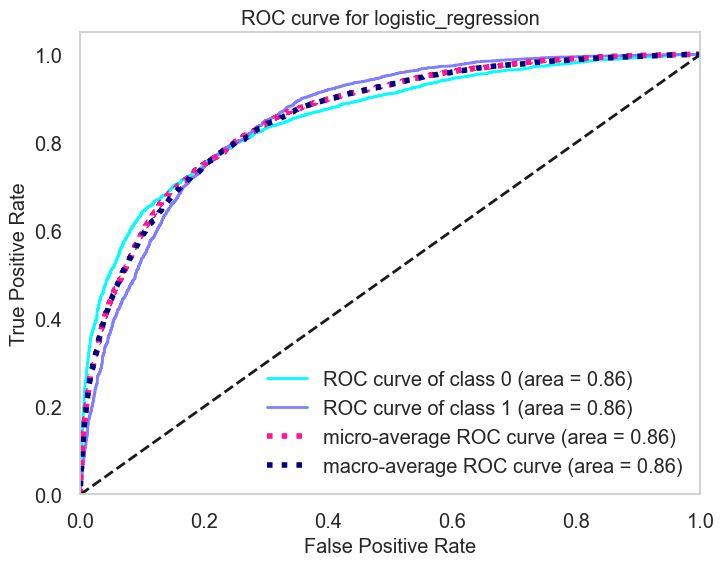

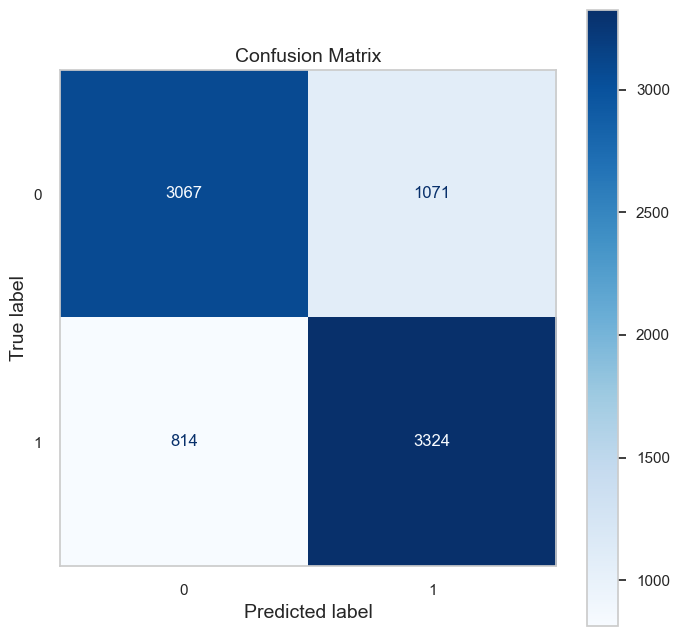

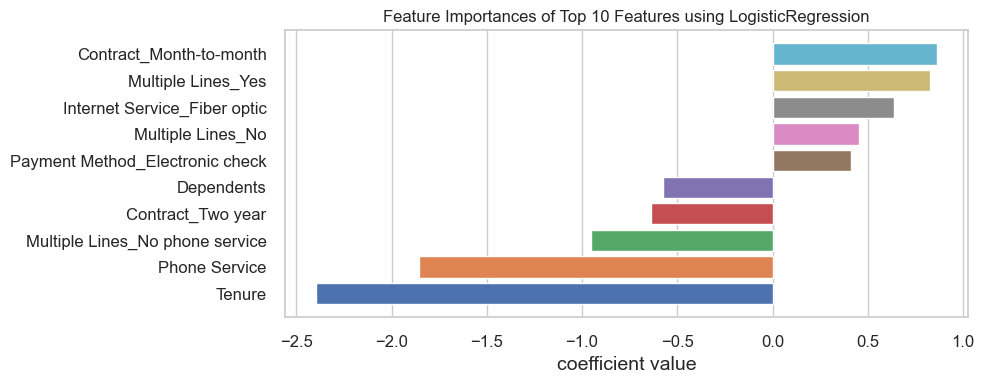

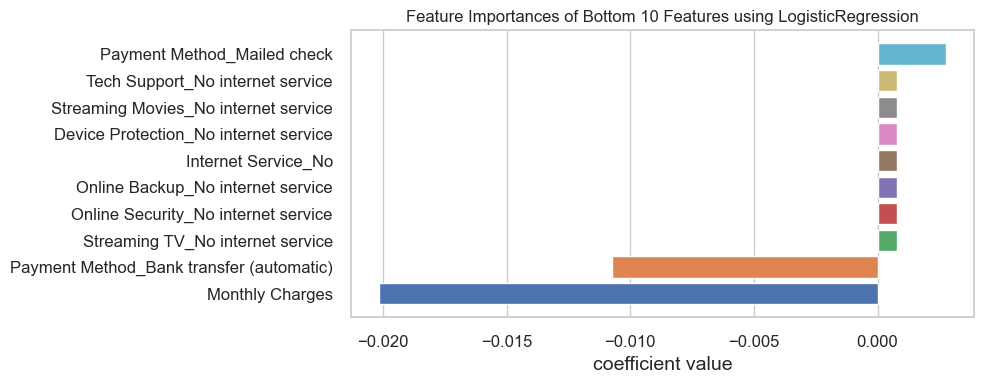







----------------------  support_vector_machine  ----------------------


              precision    recall  f1-score   support

           0       0.82      0.76      0.79      4138
           1       0.78      0.84      0.81      4138

    accuracy                           0.80      8276
   macro avg       0.80      0.80      0.80      8276
weighted avg       0.80      0.80      0.80      8276



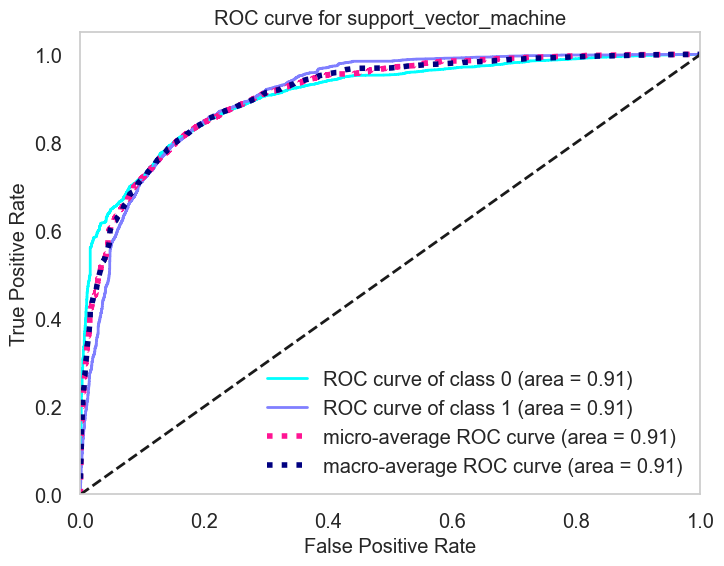

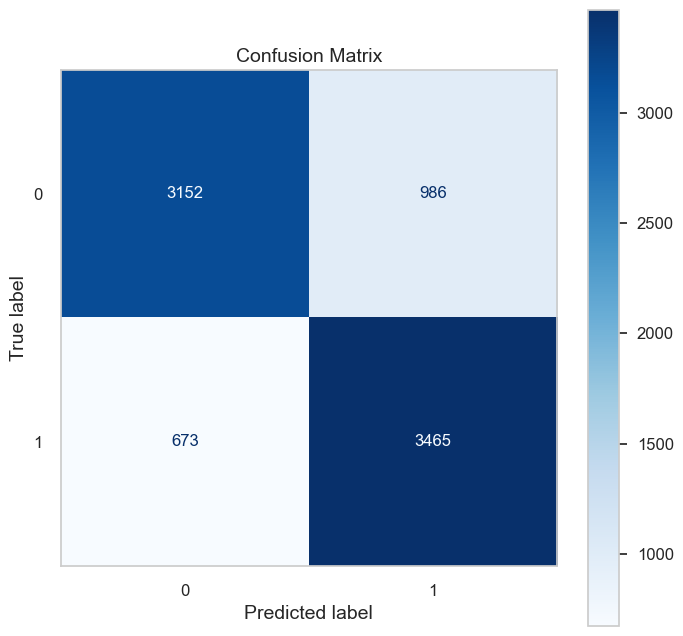



No feature importance for support_vector_machine






----------------------  random_forest  ----------------------


              precision    recall  f1-score   support

           0       0.86      0.83      0.85      4138
           1       0.84      0.87      0.85      4138

    accuracy                           0.85      8276
   macro avg       0.85      0.85      0.85      8276
weighted avg       0.85      0.85      0.85      8276



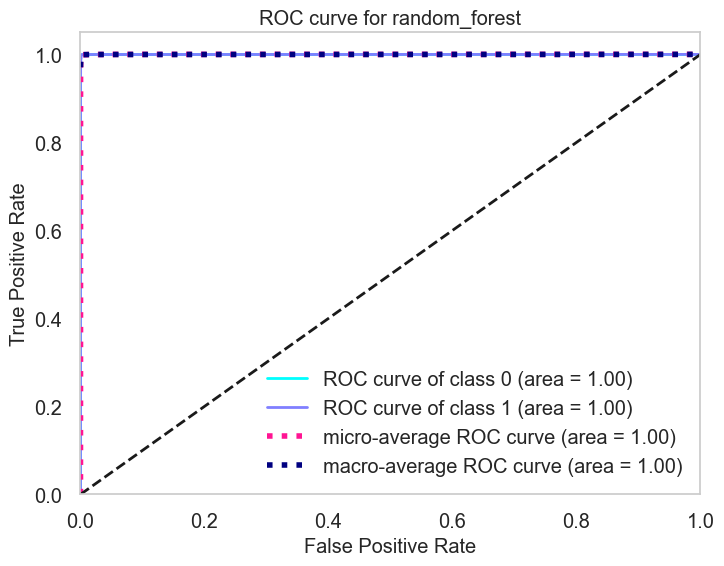

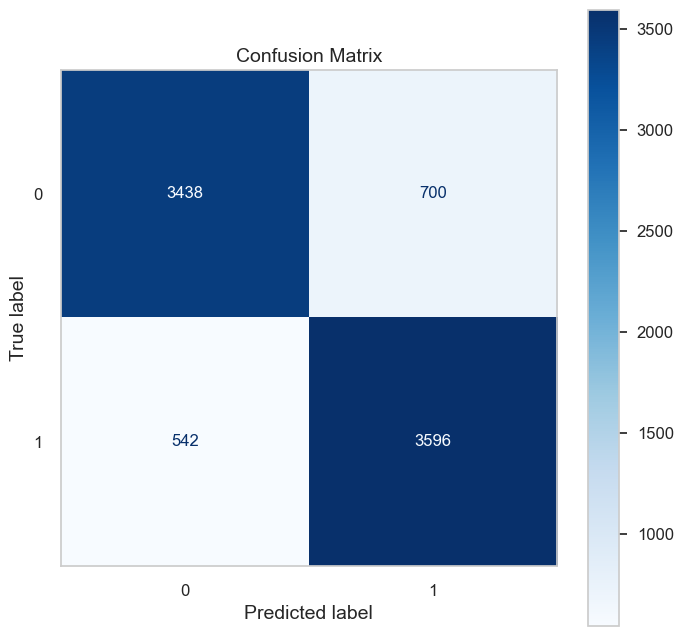

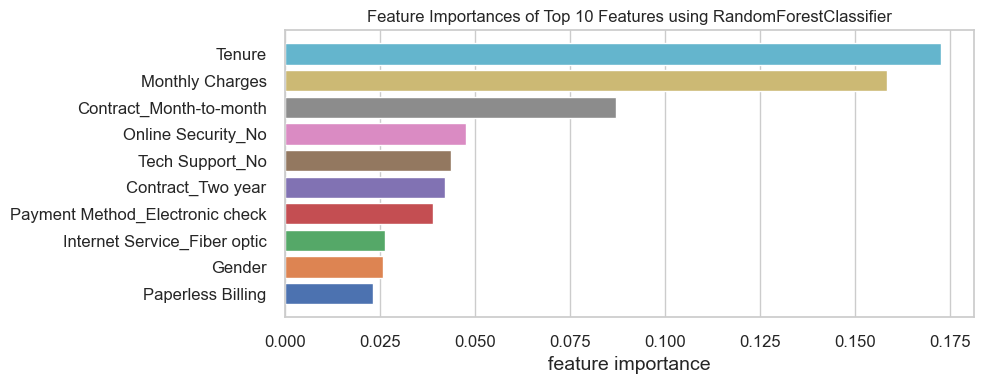

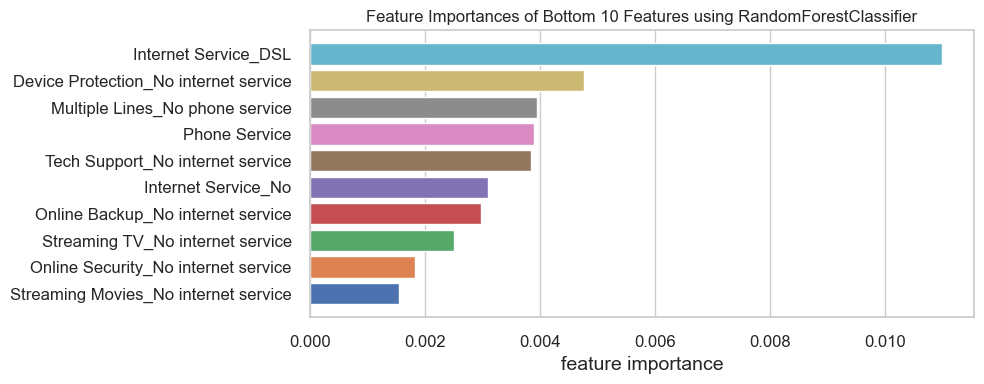







----------------------  k_nearest_neighbors  ----------------------


              precision    recall  f1-score   support

           0       0.88      0.68      0.77      4138
           1       0.74      0.91      0.82      4138

    accuracy                           0.79      8276
   macro avg       0.81      0.79      0.79      8276
weighted avg       0.81      0.79      0.79      8276



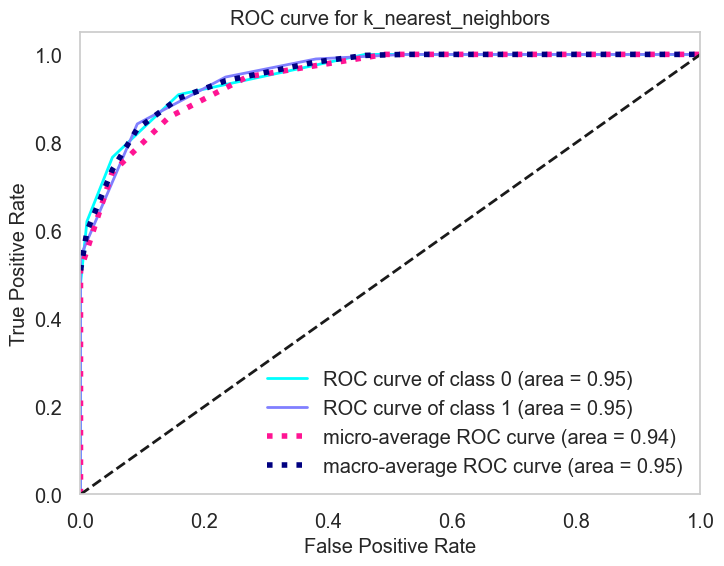

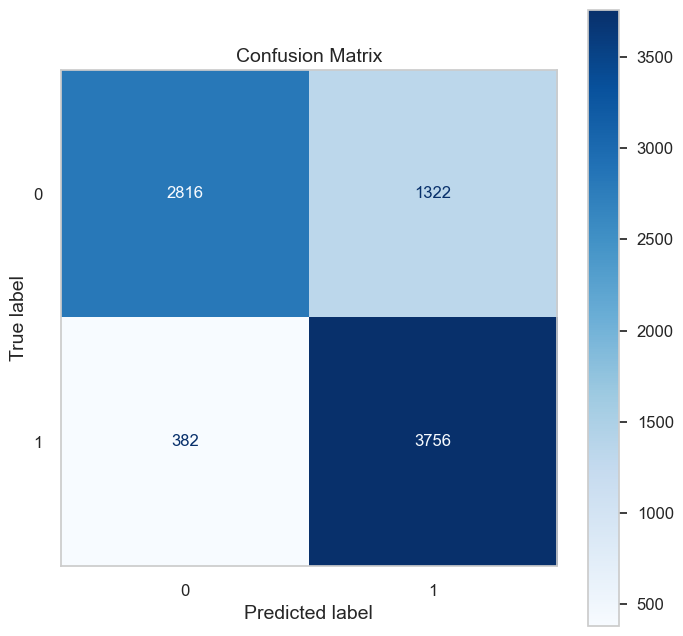



No feature importance for k_nearest_neighbors






----------------------  gradient_boosting  ----------------------


              precision    recall  f1-score   support

           0       0.85      0.79      0.82      4138
           1       0.81      0.86      0.83      4138

    accuracy                           0.83      8276
   macro avg       0.83      0.83      0.83      8276
weighted avg       0.83      0.83      0.83      8276



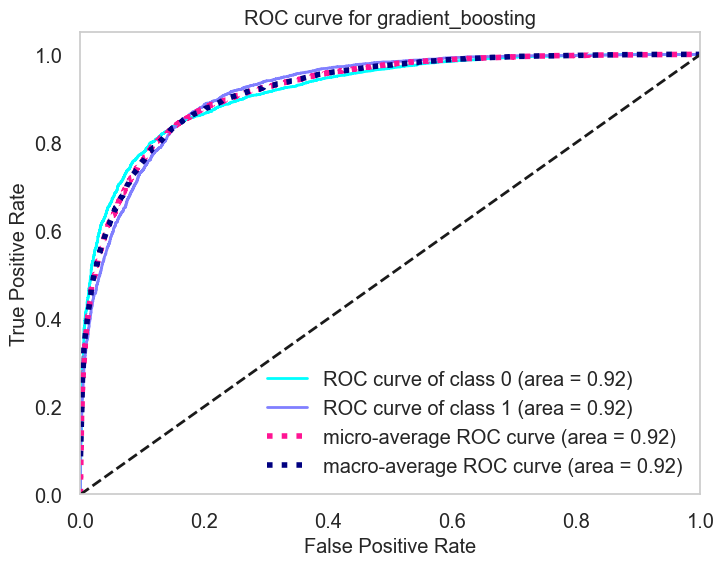

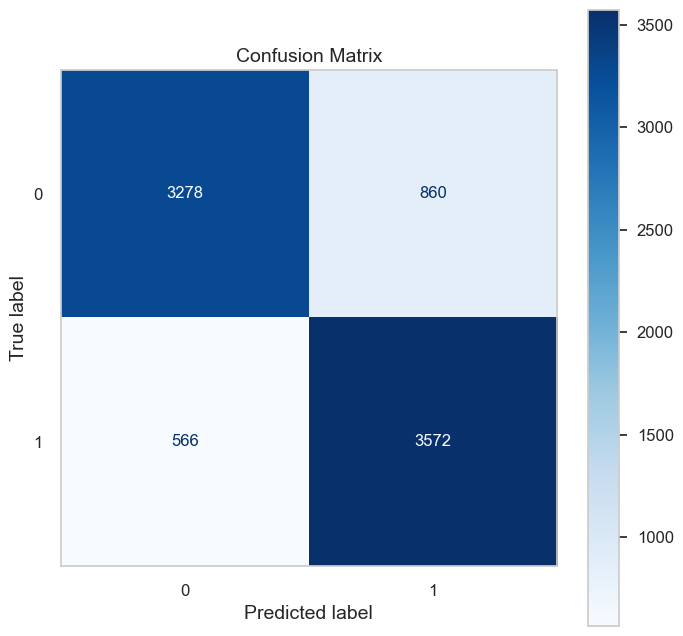

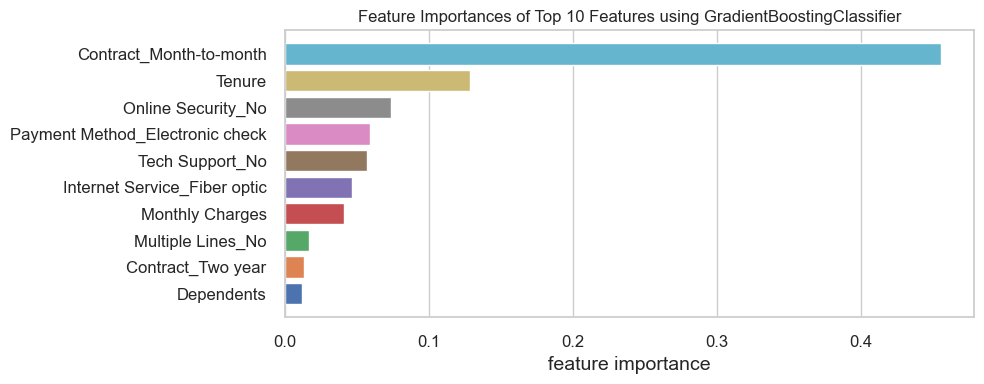

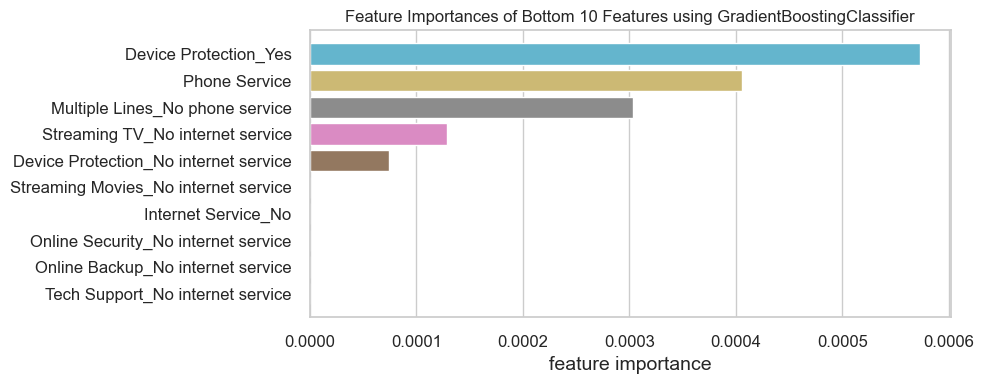







----------------------  neural_network  ----------------------


              precision    recall  f1-score   support

           0       0.84      0.77      0.80      4138
           1       0.79      0.86      0.82      4138

    accuracy                           0.81      8276
   macro avg       0.81      0.81      0.81      8276
weighted avg       0.81      0.81      0.81      8276



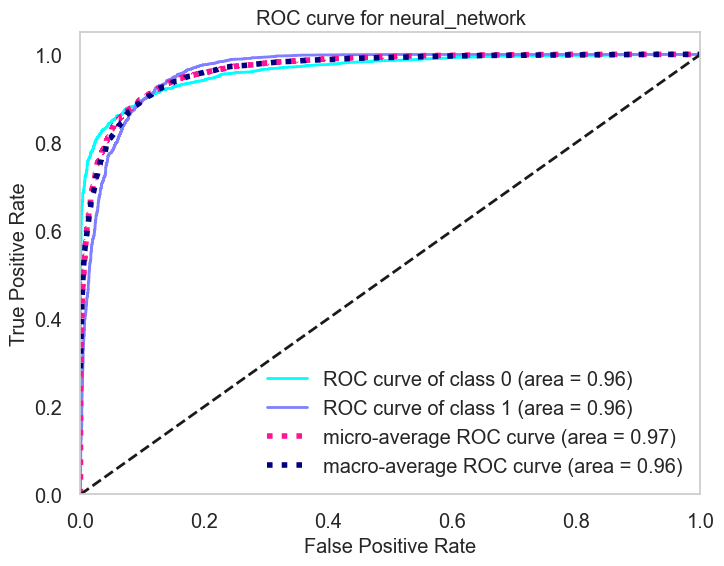

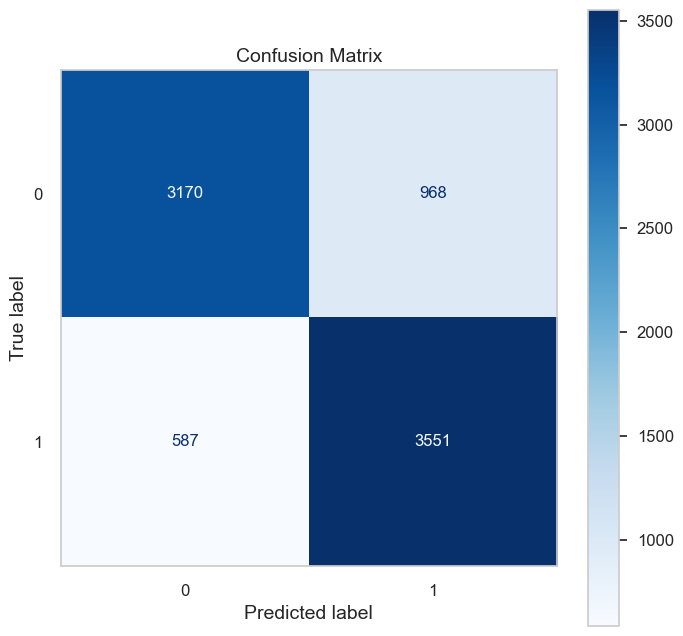



No feature importance for neural_network






----------------------  adaboost  ----------------------


              precision    recall  f1-score   support

           0       0.82      0.76      0.79      4138
           1       0.77      0.84      0.81      4138

    accuracy                           0.80      8276
   macro avg       0.80      0.80      0.80      8276
weighted avg       0.80      0.80      0.80      8276



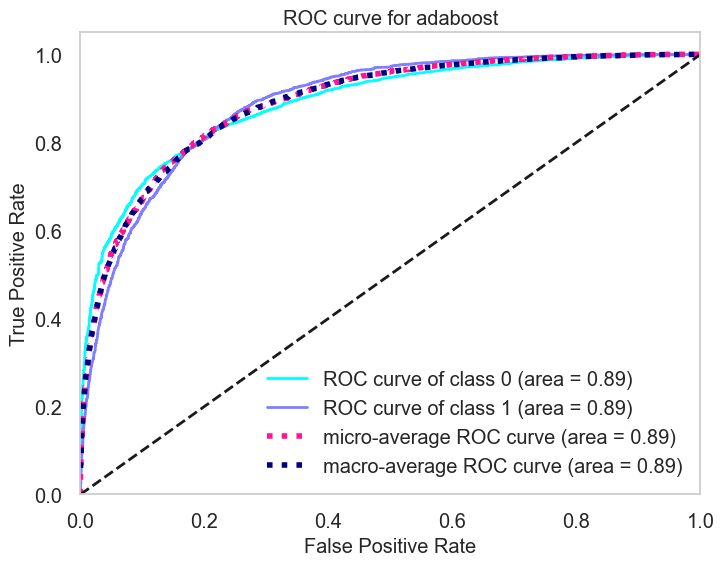

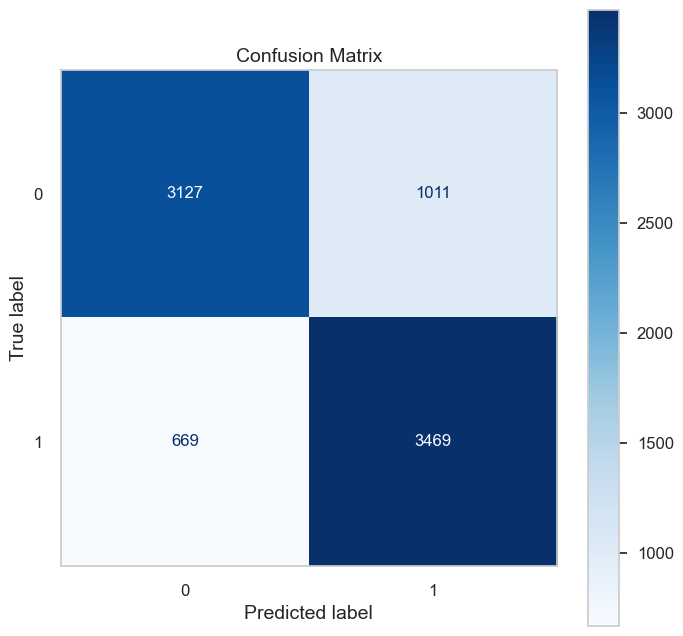

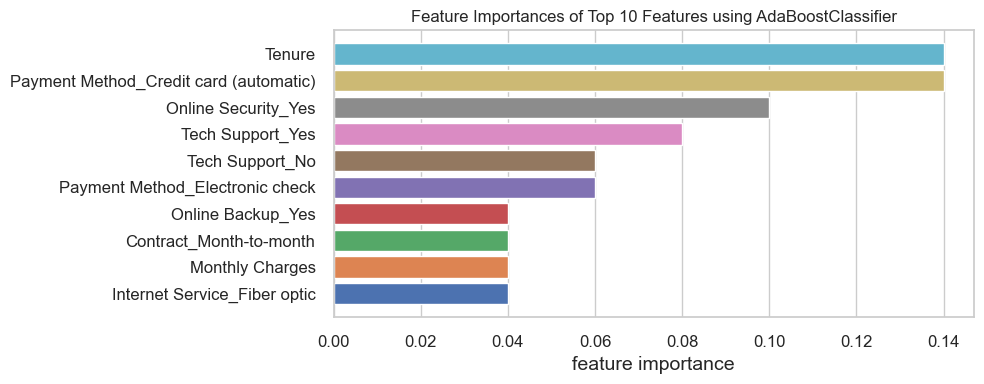

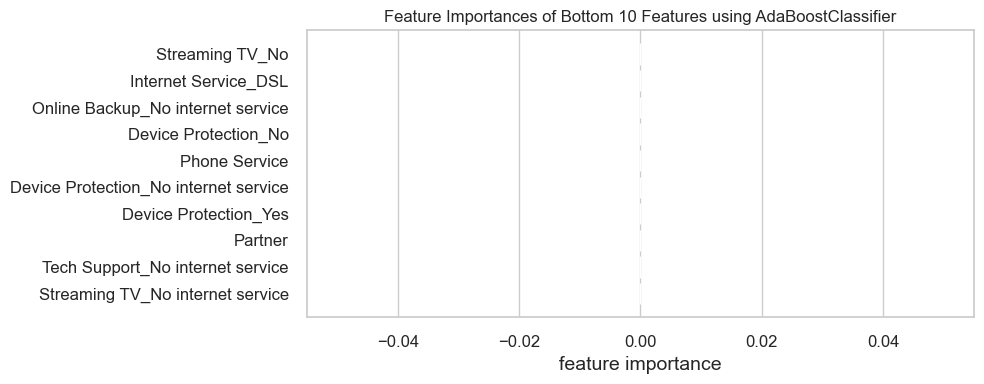







----------------------  extra_trees  ----------------------


              precision    recall  f1-score   support

           0       0.87      0.83      0.85      4138
           1       0.84      0.87      0.85      4138

    accuracy                           0.85      8276
   macro avg       0.85      0.85      0.85      8276
weighted avg       0.85      0.85      0.85      8276



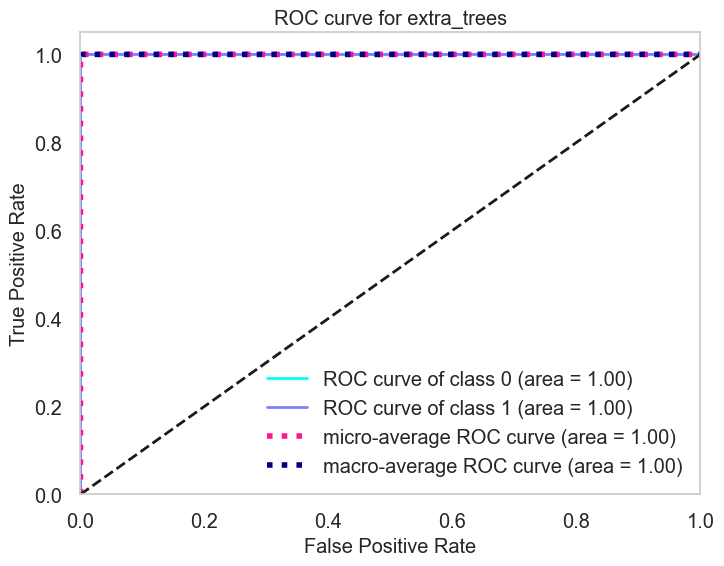

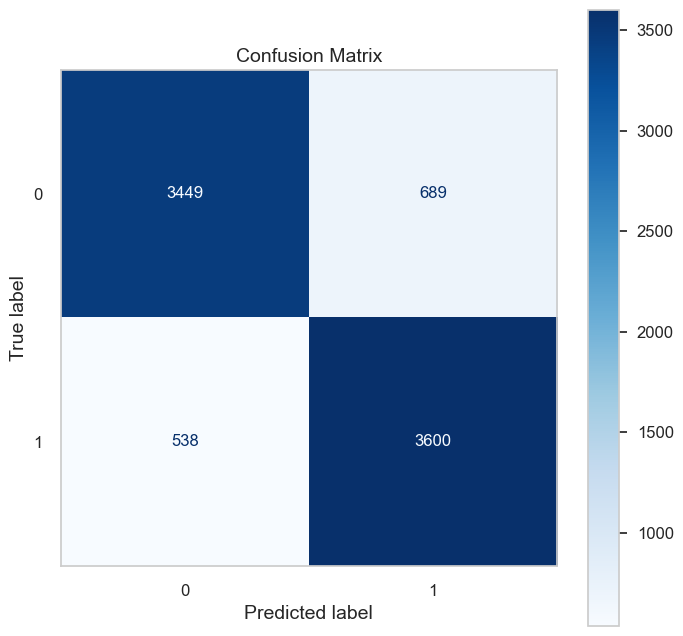

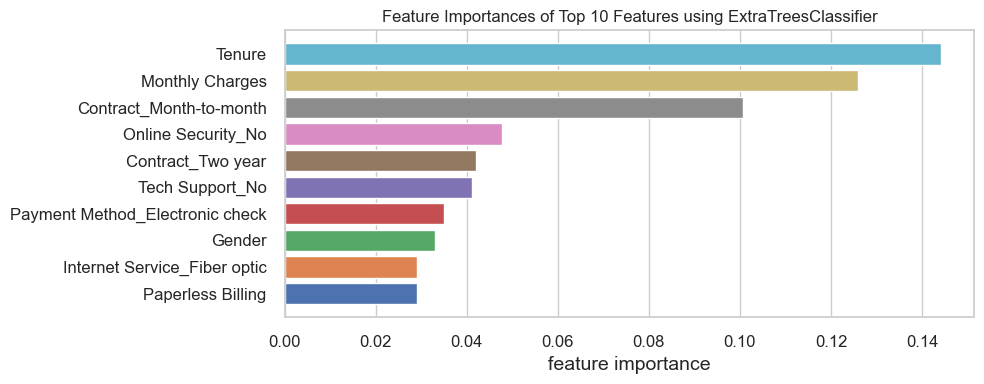

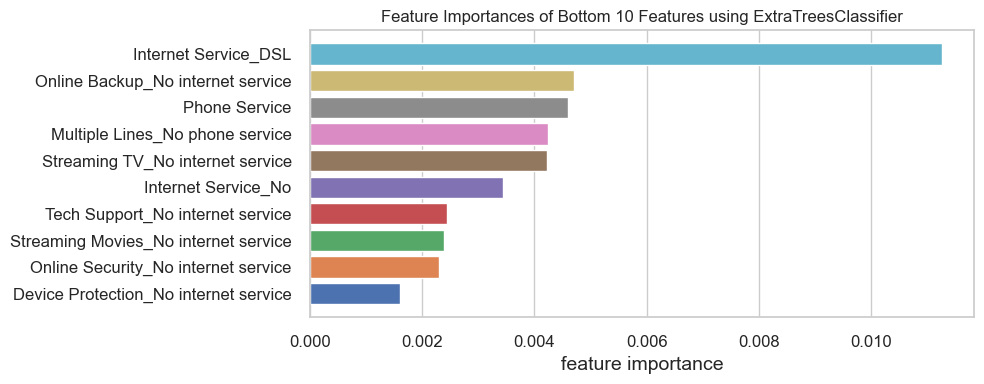







----------------------  xgboost  ----------------------


              precision    recall  f1-score   support

           0       0.84      0.83      0.84      4138
           1       0.83      0.85      0.84      4138

    accuracy                           0.84      8276
   macro avg       0.84      0.84      0.84      8276
weighted avg       0.84      0.84      0.84      8276



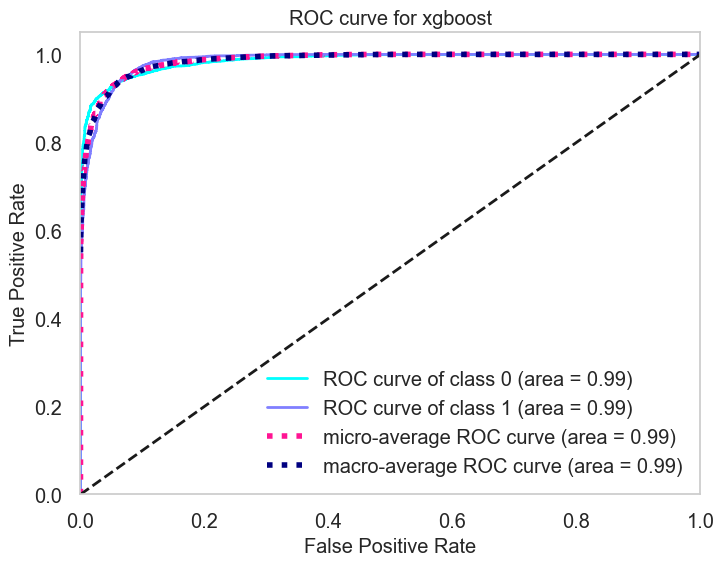

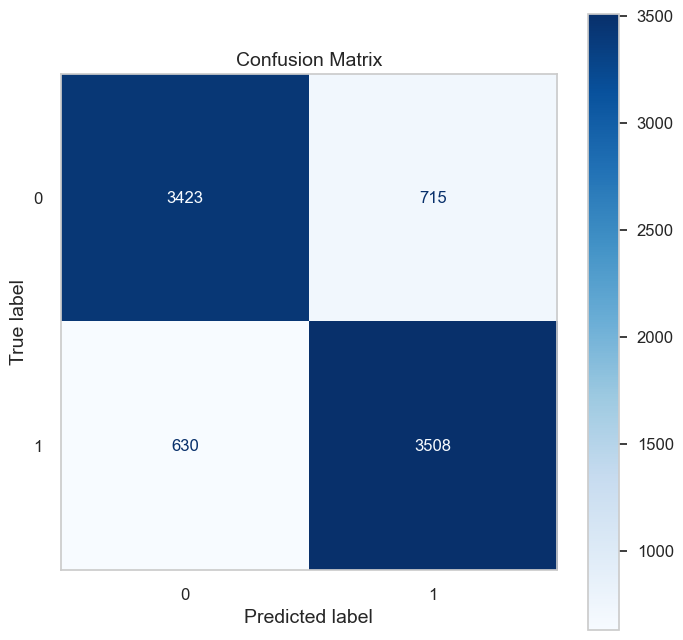

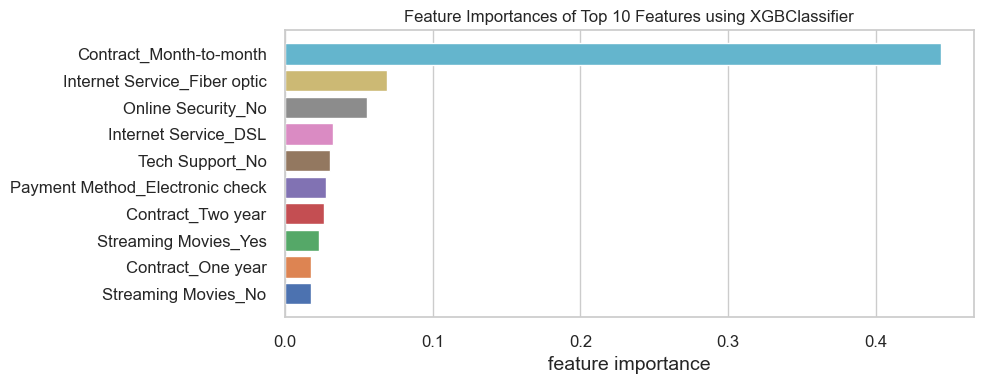

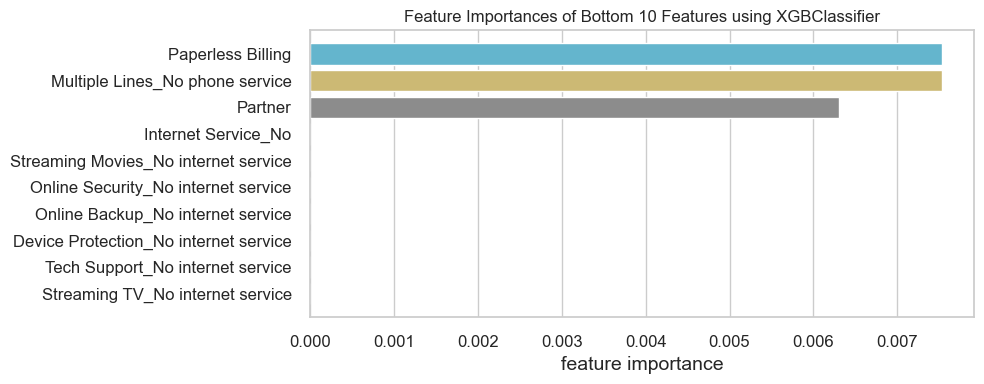







----------------------  lightgbm  ----------------------


              precision    recall  f1-score   support

           0       0.85      0.82      0.84      4138
           1       0.83      0.86      0.84      4138

    accuracy                           0.84      8276
   macro avg       0.84      0.84      0.84      8276
weighted avg       0.84      0.84      0.84      8276



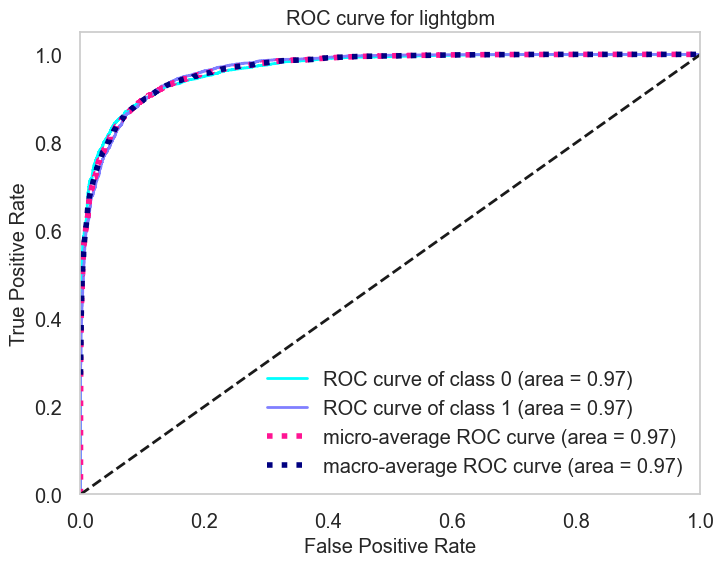

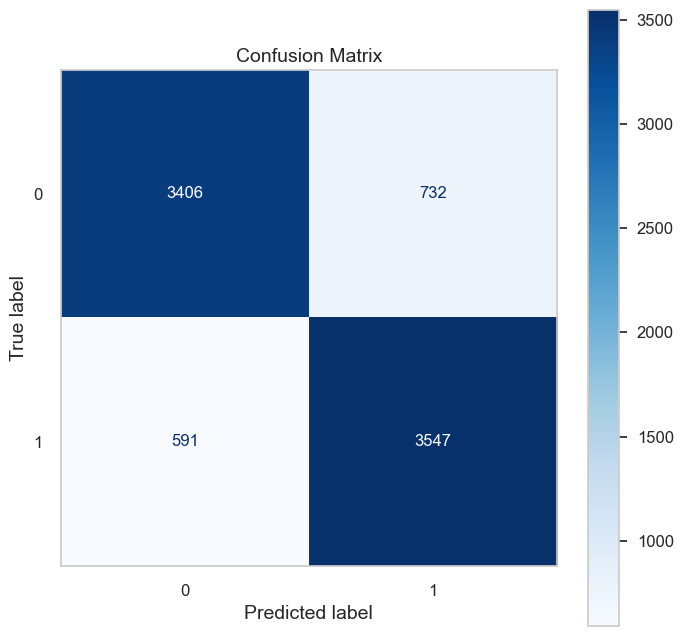

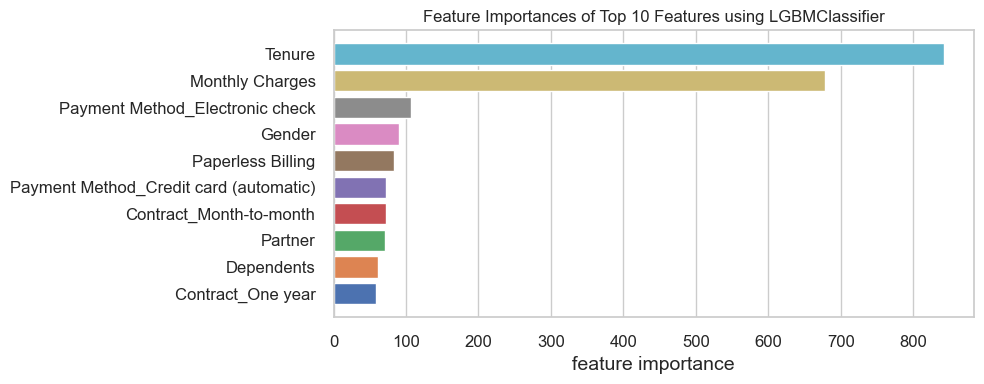

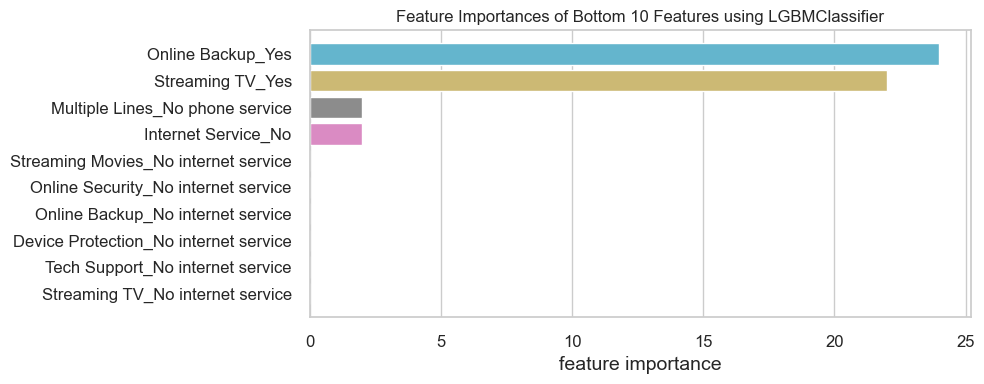

In [194]:
# loop over all the models
for model_name,model in classifiers.items():
    # title formatting
    print('\n')
    print('\n')
    print('  {}  '.center(50,'-').format(model_name))
    print('\n')
    # check if the folder for saving the model exists, if not create it
    folder_check_model()
    # train the model
    model_trn = train_model(model,model_name)
    # print the scores from the classification report
    score_func(model_trn, model_name)
    # plot the ROC curve
    roc_curve_func(model_trn,model_name)
    # plot the confusion matrix
    confusion_matrix_func(model_trn,model_name)
    # plot feature importance
    feat_importance_plot(model_trn, model_name)
    warnings.filterwarnings("ignore")

**1. Context & Data Inputs**

- **Objective**: Predict customer churn (whether a telecom subscriber will leave the service).  
- **Key features**:  
  - **Contract type**: Month-to-month, One-year, Two-year  
  - **Internet service**: Fiber optic, DSL, No service  
  - **Value-added services**: Online Security, Tech Support, Streaming TV/Movies, Online Backup, Device Protection  
  - **Payment method**: Electronic check, Mailed check, Credit card, Bank transfer  
  - **Numeric variables**: Tenure, Monthly Charges, Total Charges  
  - **Demographics & others**: Senior Citizen, Partner, Dependents, Phone Service, Paperless Billing  

- **Churn rate**: ~26.5% (light class imbalance → emphasize recall for the “churn” class)  

- **Top 10 features (XGBClassifier)**  
  1. Contract_Month-to-month  
  2. Internet Service_Fiber optic  
  3. Online Security_No  
  4. Internet Service_DSL  
  5. Tech Support_No  
  6. Payment Method_Electronic check  
  7. Contract_Two year  
  8. Streaming Movies_Yes  
  9. Contract_One year  
  10. Streaming Movies_No  

- **Bottom 10 features** (negligible importance):  
  - Paperless Billing, Multiple Lines_No phone service, Partner, Internet Service_No, and several “_No internet service” flags  

> **Insight**: Month-to-month contracts, fiber-optic service, lack of security/support, and electronic check payment are the strongest churn indicators.

---

**2. Why XGBoost?**

1. **Top-tier performance**  
   - **F1-score** ≈ 0.84 (both classes)  
   - **ROC AUC** ≈ 0.99 (class-0, class-1, micro, macro)  

2. **Robust to data variety**  
   - Handles categorical and numeric features, missing values, and outliers  
   - Built-in regularization (γ, λ, α) to prevent overfitting  

3. **Scalability & speed**  
   - Fast training on ~8k records, easily scales to much larger datasets  

4. **Explainability & monitoring**  
   - Feature importance and SHAP values help explain individual predictions  
   - Enables targeted retention campaigns by identifying at-risk segments  

---

**3. Conclusion**

XGBoost strikes the best balance of **accuracy**, **discrimination power**, and **operational efficiency** for telecom churn prediction. Its high AUC and F1-score, combined with interpretability and scalability, make it the optimal choice for both model development and production deployment.  


# VI) Test the final model on the test set

In [197]:
test_data_copy.head(5)

Customer ID  Gender  Senior Citizen Partner Dependents  Tenure  \
0  1024-GUALD  Female               0     Yes         No       1   
1  0484-JPBRU    Male               0      No         No      41   
2  3620-EHIMZ  Female               0     Yes        Yes      52   
3  6910-HADCM  Female               0      No         No       1   
4  8587-XYZSF    Male               0      No         No      67   

  Phone Service    Multiple Lines Internet Service      Online Security  \
0            No  No phone service              DSL                   No   
1           Yes               Yes               No  No internet service   
2           Yes                No               No  No internet service   
3           Yes                No      Fiber optic                   No   
4           Yes                No              DSL                   No   

         Online Backup    Device Protection         Tech Support  \
0                   No                   No                   No   
1  No internet service  No internet service  No internet service   
2  No internet service  No internet service  No internet service   
3                   No                  Yes                   No   
4                   No                   No                  Yes   

          Streaming TV     Streaming Movies        Contract Paperless Billing  \
0                   No                   No  Month-to-month               Yes   
1  No internet service  No internet service  Month-to-month               Yes   
2  No internet service  No internet service        Two year                No   
3                   No                   No  Month-to-month                No   
4                   No                   No        Two year                No   

              Payment Method  Monthly Charges  Total Charges Churn  
0           Electronic check            24.80          24.80   Yes  
1  Bank transfer (automatic)            25.25         996.45    No  
2               Mailed check            19.35        1031.70    No  
3           Electronic check            76.35          76.35   Yes  
4  Bank transfer (automatic)            50.55        3260.10    No

In [198]:
test_data_prep = full_pipeline(test_data_copy)

In [199]:
test_data_prep

Gender  Senior Citizen  Partner  Dependents  Tenure  Phone Service  \
0          1               0        1           0    0.01              0   
1          0               0        0           0    0.57              1   
2          1               0        1           1    0.72              1   
3          1               0        0           0    0.01              1   
4          0               0        0           0    0.93              1   
...      ...             ...      ...         ...     ...            ...   
2067       0               0        0           0    0.21              1   
2068       0               0        1           1    0.26              1   
2069       1               0        0           0    0.01              1   
2070       1               0        0           0    0.16              1   
2071       0               0        0           0    0.53              1   

      Paperless Billing  Monthly Charges  Internet Service_DSL  \
0                     1             0.06                  1.00   
1                     1             0.07                  0.00   
2                     0             0.01                  0.00   
3                     0             0.58                  0.00   
4                     0             0.32                  1.00   
...                 ...              ...                   ...   
2067                  1             0.70                  0.00   
2068                  1             0.65                  0.00   
2069                  0             0.75                  0.00   
2070                  0             0.70                  0.00   
2071                  1             0.74                  0.73   

      Internet Service_Fiber optic  Internet Service_No  \
0                             0.00                 0.00   
1                             0.00                 1.00   
2                             0.00                 1.00   
3                             1.00                 0.00   
4                             0.00                 0.00   
...                            ...                  ...   
2067                          1.00                 0.00   
2068                          1.00                 0.00   
2069                          1.00                 0.00   
2070                          1.00                 0.00   
2071                          0.27                 0.00   

      Payment Method_Bank transfer (automatic)  \
0                                         0.00   
1                                         1.00   
2                                         0.00   
3                                         0.00   
4                                         1.00   
...                                        ...   
2067                                      1.00   
2068                                      0.00   
2069                                      0.00   
2070                                      0.00   
2071                                      0.00   

      Payment Method_Credit card (automatic)  Payment Method_Electronic check  \
0                                       0.00                             1.00   
1                                       0.00                             0.00   
2                                       0.00                             0.00   
3                                       0.00                             1.00   
4                                       0.00                             0.00   
...                                      ...                              ...   
2067                                    0.00                             0.00   
2068                                    0.00                             1.00   
2069                                    0.00                             0.00   
2070                                    0.00                             1.00   
2071                                    1.00                             0.00   

      Payment Met

In [200]:
# split the train data into X and y (target)
X_cc_test_prep, y_cc_test_prep = test_data_prep.loc[:, test_data_prep.columns != 'Churn'], test_data_prep['Churn'].astype('int64')

In [201]:
# train the model extra_trees
model_trn = train_model(classifiers['xgboost'],'xgboost')

In [202]:
final_predictions = model_trn.predict(X_cc_test_prep)

In [203]:
final_predictions.shape

(2072,)

In [204]:
n_correct = sum(final_predictions == y_cc_test_prep)

In [205]:
print(n_correct/len(final_predictions))

0.8412162162162162


# VII) Save final dataset

In [208]:
model_path = 'C:/Users/thanh/OneDrive/Desktop/New Project/Telecom/saved_models/xgboost/xgboost_model.sav'
extra_trees_model = joblib.load(model_path)

df = full_data.copy()

pipeline = Pipeline([
    ('imputer', ImputerWrapper()),
    ('drop_features', DropFeatures()),
    ('binary_mapper', BinaryMapper()),
    ('one_hot_encoder', OneHotEncoderWrapper()),
    ('min_max_scaler', MinMaxScalerWrapper())
])

pipeline.fit(df)

pipeline_dir = 'C:/Users/thanh/OneDrive/Desktop/New Project/Telecom/saved_models/pipeline'
os.makedirs(pipeline_dir, exist_ok=True)

pipeline_path = os.path.join(pipeline_dir, 'pipeline_preprocessing.sav')
joblib.dump(pipeline, pipeline_path)

data_processed = pipeline.transform(df)

X_data_processed = data_processed.drop(columns='Churn')
y_data_processed = data_processed['Churn'].astype('int64')

y_pred = extra_trees_model.predict(X_data_processed)
y_proba = extra_trees_model.predict_proba(X_data_processed)

df['Predicted Churn'] = y_pred
df['Prob Non-Churn'] = y_proba[:, 0]
df['Prob Churn'] = y_proba[:, 1]

In [210]:
df

Customer ID  Gender  Senior Citizen Partner Dependents  Tenure  \
0     7590-VHVEG  Female               0     Yes         No       1   
1     5575-GNVDE    Male               0      No         No      34   
2     3668-QPYBK    Male               0      No         No       2   
3     7795-CFOCW    Male               0      No         No      45   
4     9237-HQITU  Female               0      No         No       2   
...          ...     ...             ...     ...        ...     ...   
7038  6840-RESVB    Male               0     Yes        Yes      24   
7039  2234-XADUH  Female               0     Yes        Yes      72   
7040  4801-JZAZL  Female               0     Yes        Yes      11   
7041  8361-LTMKD    Male               1     Yes         No       4   
7042  3186-AJIEK    Male               0      No         No      66   

     Phone Service    Multiple Lines Internet Service Online Security  \
0               No  No phone service              DSL              No   
1              Yes                No              DSL             Yes   
2              Yes                No              DSL             Yes   
3               No  No phone service              DSL             Yes   
4              Yes                No      Fiber optic              No   
...            ...               ...              ...             ...   
7038           Yes               Yes              DSL             Yes   
7039           Yes               Yes      Fiber optic              No   
7040            No  No phone service              DSL             Yes   
7041           Yes               Yes      Fiber optic              No   
7042           Yes                No      Fiber optic             Yes   

     Online Backup Device Protection Tech Support Streaming TV  \
0              Yes                No           No           No   
1               No               Yes           No           No   
2              Yes                No           No           No   
3               No               Yes          Yes           No   
4               No                No           No           No   
...            ...               ...          ...          ...   
7038            No               Yes          Yes          Yes   
7039           Yes               Yes           No          Yes   
7040            No                No           No           No   
7041            No                No           No           No   
7042            No               Yes          Yes          Yes   

     Streaming Movies        Contract Paperless Billing  \
0                  No  Month-to-month               Yes   
1                  No        One year                No   
2                  No  Month-to-month               Yes   
3                  No        One year                No   
4                  No  Month-to-month               Yes   
...               ...             ...               ...   
7038              Yes        One year               Yes   
7039              Yes        One year               Yes   
7040               No  Month-to-month               Yes   
7041               No  Month-to-month               Yes   
7042              Yes        Two year               Yes   

                 Payment Method  Monthly Charges  Total Charges Churn  \
0              Electronic check            29.85          29.85    No   
1                  Mailed check            56.95        1889.50    No   
2                  Mailed check            53.85         108.15   Yes   
3     Bank transfer (automatic)            42.30        1840.75    No   
4              Electronic check            70.70         151.65   Yes   
...                         ...              ...            ...   ...   
7038               Mailed check            84.80        1990.50    No   
7039    Credit card (automatic)           103.20        7362.90    No   
7040           Electronic check            29.60         346.45    No   
7041               Mailed check            

In [212]:
df['Senior Citizen'] = df['Senior Citizen'].map({1: 'Yes', 0: 'No'})
df['Predicted Churn'] = df['Predicted Churn'].map({1: 'Yes', 0: 'No'})

In [214]:
df.head()

Customer ID  Gender Senior Citizen Partner Dependents  Tenure Phone Service  \
0  7590-VHVEG  Female             No     Yes         No       1            No   
1  5575-GNVDE    Male             No      No         No      34           Yes   
2  3668-QPYBK    Male             No      No         No       2           Yes   
3  7795-CFOCW    Male             No      No         No      45            No   
4  9237-HQITU  Female             No      No         No       2           Yes   

     Multiple Lines Internet Service Online Security Online Backup  \
0  No phone service              DSL              No           Yes   
1                No              DSL             Yes            No   
2                No              DSL             Yes           Yes   
3  No phone service              DSL             Yes            No   
4                No      Fiber optic              No            No   

  Device Protection Tech Support Streaming TV Streaming Movies  \
0                No           No           No               No   
1               Yes           No           No               No   
2                No           No           No               No   
3               Yes          Yes           No               No   
4                No           No           No               No   

         Contract Paperless Billing             Payment Method  \
0  Month-to-month               Yes           Electronic check   
1        One year                No               Mailed check   
2  Month-to-month               Yes               Mailed check   
3        One year                No  Bank transfer (automatic)   
4  Month-to-month               Yes           Electronic check   

   Monthly Charges  Total Charges Churn Predicted Churn  Prob Non-Churn  \
0            29.85          29.85    No             Yes            0.40   
1            56.95        1889.50    No              No            0.99   
2            53.85         108.15   Yes             Yes            0.45   
3            42.30        1840.75    No              No            0.99   
4            70.70         151.65   Yes             Yes            0.27   

   Prob Churn  
0        0.60  
1        0.01  
2        0.55  
3        0.01  
4        0.73

In [216]:
df.shape

(7043, 24)

In [218]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Customer ID        7043 non-null   object 
 1   Gender             7043 non-null   object 
 2   Senior Citizen     7043 non-null   object 
 3   Partner            7043 non-null   object 
 4   Dependents         7043 non-null   object 
 5   Tenure             7043 non-null   int64  
 6   Phone Service      7043 non-null   object 
 7   Multiple Lines     7043 non-null   object 
 8   Internet Service   7043 non-null   object 
 9   Online Security    7043 non-null   object 
 10  Online Backup      7043 non-null   object 
 11  Device Protection  7043 non-null   object 
 12  Tech Support       7043 non-null   object 
 13  Streaming TV       7043 non-null   object 
 14  Streaming Movies   7043 non-null   object 
 15  Contract           7043 non-null   object 
 16  Paperless Billing  7043 

In [ ]:
df.to_csv('cleaned_dataset.csv', index = False)